In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel")

import datetime

from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_auc_score, roc_curve, make_scorer,confusion_matrix, precision_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

import graphviz

In [4]:
df = pd.read_csv(r"C:\Users\deepu\OneDrive\Documents\My Tableau Repository\Workbooks\train.csv")


In [5]:
df.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [6]:
df.describe()

id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.867205       2.806159   
min         0.0000  1.556570e+07     350.000000      18.000000       0.000000   
25%     41258.2500  1.563314e+07     597.000000      32.000000       3.000000   
50%     82516.5000  1.569017e+07     659.000000      37.000000       5.000000   
75%    123774.7500  1.575682e+07     710.000000      42.000000       7.000000   
max    165033.0000  1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.499997   
min         0.000000       1.000000       0.000000        0.000000   
25%         0.000000       1.000000       1.000000        0.000000   
50%         0.000000       2.000000       1.000000        0.000000   
75%    119939.517500       2.000000       1.000000        1.000000   
max    250898.090000       4.000000       1.000000        1.000000   

       EstimatedSalary         Exited  
count    165034.000000  165034.000000  
mean     112574.822734       0.211599  
std       50292.865585       0.408443  
min          11.580000       0.000000  
25%       74637.570000       0.000000  
50%      117948.000000       0.000000  
75%      155152.467500       0.000000  
max      199992.480000       1.000000

In [7]:
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.isna().sum()  #No Null Values in the Data

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

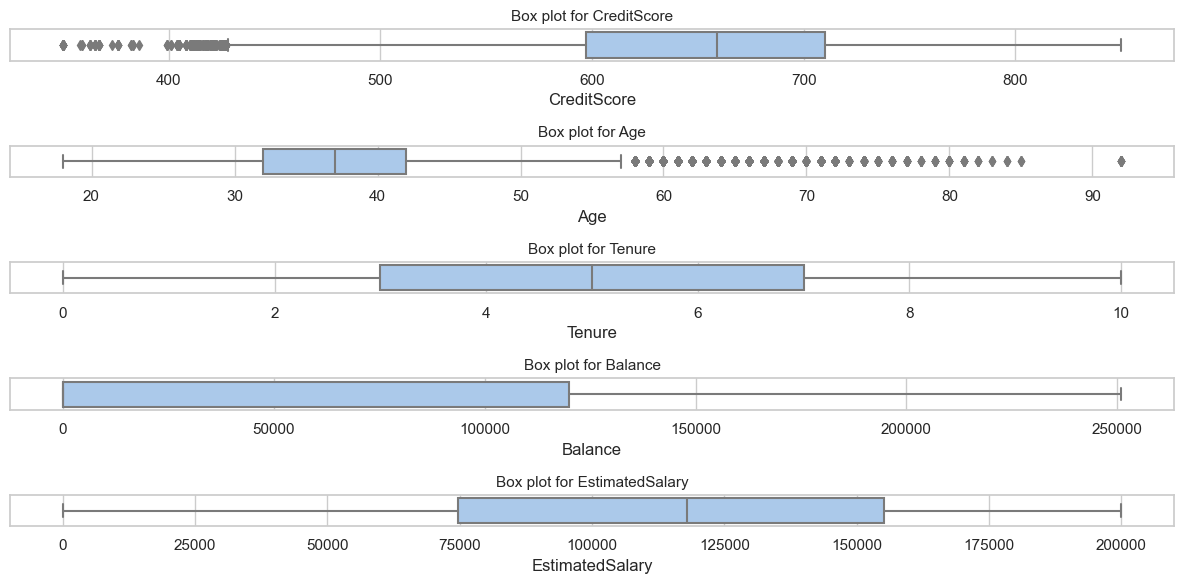

In [9]:
features = ['CreditScore','Age', 'Tenure', 'Balance', 'EstimatedSalary']
len_features = len(features)

fig,axes = plt.subplots(len_features, 1, figsize=(12,6))

for i in range(len_features):
    feature = features[i]
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"Box plot for {feature}", fontsize=11)

    
plt.tight_layout()
plt.show()

#Credit Score and Age features have Outliers (need to deal with them)

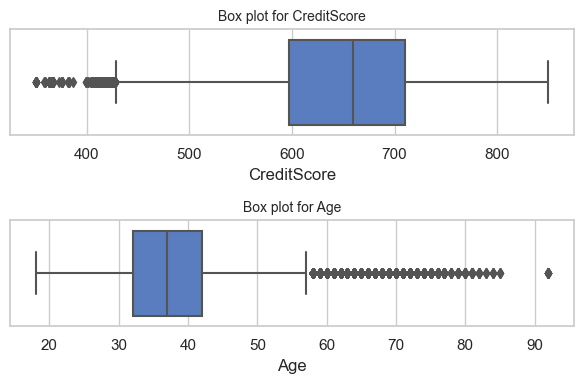

In [283]:
features = ['CreditScore','Age']
len_features = len(features)

fig,axes = plt.subplots(len_features, 1, figsize=(6,4))

for i in range(len_features):
    feature = features[i]
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"Box plot for {feature}", fontsize=10)

    
plt.tight_layout()
plt.show()

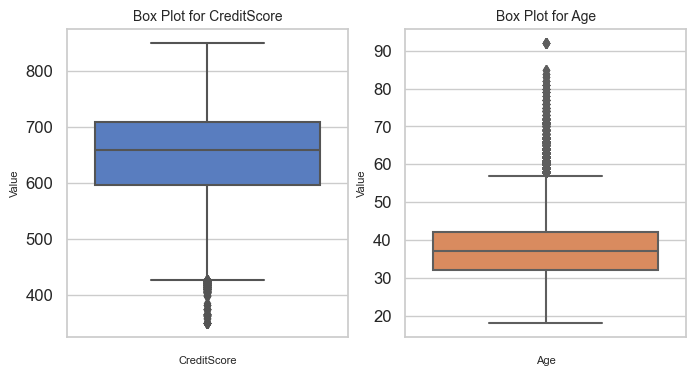

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and palette
sns.set(style='whitegrid', palette='muted')

# Assuming df is your DataFrame containing the data
# List of features to plot
features = ['CreditScore', 'Age']  # Replace with your actual features
len_features = len(features)

# Create subplots for box plots
fig, axes = plt.subplots(1, len_features, figsize=(8, 4))

# Plot box plots for each feature
for i in range(len_features):
    feature = features[i]
    sns.boxplot(y=df[feature], ax=axes[i], color=sns.color_palette('muted')[i])
    axes[i].set_title(f"Box Plot for {feature}", fontsize=10)
    axes[i].set_xlabel(feature, fontsize=8)
    axes[i].set_ylabel('Value', fontsize=8)
    axes[i].tick_params(axis='both', which='major', labelsize=12)

# Adjust layout

# Show plot
plt.show()


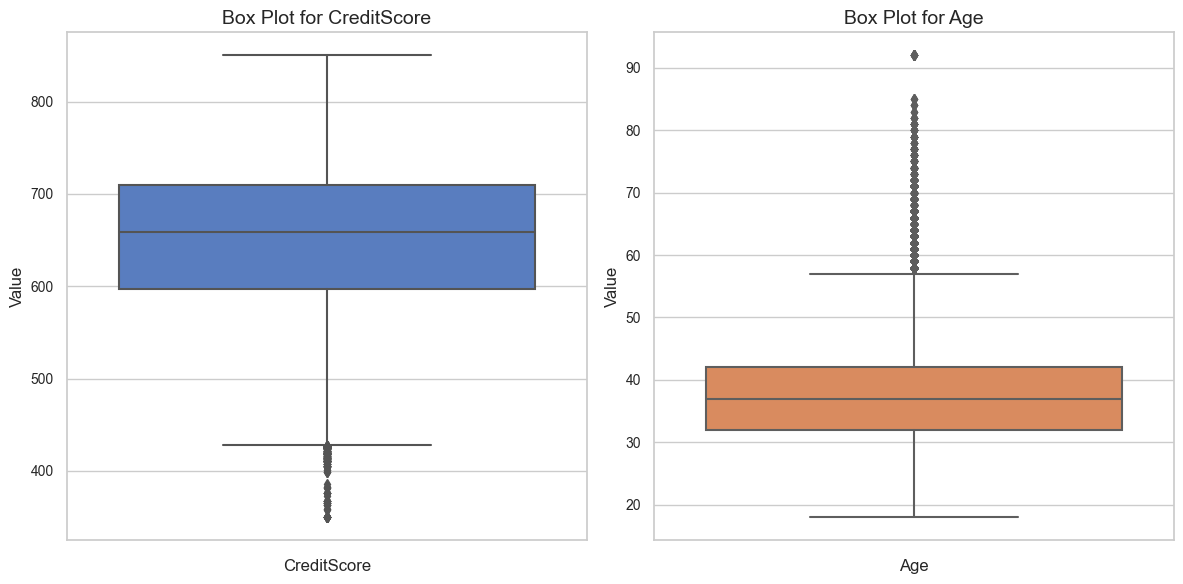

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and palette
sns.set(style='whitegrid', palette='muted')

# Assuming df is your DataFrame containing the data
# List of features to plot
features = ['CreditScore', 'Age']  # Replace with your actual features
len_features = len(features)

# Create subplots for box plots
fig, axes = plt.subplots(1, len_features, figsize=(12, 6))

# Plot box plots for each feature
for i in range(len_features):
    feature = features[i]
    sns.boxplot(y=df[feature], ax=axes[i], color=sns.color_palette('muted')[i])
    axes[i].set_title(f"Box Plot for {feature}", fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Value', fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=10)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
features = ['CreditScore','Age', 'Tenure', 'Balance', 'EstimatedSalary']
len_features = len(features)

fig,axes = plt.subplots(len_features, 1, figsize=(12,6))

for i in range(len_features):
    feature = features[i]
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"Box plot for {feature}", fontsize=11)

    
plt.tight_layout()
plt.show()

In [10]:
df['CreditScore'].value_counts(sort='True')

850    2532
678    2299
684    1718
667    1658
705    1605
       ... 
419       1
386       1
358       1
423       1
373       1
Name: CreditScore, Length: 457, dtype: int64

In [12]:
df['Tenure'].nunique()

11

In [13]:
df['Tenure'].value_counts(sort='Rrue')

2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: Tenure, dtype: int64

<AxesSubplot: >

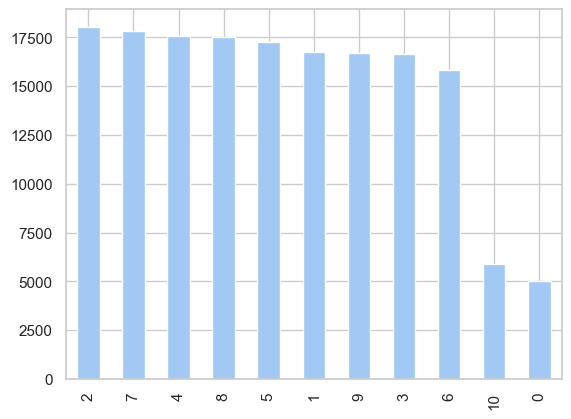

In [14]:
df['Tenure'].value_counts(sort='False').plot(kind='bar')

<AxesSubplot: >

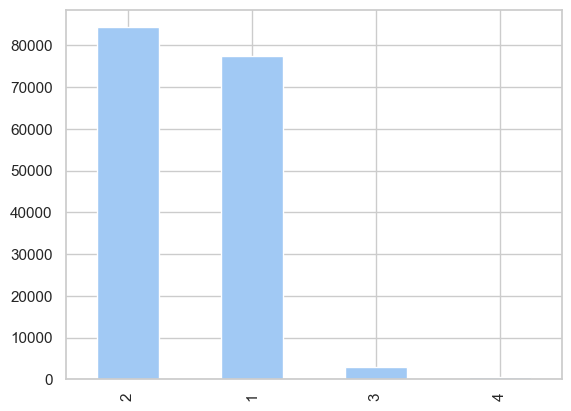

In [15]:
df['NumOfProducts'].value_counts(sort='False').plot(kind='bar')

In [16]:
#Number of unique surnames with only one entree
np.sum(df['Surname'].value_counts().values == 1)

226

In [17]:
df['Surname'].nunique()

2797

In [18]:
df['NumOfProducts'].value_counts(sort='False')

2    84291
1    77374
3     2894
4      475
Name: NumOfProducts, dtype: int64

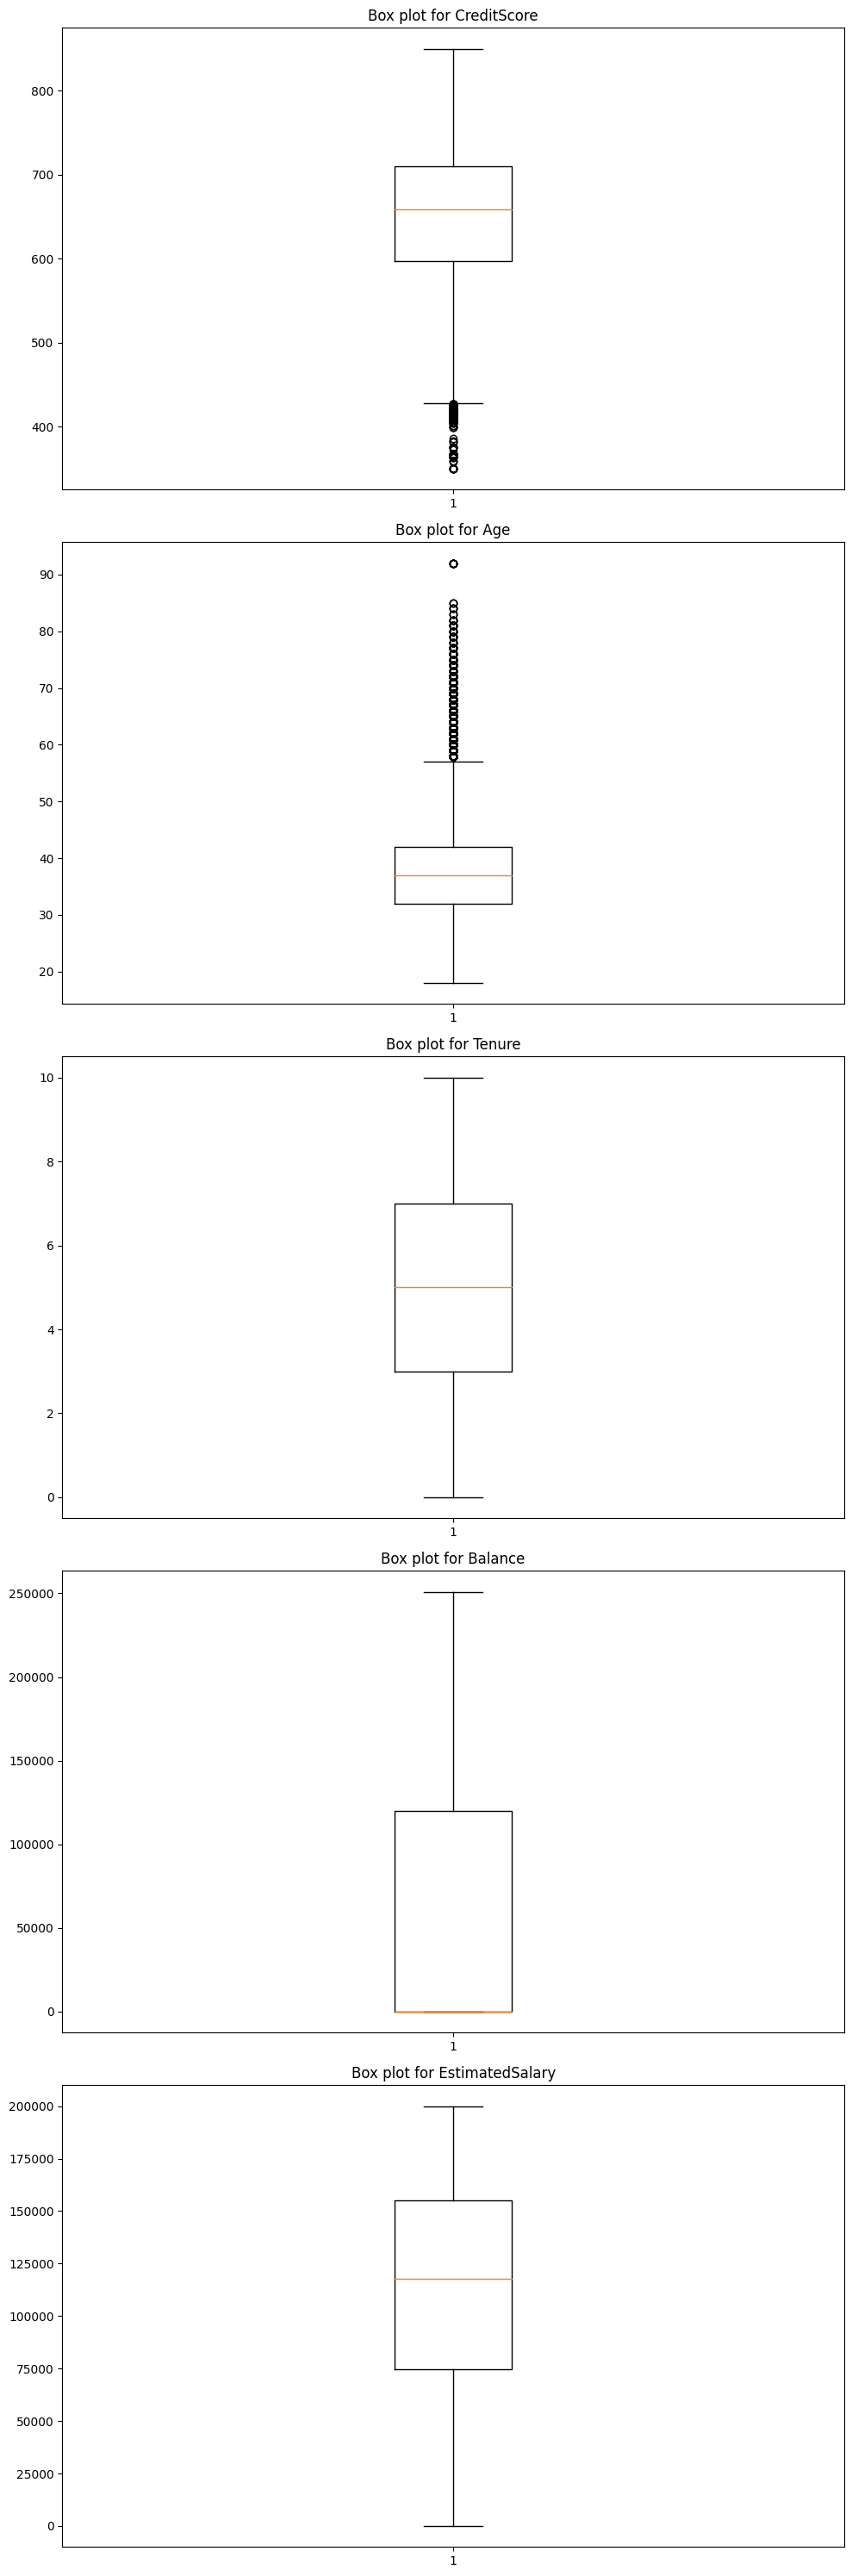

In [19]:
import matplotlib.pyplot as plt

# List of features you want to plot
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Number of features
n_features = len(features)

# Create a figure and axes with subplots
fig, axes = plt.subplots(n_features, 1, figsize=(10, 6 * n_features))

# Plot each feature using plt.boxplot()
for i in range(n_features):
    feature = features[i]
    axes[i].boxplot(df[feature])
    axes[i].set_title(f"Box plot for {feature}")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

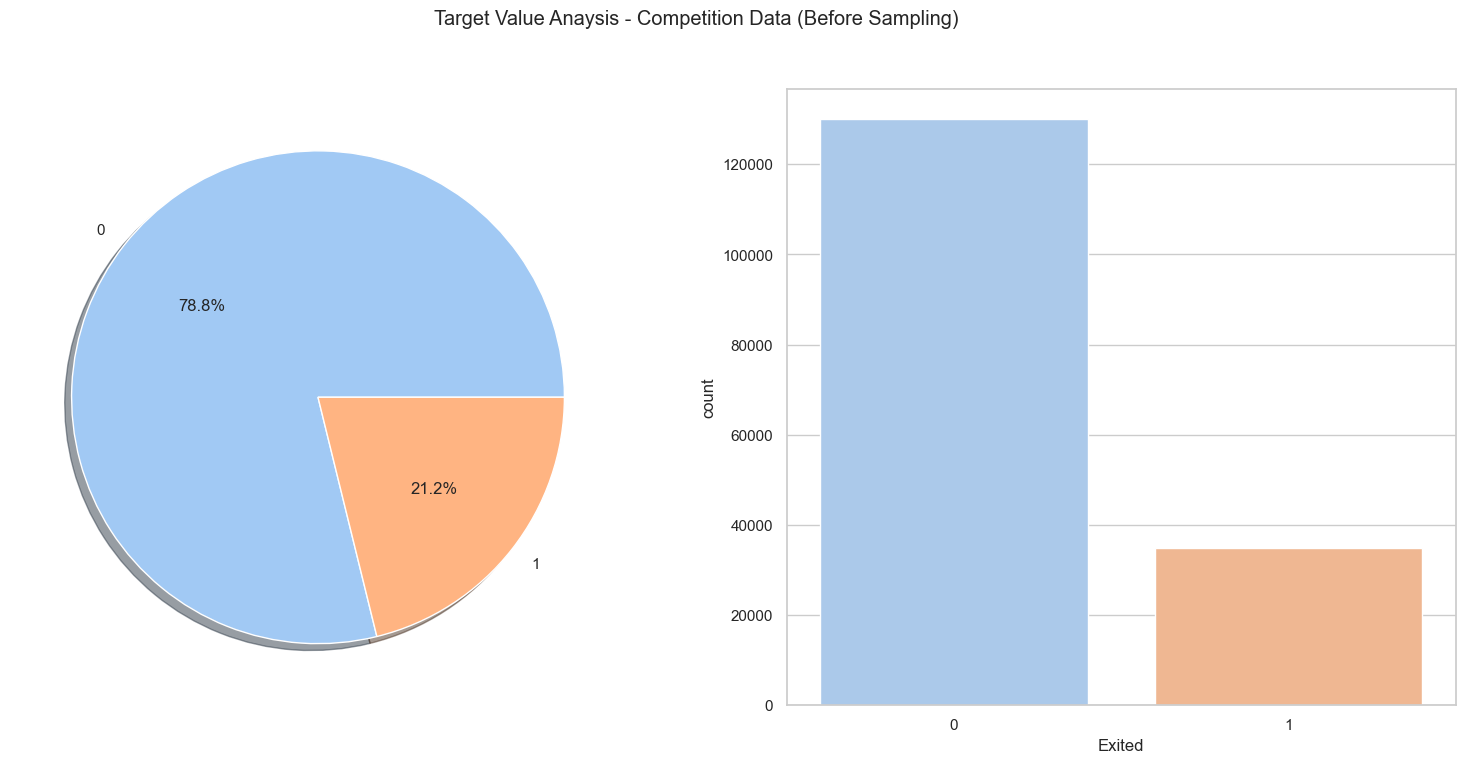

In [120]:
sns.set(style="whitegrid", palette="pastel")

f,ax=plt.subplots(1,2,figsize=(19,8))
df['Exited'].value_counts().plot(kind='pie', autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('Pie-Plot')
ax[0].set_ylabel('')
sns.countplot(x='Exited',data=df,ax=ax[1])
# ax[1].set_title('Count-Plot')
plt.suptitle('Target Value Anaysis - Competition Data (Before Sampling)')
plt.show()


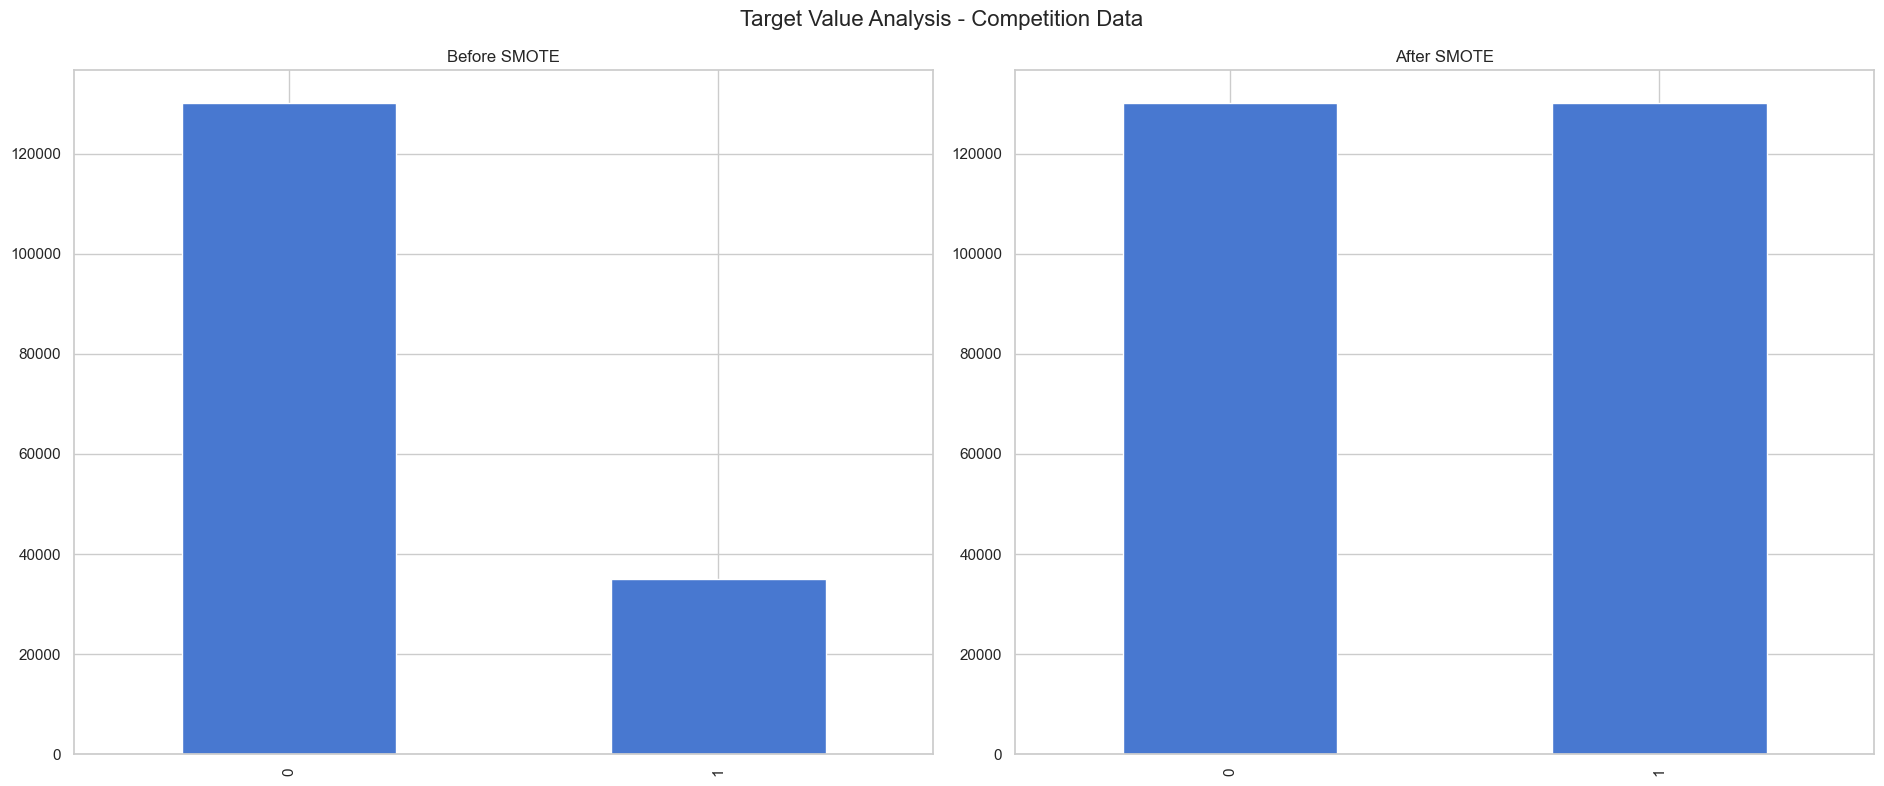

In [290]:
fig, ax = plt.subplots(1, 2, figsize=(19, 8))

# Plot pie chart for data before SMOTE
df['Exited'].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_ylabel('')
ax[0].set_title('Before SMOTE')

# Plot pie chart for data after SMOTE
y_smote_df['Exited'].value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('After SMOTE')

# Set the main title for the figure
plt.suptitle('Target Value Analysis - Competition Data', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot 
plt.show()


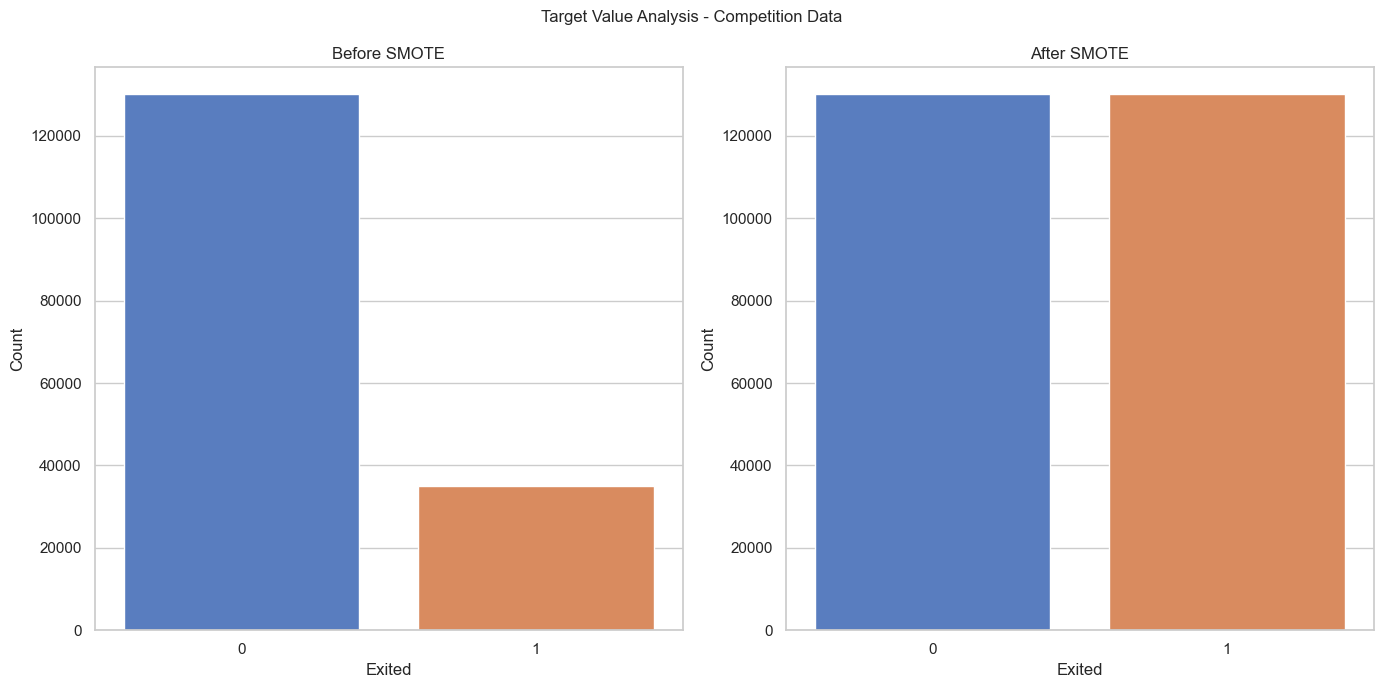

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and palette
sns.set(style="whitegrid", palette="muted")

# Create subplots for bar charts
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plot bar chart for data before SMOTE
sns.countplot(x='Exited', data=df, ax=ax[0], palette='muted')
ax[0].set_title('Before SMOTE')
ax[0].set_xlabel('Exited')
ax[0].set_ylabel('Count')

# Plot bar chart for data after SMOTE
sns.countplot(x='Exited', data=y_smote_df, ax=ax[1], palette='muted')
ax[1].set_title('After SMOTE')
ax[1].set_xlabel('Exited')
ax[1].set_ylabel('Count')

# Set the main title for the figure
plt.suptitle('Target Value Analysis - Competition Data', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [127]:
y_smote_df.shape

(260226, 1)

2.3 Categorical Variables Analysis:
In statistics, a categorical variable (also called qualitative variable) is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property. Categorical data is the statistical data type consisting of categorical variables or of data that has been converted into that form.

In our data categorical varibles are:

Geography
Gender
Tenure
NumOfProducts
HasCrCard
IsActiveMember

In our data Continuous variables are:

CreditScore
Age
Balance
EstimatedSalary

In [20]:
uni_count = df.nunique()
threshold = 12
continuous_vars = uni_count[uni_count.values > threshold].index.to_list()
categorical_vars = uni_count[uni_count.values <= threshold].index.to_list()

In [21]:
categorical_vars

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [22]:
continuous_vars

['id',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Age',
 'Balance',
 'EstimatedSalary']

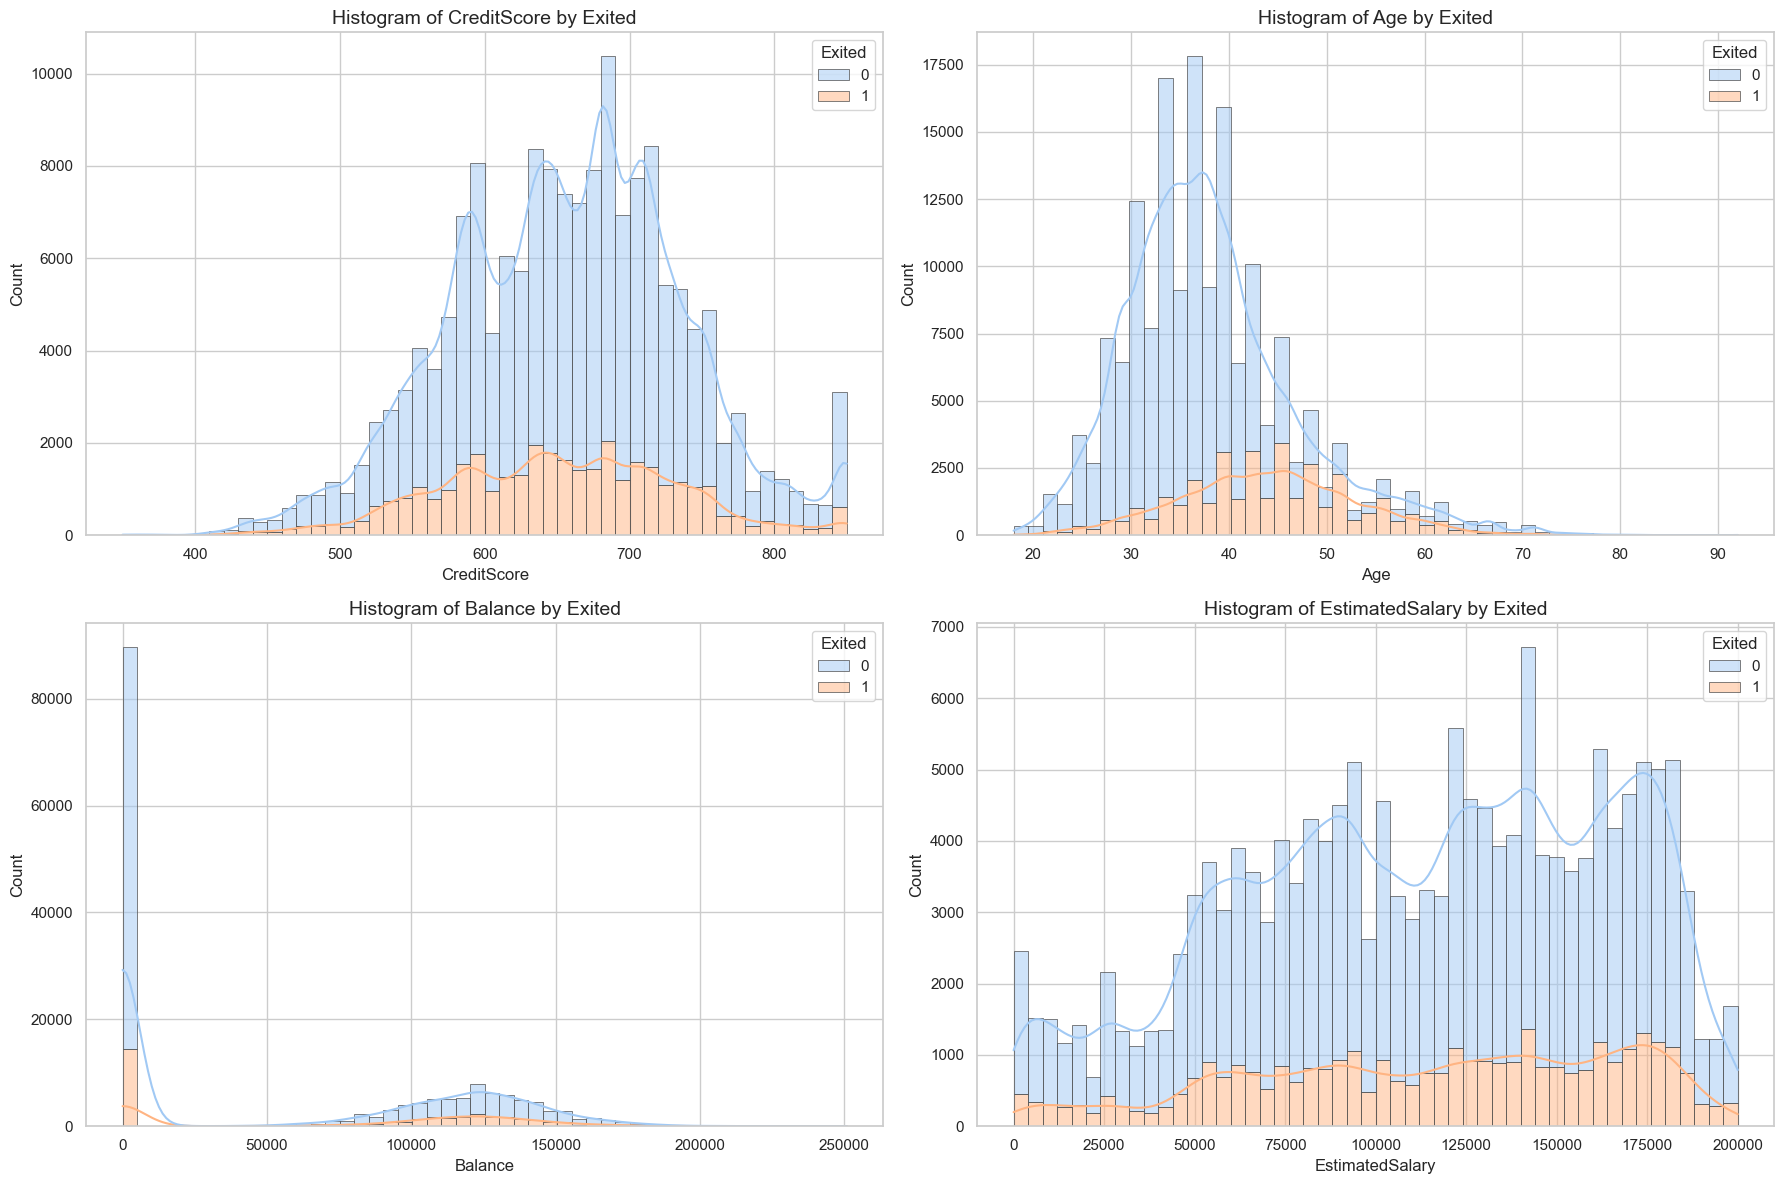

In [298]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous variables
continuous_vars = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']  # Replace with your actual continuous variables

# Number of continuous variables
num_vars = len(continuous_vars)

# Determine the layout for subplots (2 columns)
n_cols = 2
n_rows = (num_vars + 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))

# Flatten axes array if there's more than one row
if n_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Plot histograms for each continuous variable
for i, column in enumerate(continuous_vars):
    sns.histplot(data=df, x=column, hue="Exited", bins=50, kde=True, multiple="stack",
                 edgecolor=".3", linewidth=.5, ax=axes[i])
    
    # Customize labels and title
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].set_title(f'Histogram of {column} by Exited', fontsize=14)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [23]:
continuous_vars.remove('id')
continuous_vars.remove('CustomerId')

In [24]:
continuous_vars.remove('Surname')

In [25]:
# categorical_vars = ['Geography', 'Gender','Tenure', 'NumOfProducts','HasCrCard','IsActiveMember']
# continuous_vars = ['CreditScore','Age','Balance','EstimatedSalary']

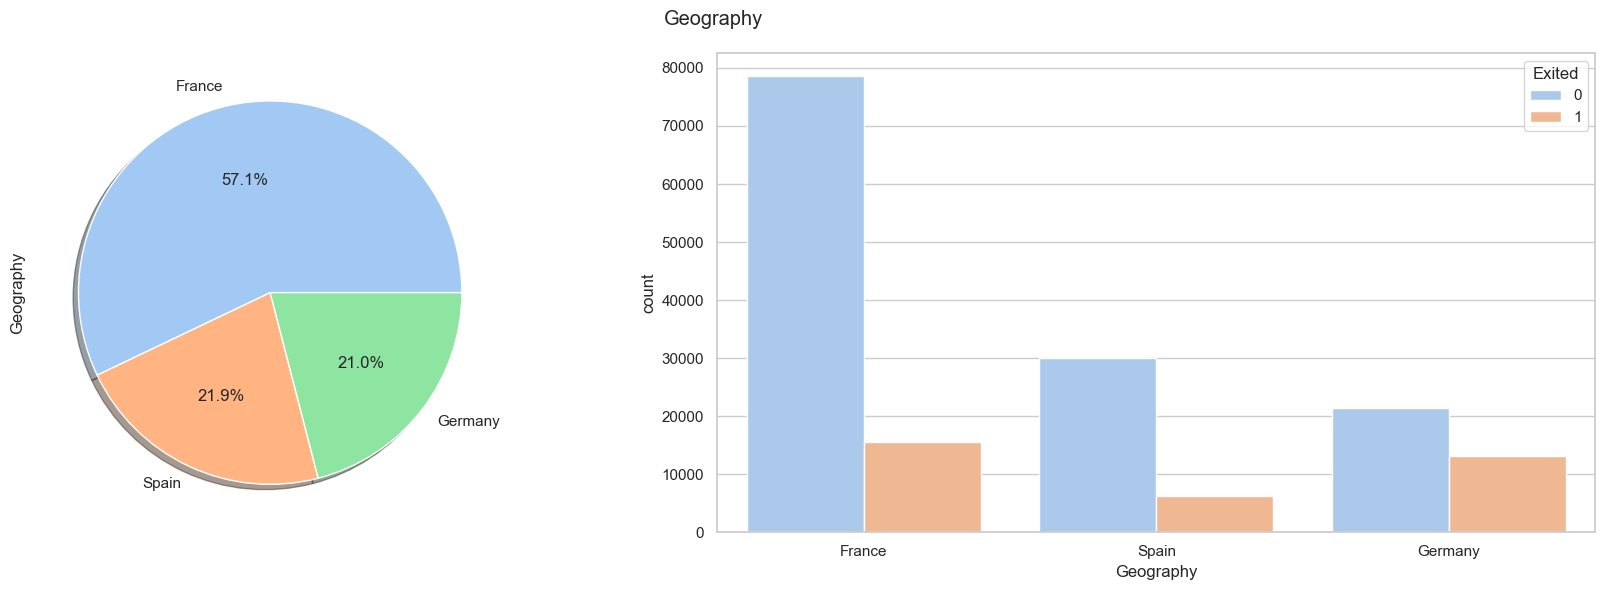

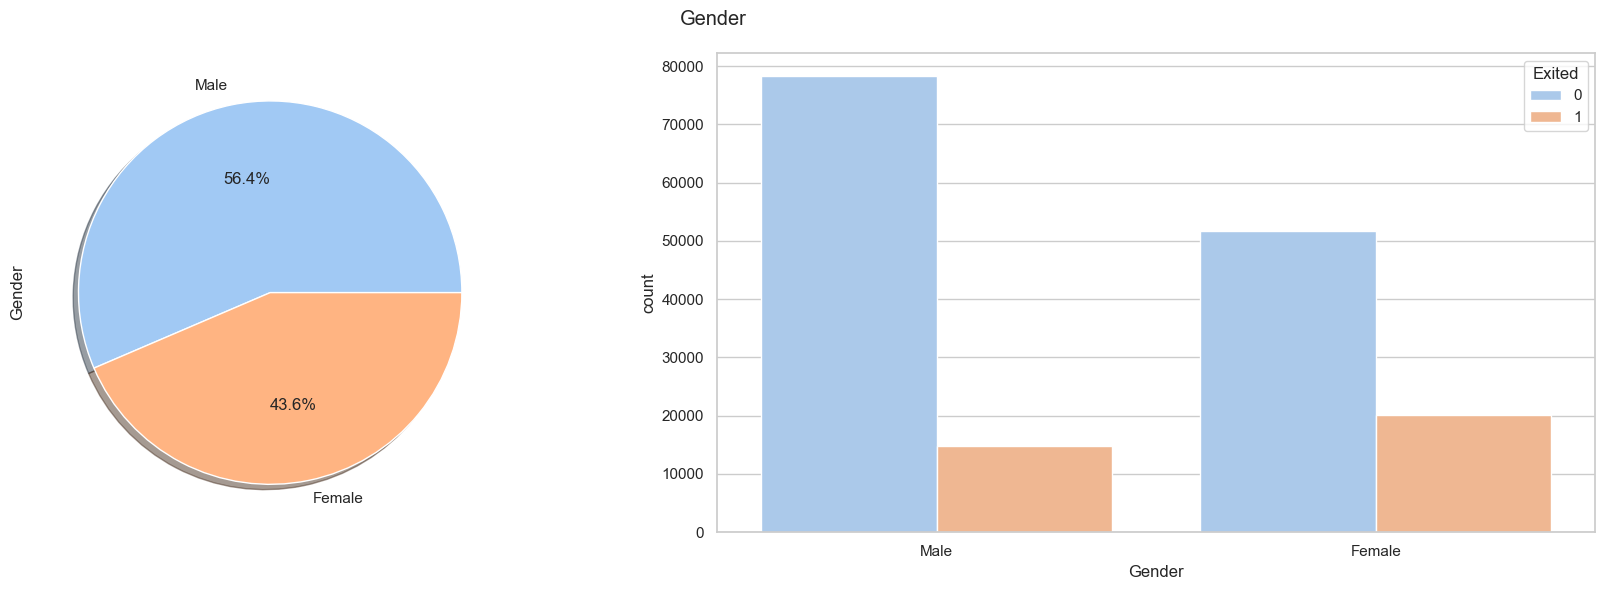

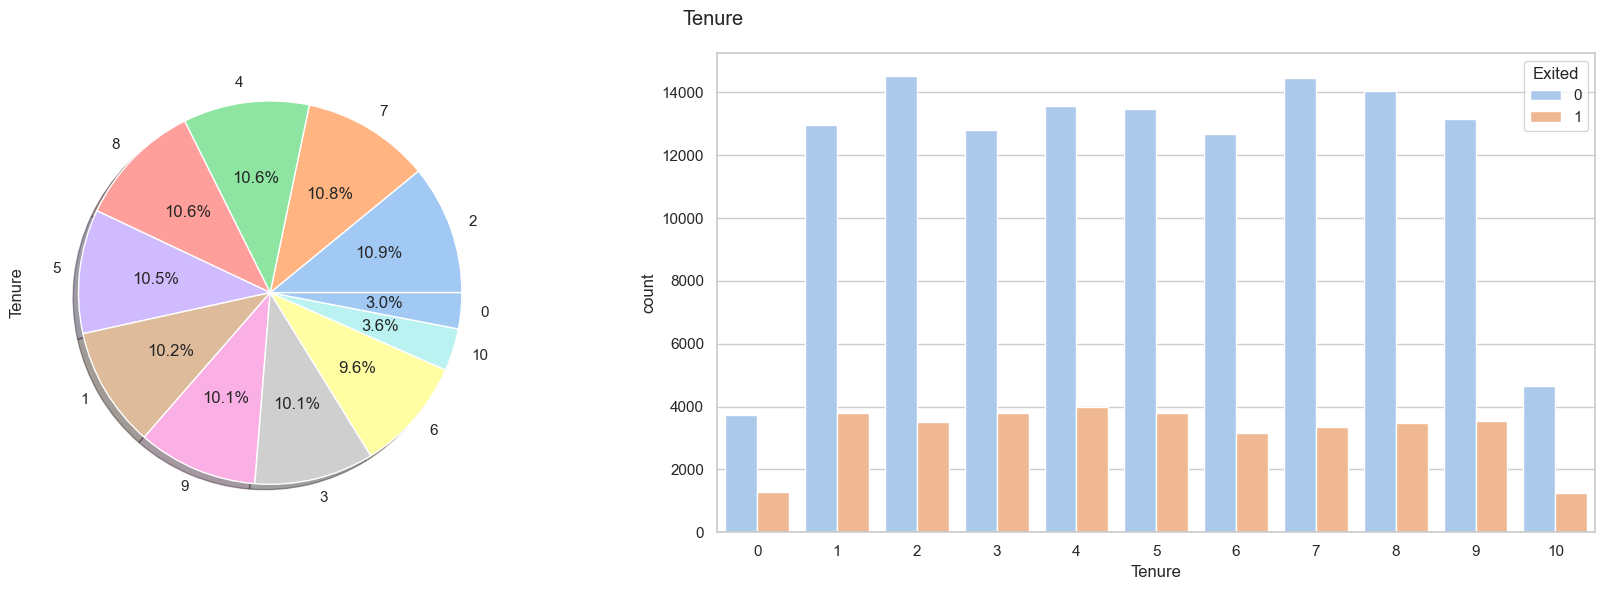

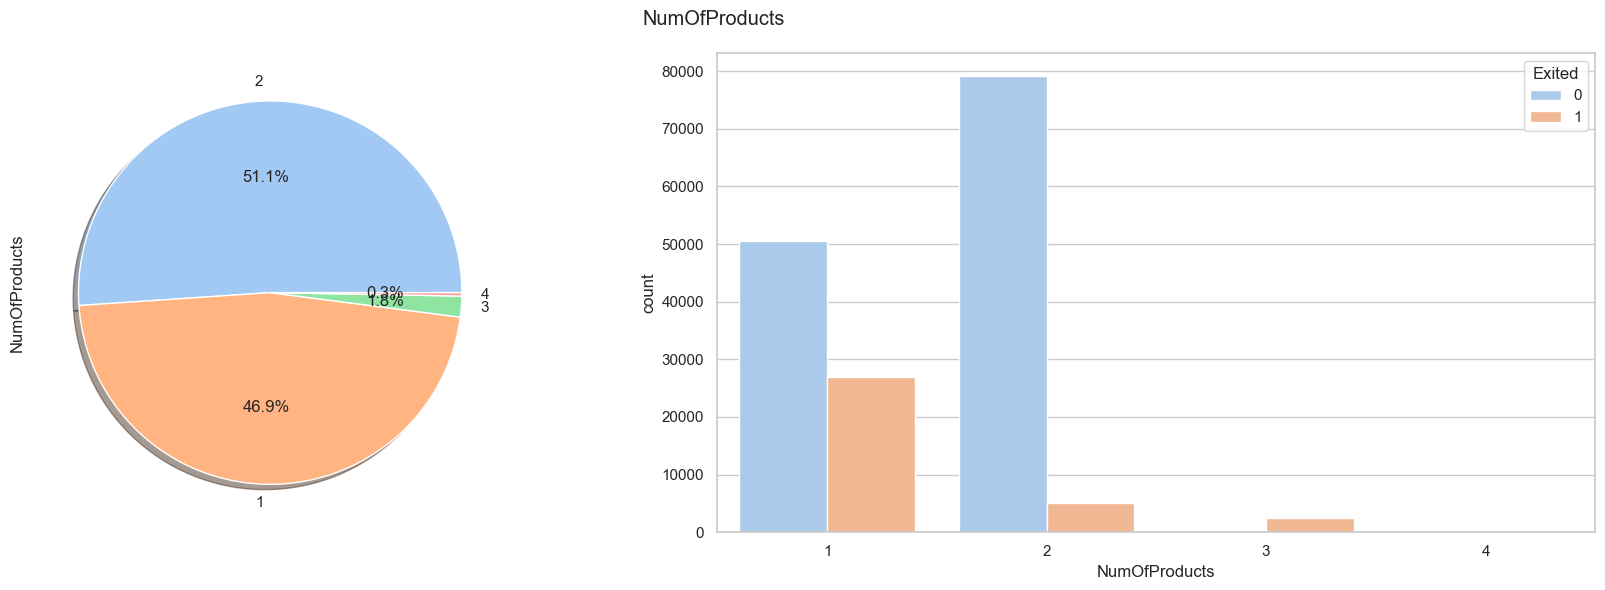

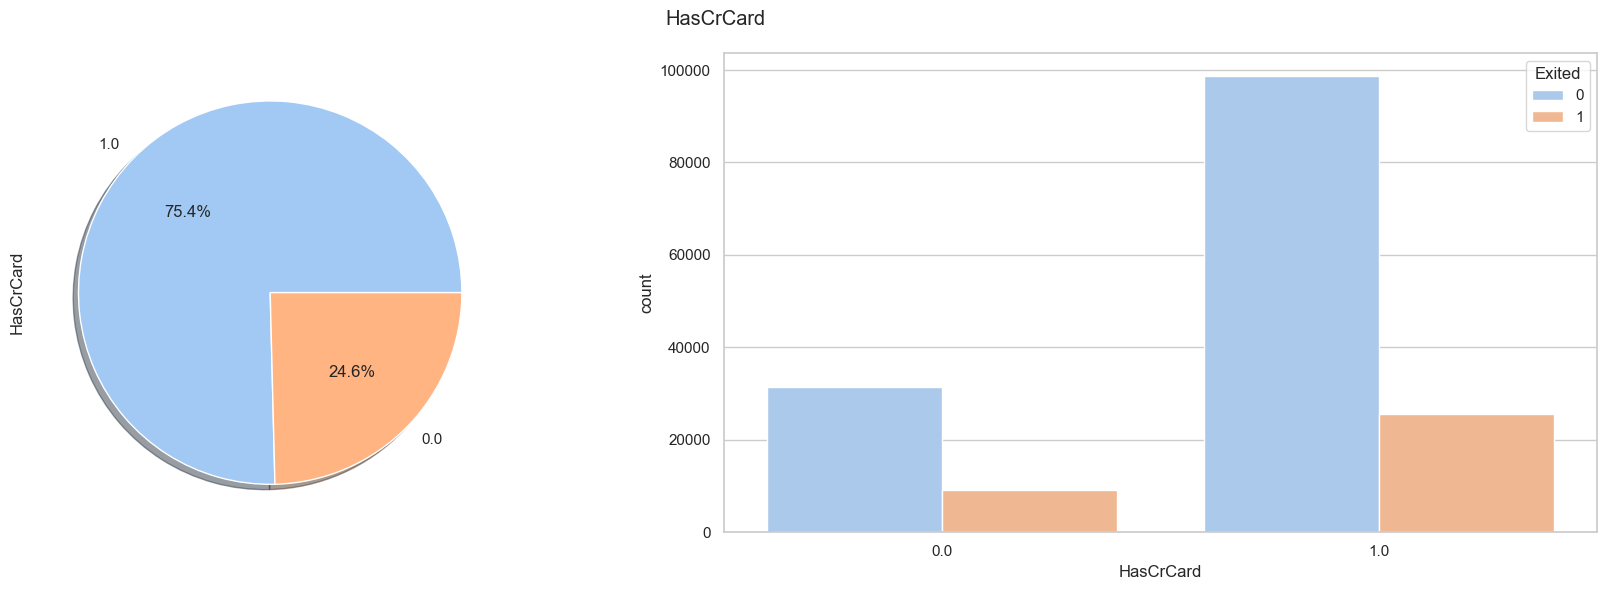

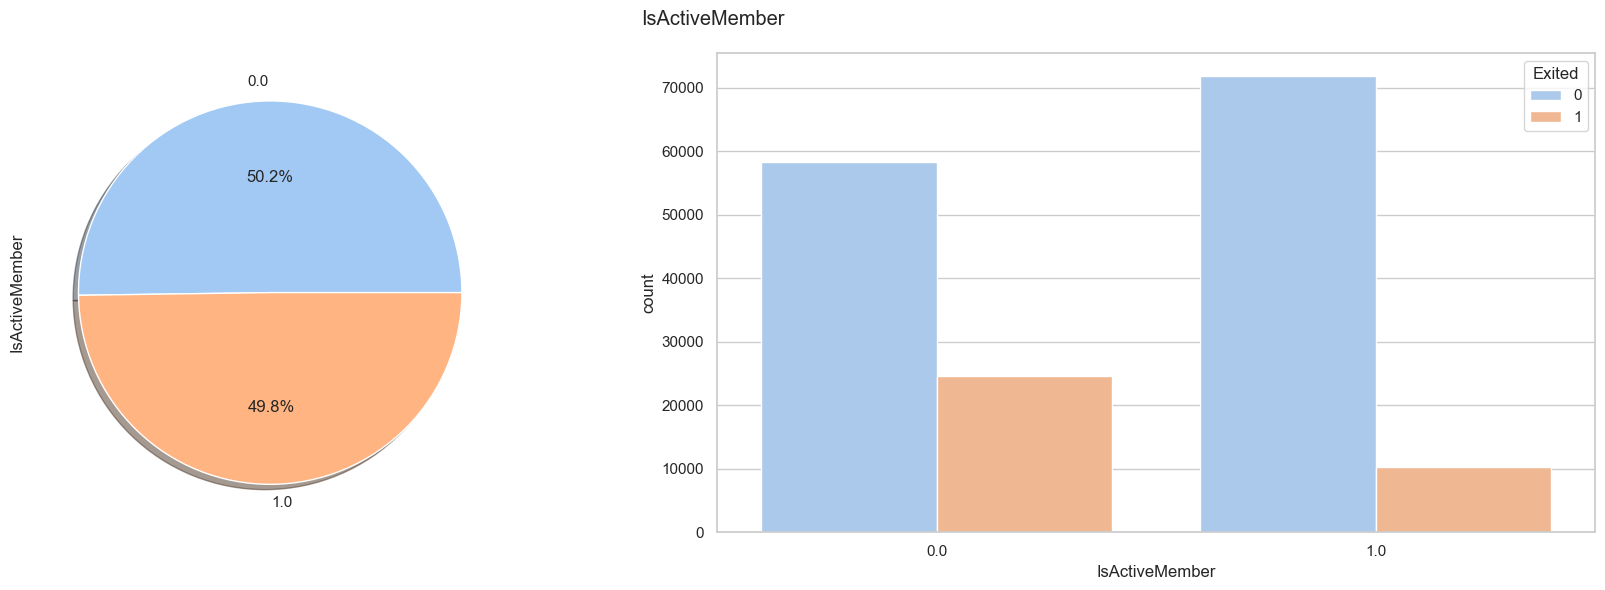

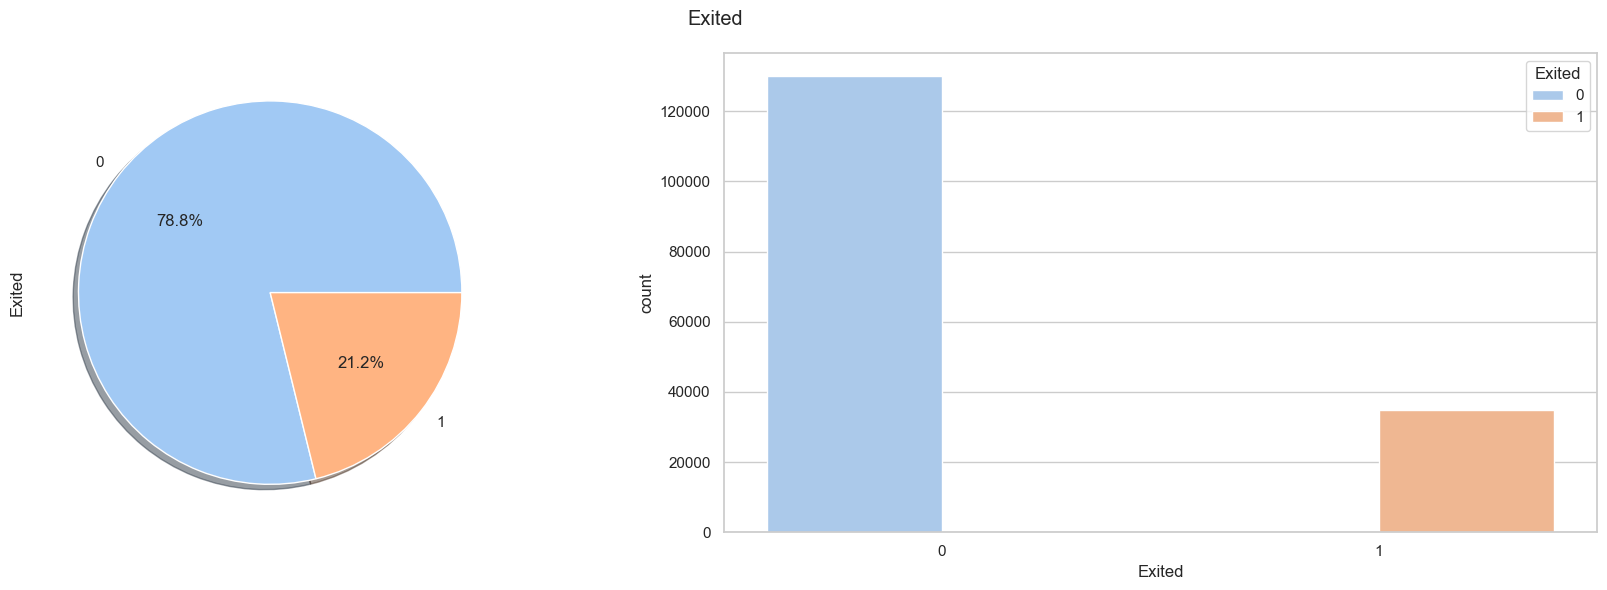

In [26]:
#Categorical Variables
sns.set(style='whitegrid', palette='pastel')

for column in categorical_vars:
    f,ax=plt.subplots(1,2,figsize=(18,6))
    df[column].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column,data=df,ax=ax[1],hue='Exited')
    plt.suptitle(f'{column}')
    
    plt.tight_layout()
    plt.show()

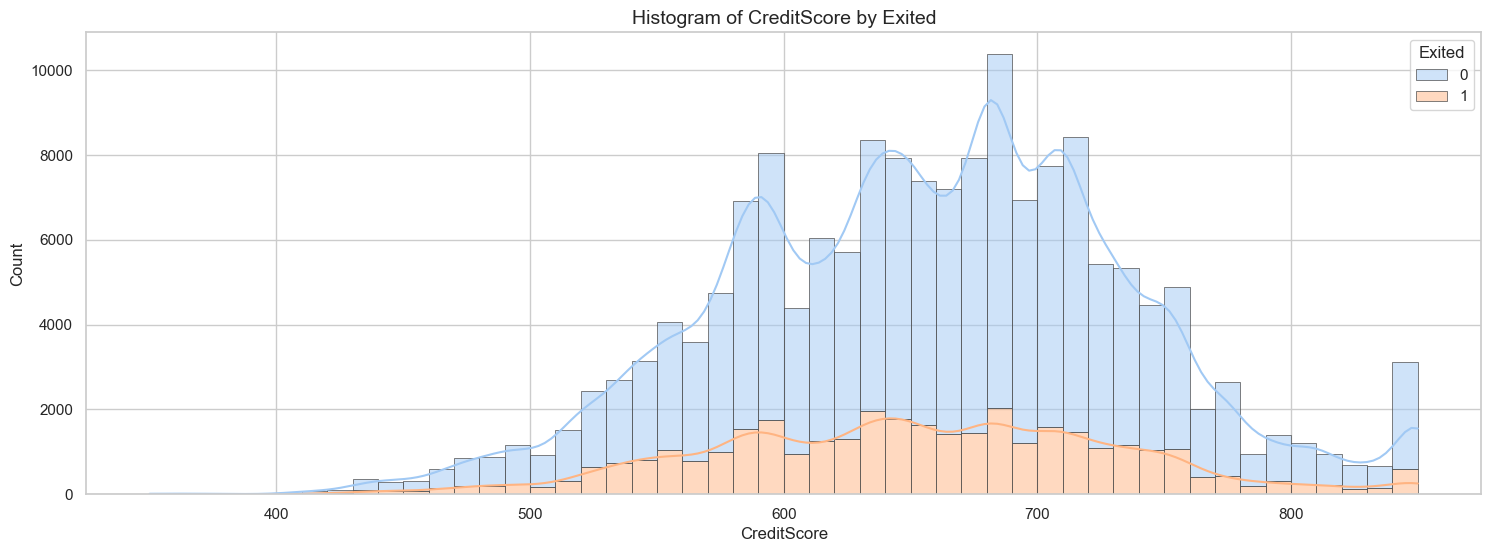

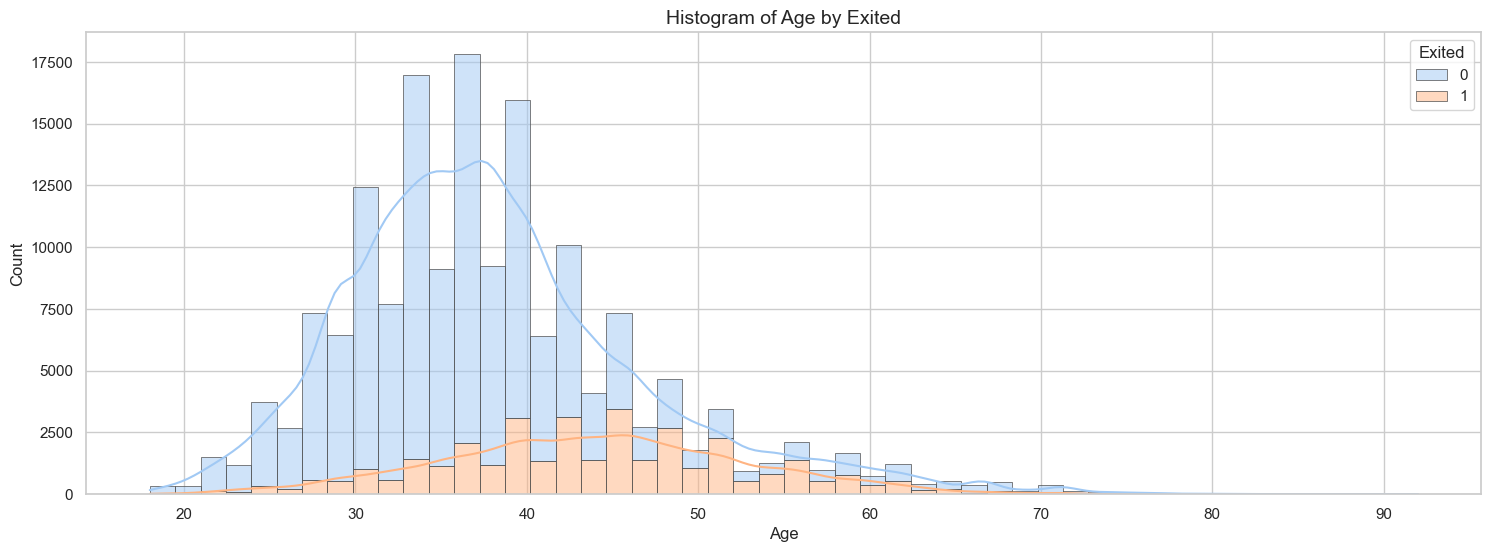

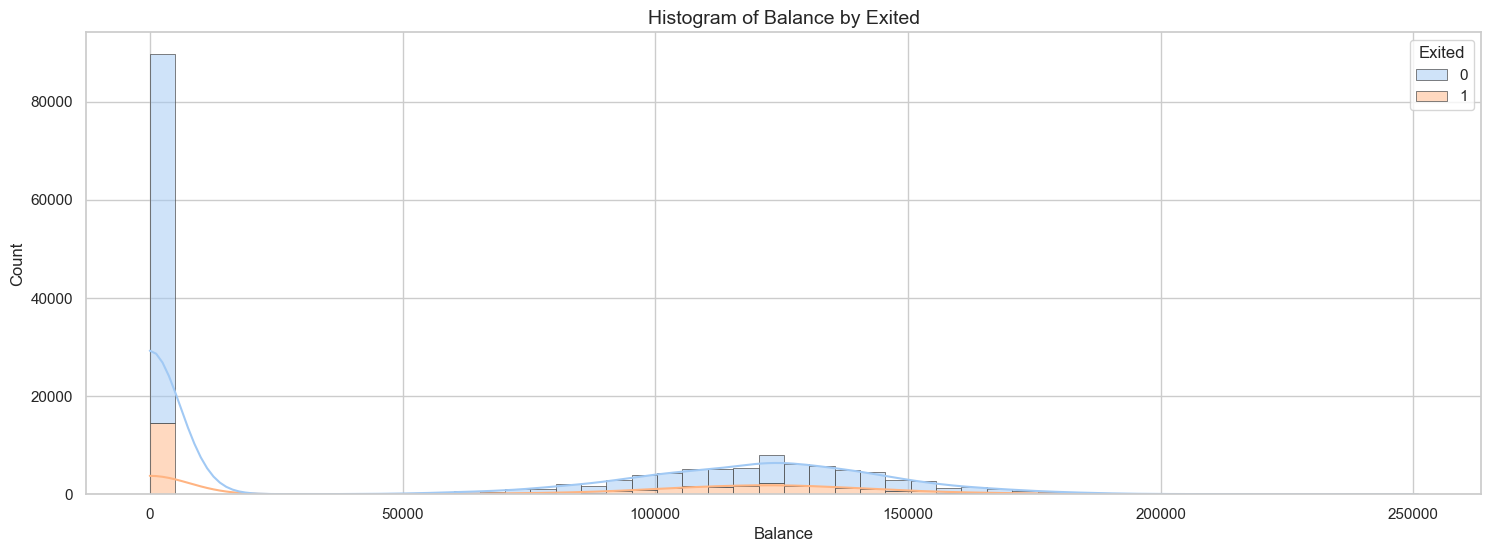

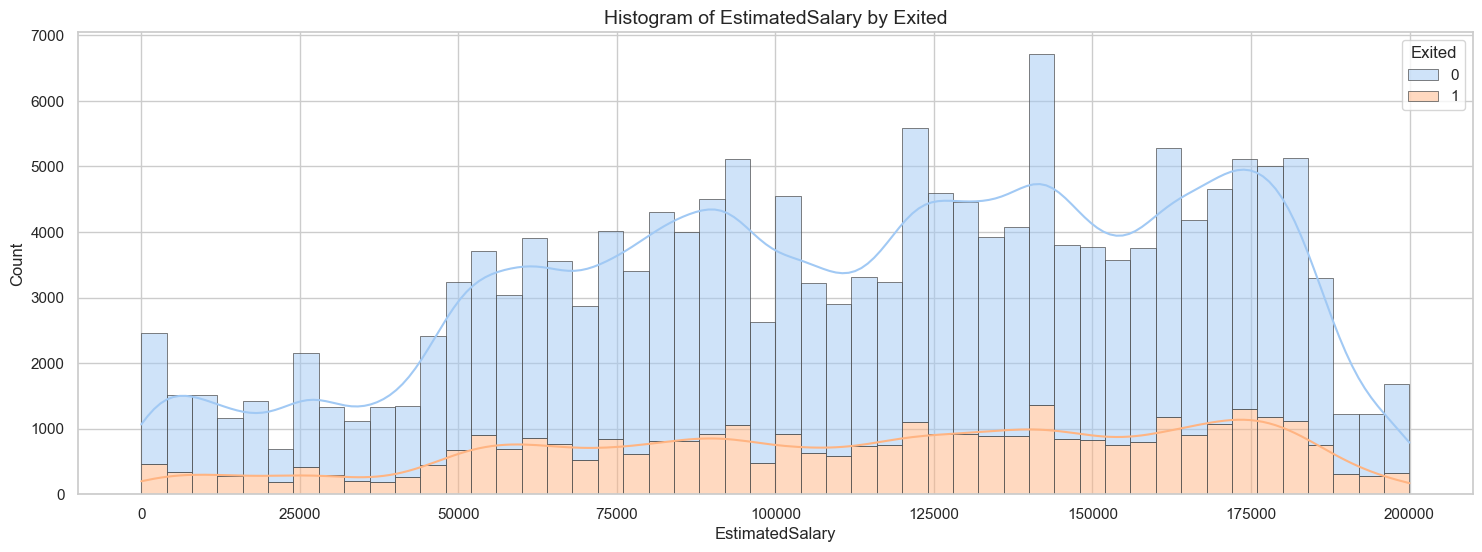

In [89]:
#Continuous Variable
sns.set(style="whitegrid", palette="pastel")

# Assuming df is your DataFrame containing the data
for column in continuous_vars:
    plt.figure(figsize=(18, 6))
    sns.histplot(data=df, x=column, hue="Exited", bins=50, kde=True, multiple="stack",
                 edgecolor=".3", linewidth=.5)
    
    # Customize labels and title
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Histogram of {column} by Exited', fontsize=14)
    
    # Show plot
    plt.show()

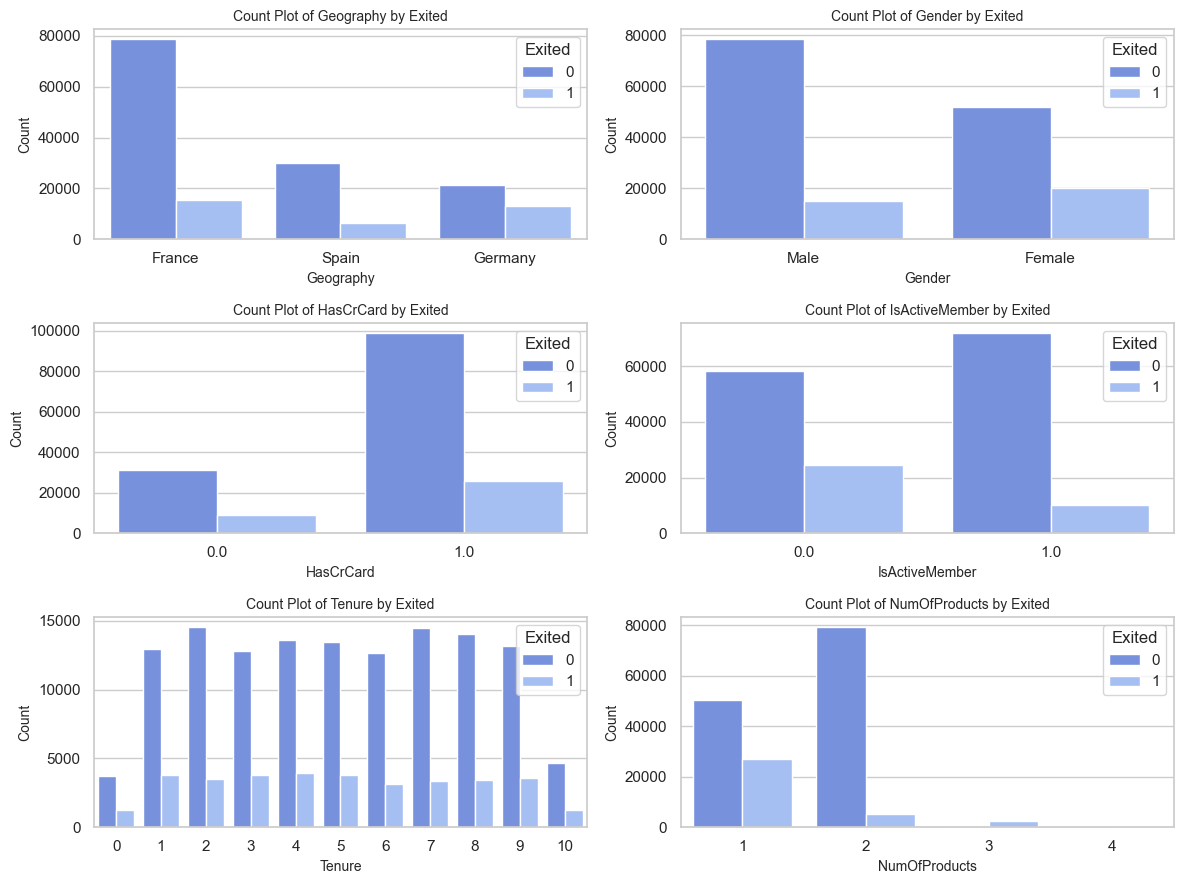

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', palette='coolwarm')


# Assuming df is your DataFrame containing the data
# List of categorical variables
categorical_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Tenure', 'NumOfProducts']  # Replace with your actual categorical variables

# Number of categorical variables
num_vars = len(categorical_vars)

# Determine the layout for subplots (2 columns)
n_cols = 2
n_rows = (num_vars + 1) // n_cols

# Create subplots for bar charts
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))

# Flatten axes array if there's more than one row
if n_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Plot bar charts for each categorical variable
for i, column in enumerate(categorical_vars):
    sns.countplot(x=column, data=df, hue='Exited', ax=axes[i])
    
    # Customize labels and title
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].set_title(f'Count Plot of {column} by Exited', fontsize=10)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


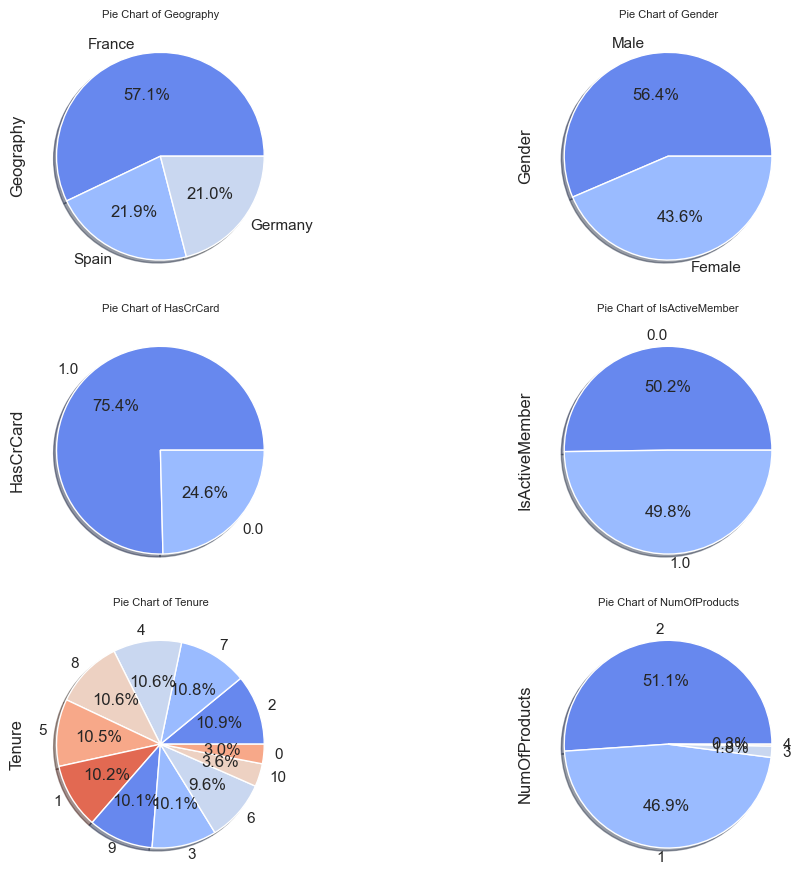

In [270]:
import matplotlib.pyplot as plt
sns.set(style='whitegrid', palette='coolwarm')


# Assuming df is your DataFrame containing the data
# List of categorical variables
# categorical_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']  # Replace with your actual categorical variables

# Number of categorical variables
num_vars = len(categorical_vars)

# Determine the layout for subplots (2 columns)
n_cols = 2
n_rows = (num_vars + 1) // n_cols

# Create subplots for pie charts
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))

# Flatten axes array if there's more than one row
if n_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Plot pie charts for each categorical variable
for i, column in enumerate(categorical_vars):
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i], shadow=True)
    axes[i].set_ylabel(f'{column}')
    axes[i].set_title(f'Pie Chart of {column}', fontsize=8)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


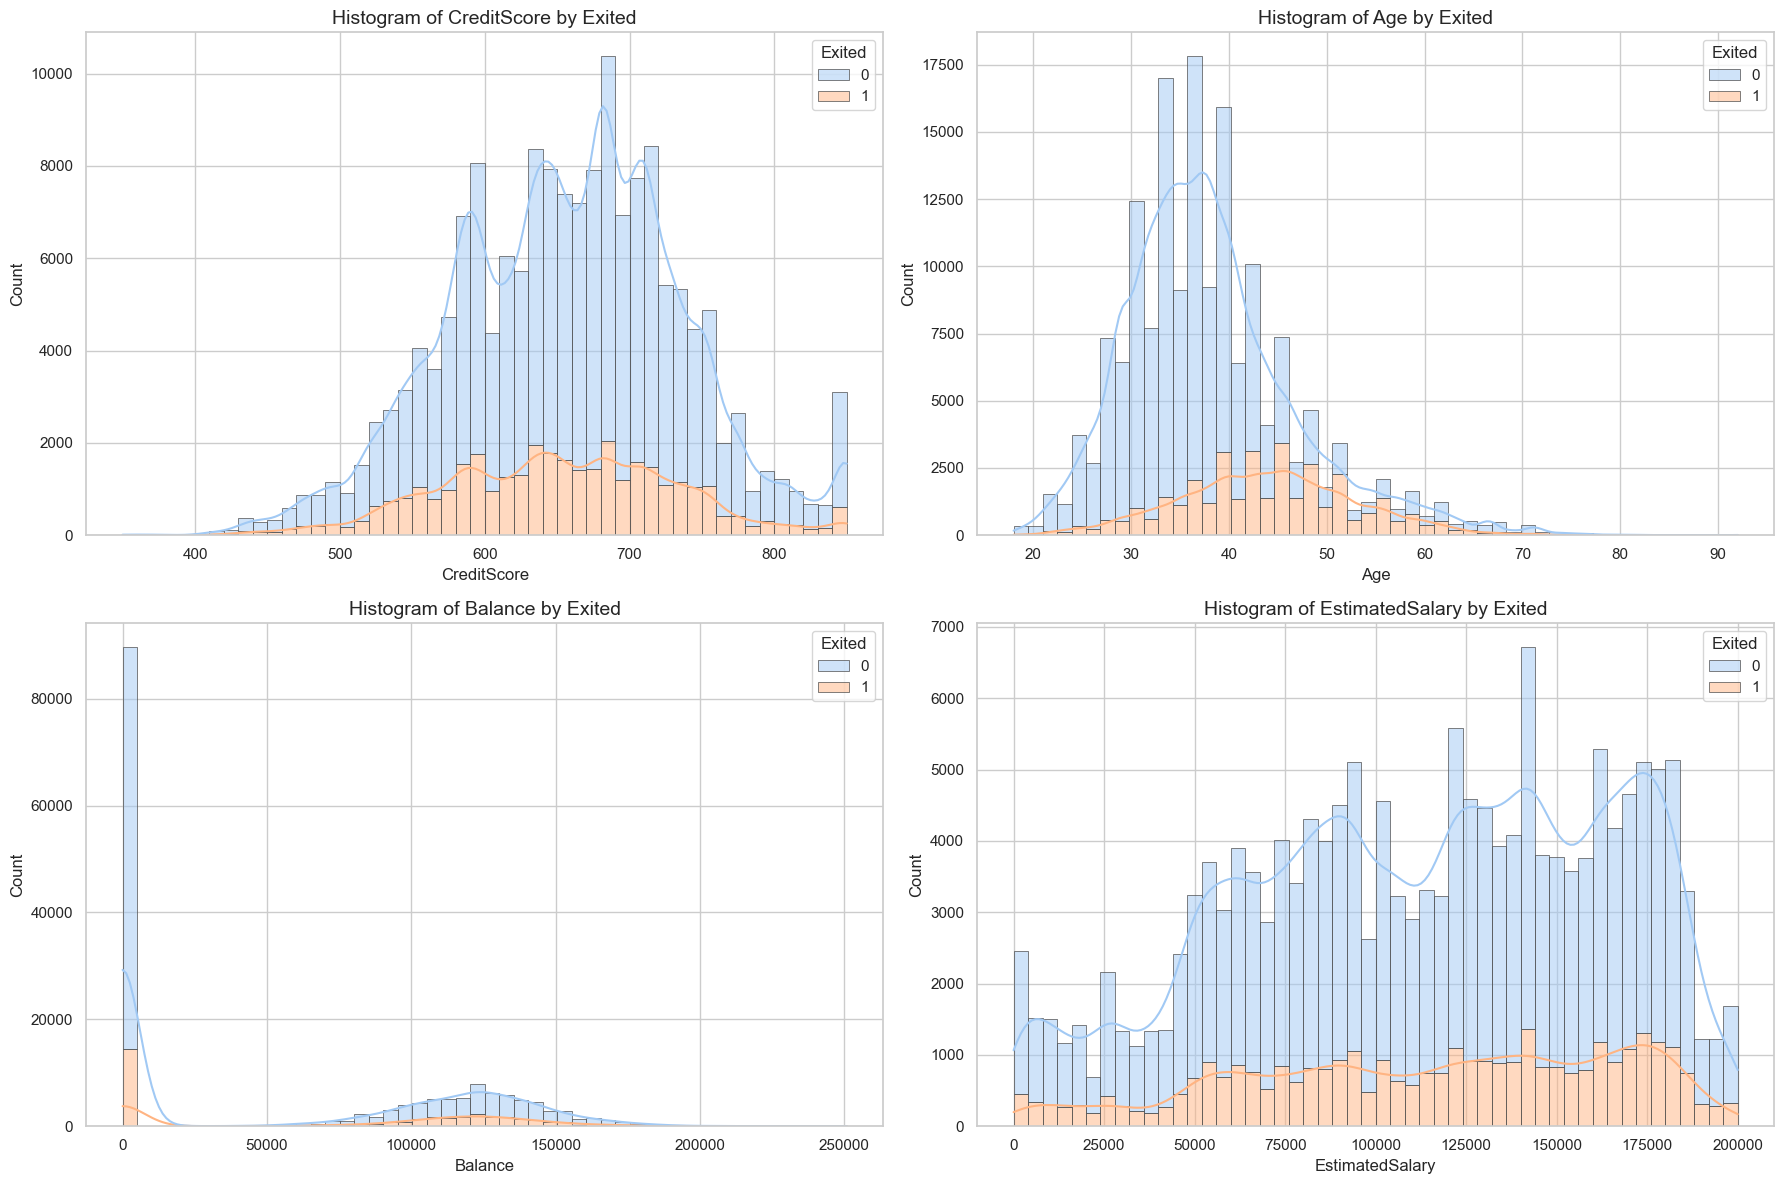

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous variables
continuous_vars = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']  # Replace with your actual continuous variables

# Number of continuous variables
num_vars = len(continuous_vars)

# Determine the layout for subplots (2 columns)
n_cols = 2
n_rows = (num_vars + 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))

# Flatten axes array if there's more than one row
if n_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Plot histograms for each continuous variable
for i, column in enumerate(continuous_vars):
    sns.histplot(data=df, x=column, hue="Exited", bins=50, kde=True, multiple="stack",
                 edgecolor=".3", linewidth=.5, ax=axes[i])
    
    # Customize labels and title
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].set_title(f'Histogram of {column} by Exited', fontsize=14)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



In [115]:
X.head()

CreditScore       Age    Tenure   Balance  EstimatedSalary  Gender_Male  \
0     0.144135 -0.578074 -0.719973 -0.883163         1.369486            1   
1    -0.367706 -0.578074 -1.432694 -0.883163        -1.254085            1   
2     0.268974  0.211354  1.774548 -0.883163         1.437422            1   
3    -0.941966 -0.465299 -1.076334  1.486918        -0.557018            1   
4     0.743362 -0.578074 -0.007253 -0.883163        -1.938770            1   

   Geography_Germany  Geography_Spain  NumOfProducts_2  NumOfProducts_3  \
0                  0                0                1                0   
1                  0                0                1                0   
2                  0                0                1                0   
3                  0                0                0                0   
4                  0                1                1                0   

   NumOfProducts_4  HasCrCard_1.0  IsActiveMember_1.0  
0                0              1                   0  
1                0              1                   1  
2                0              1                   0  
3                0              1                   1  
4                0              1                   1

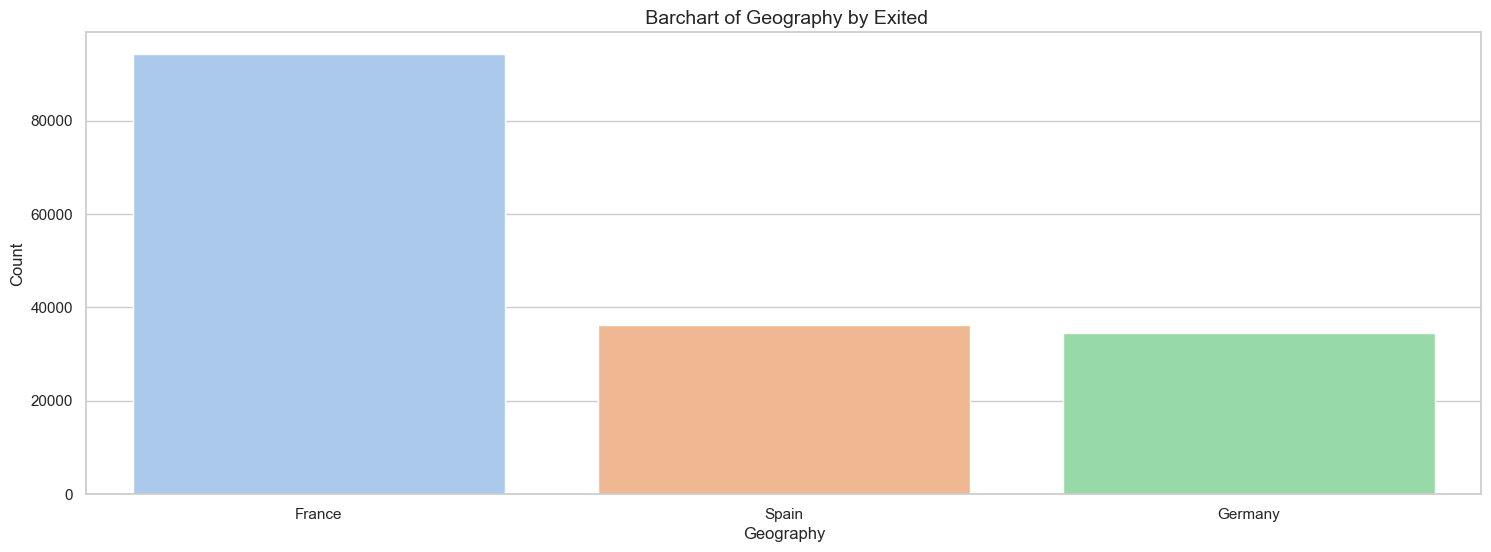

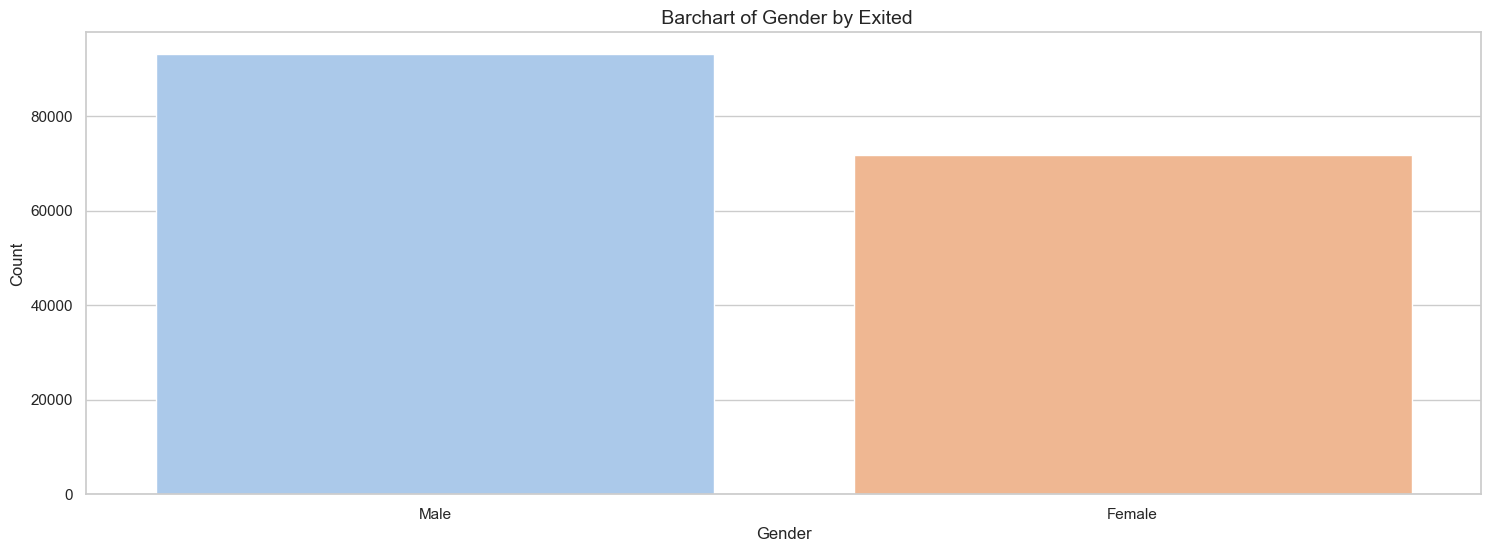

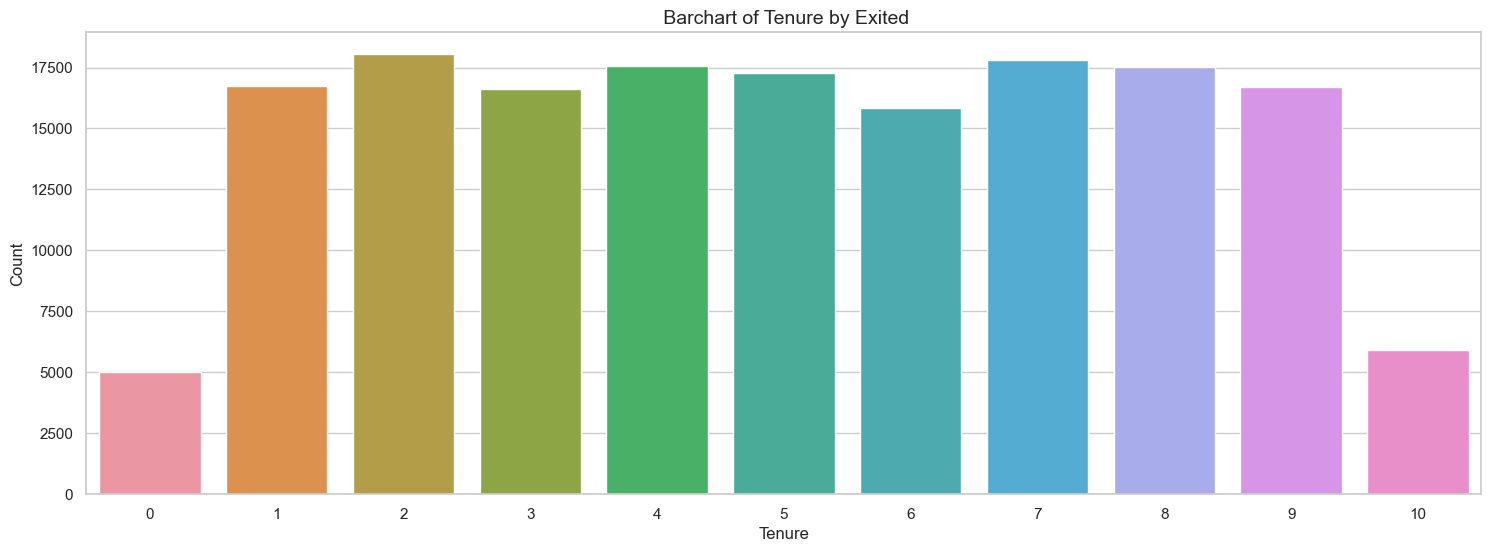

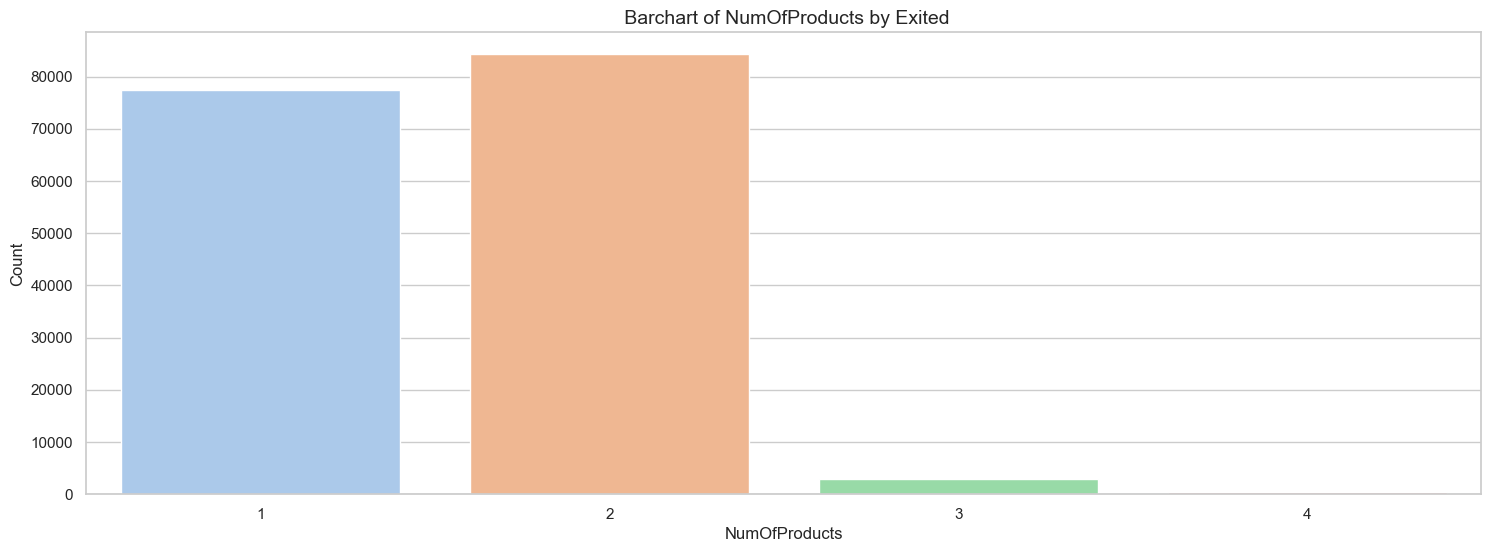

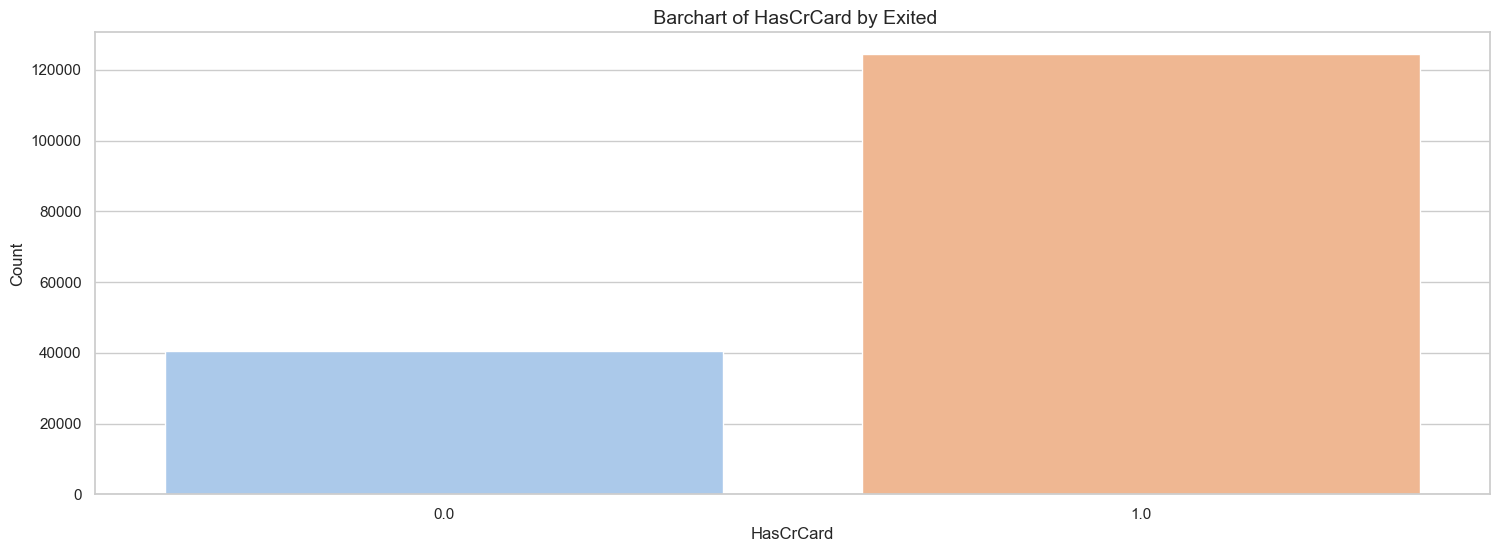

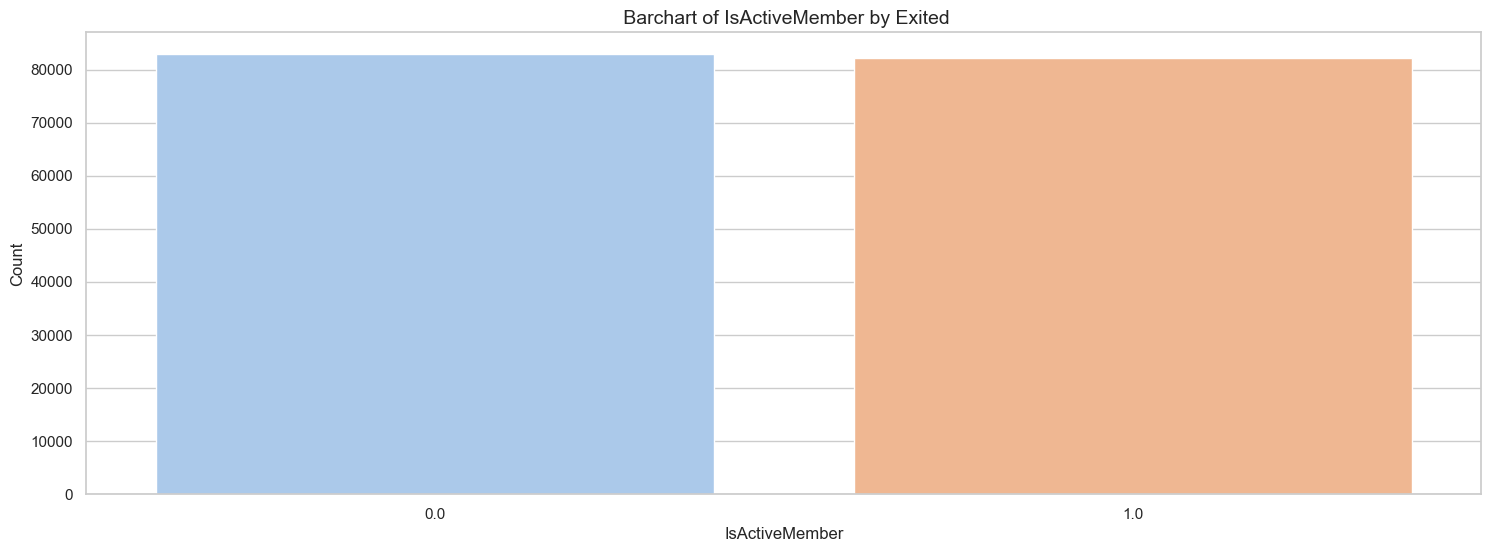

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust Seaborn style and palette
sns.set(style="whitegrid", palette="pastel")

# Assuming df is your DataFrame containing the data
for column in categorical_vars:
    plt.figure(figsize=(18, 6))
    
    # Countplot
    sns.countplot(x=column, data=df)
    
    # Customize labels and title
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f' Barchart of {column} by Exited', fontsize=14)
    
    # Show plot
    plt.show()

<AxesSubplot: title={'center': 'Target Variable Analysis (Exited) '}, xlabel='Exited', ylabel='count'>

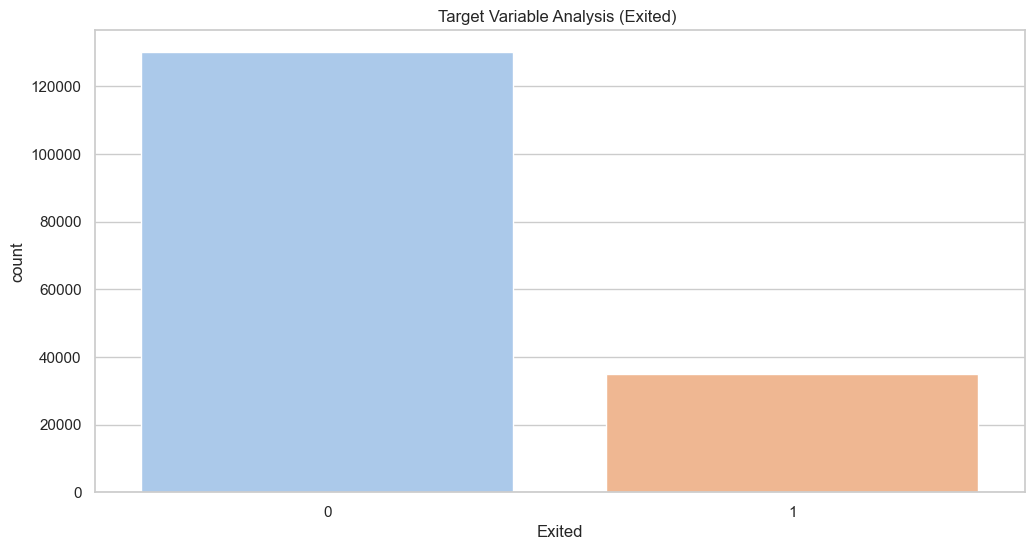

In [46]:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(12, 6))
plt.xlabel(column, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title(f'Target Variable Analysis (Exited) ', fontsize=12)

# Countplot
sns.countplot(x='Exited', data=df)


<Figure size 2000x1000 with 0 Axes>

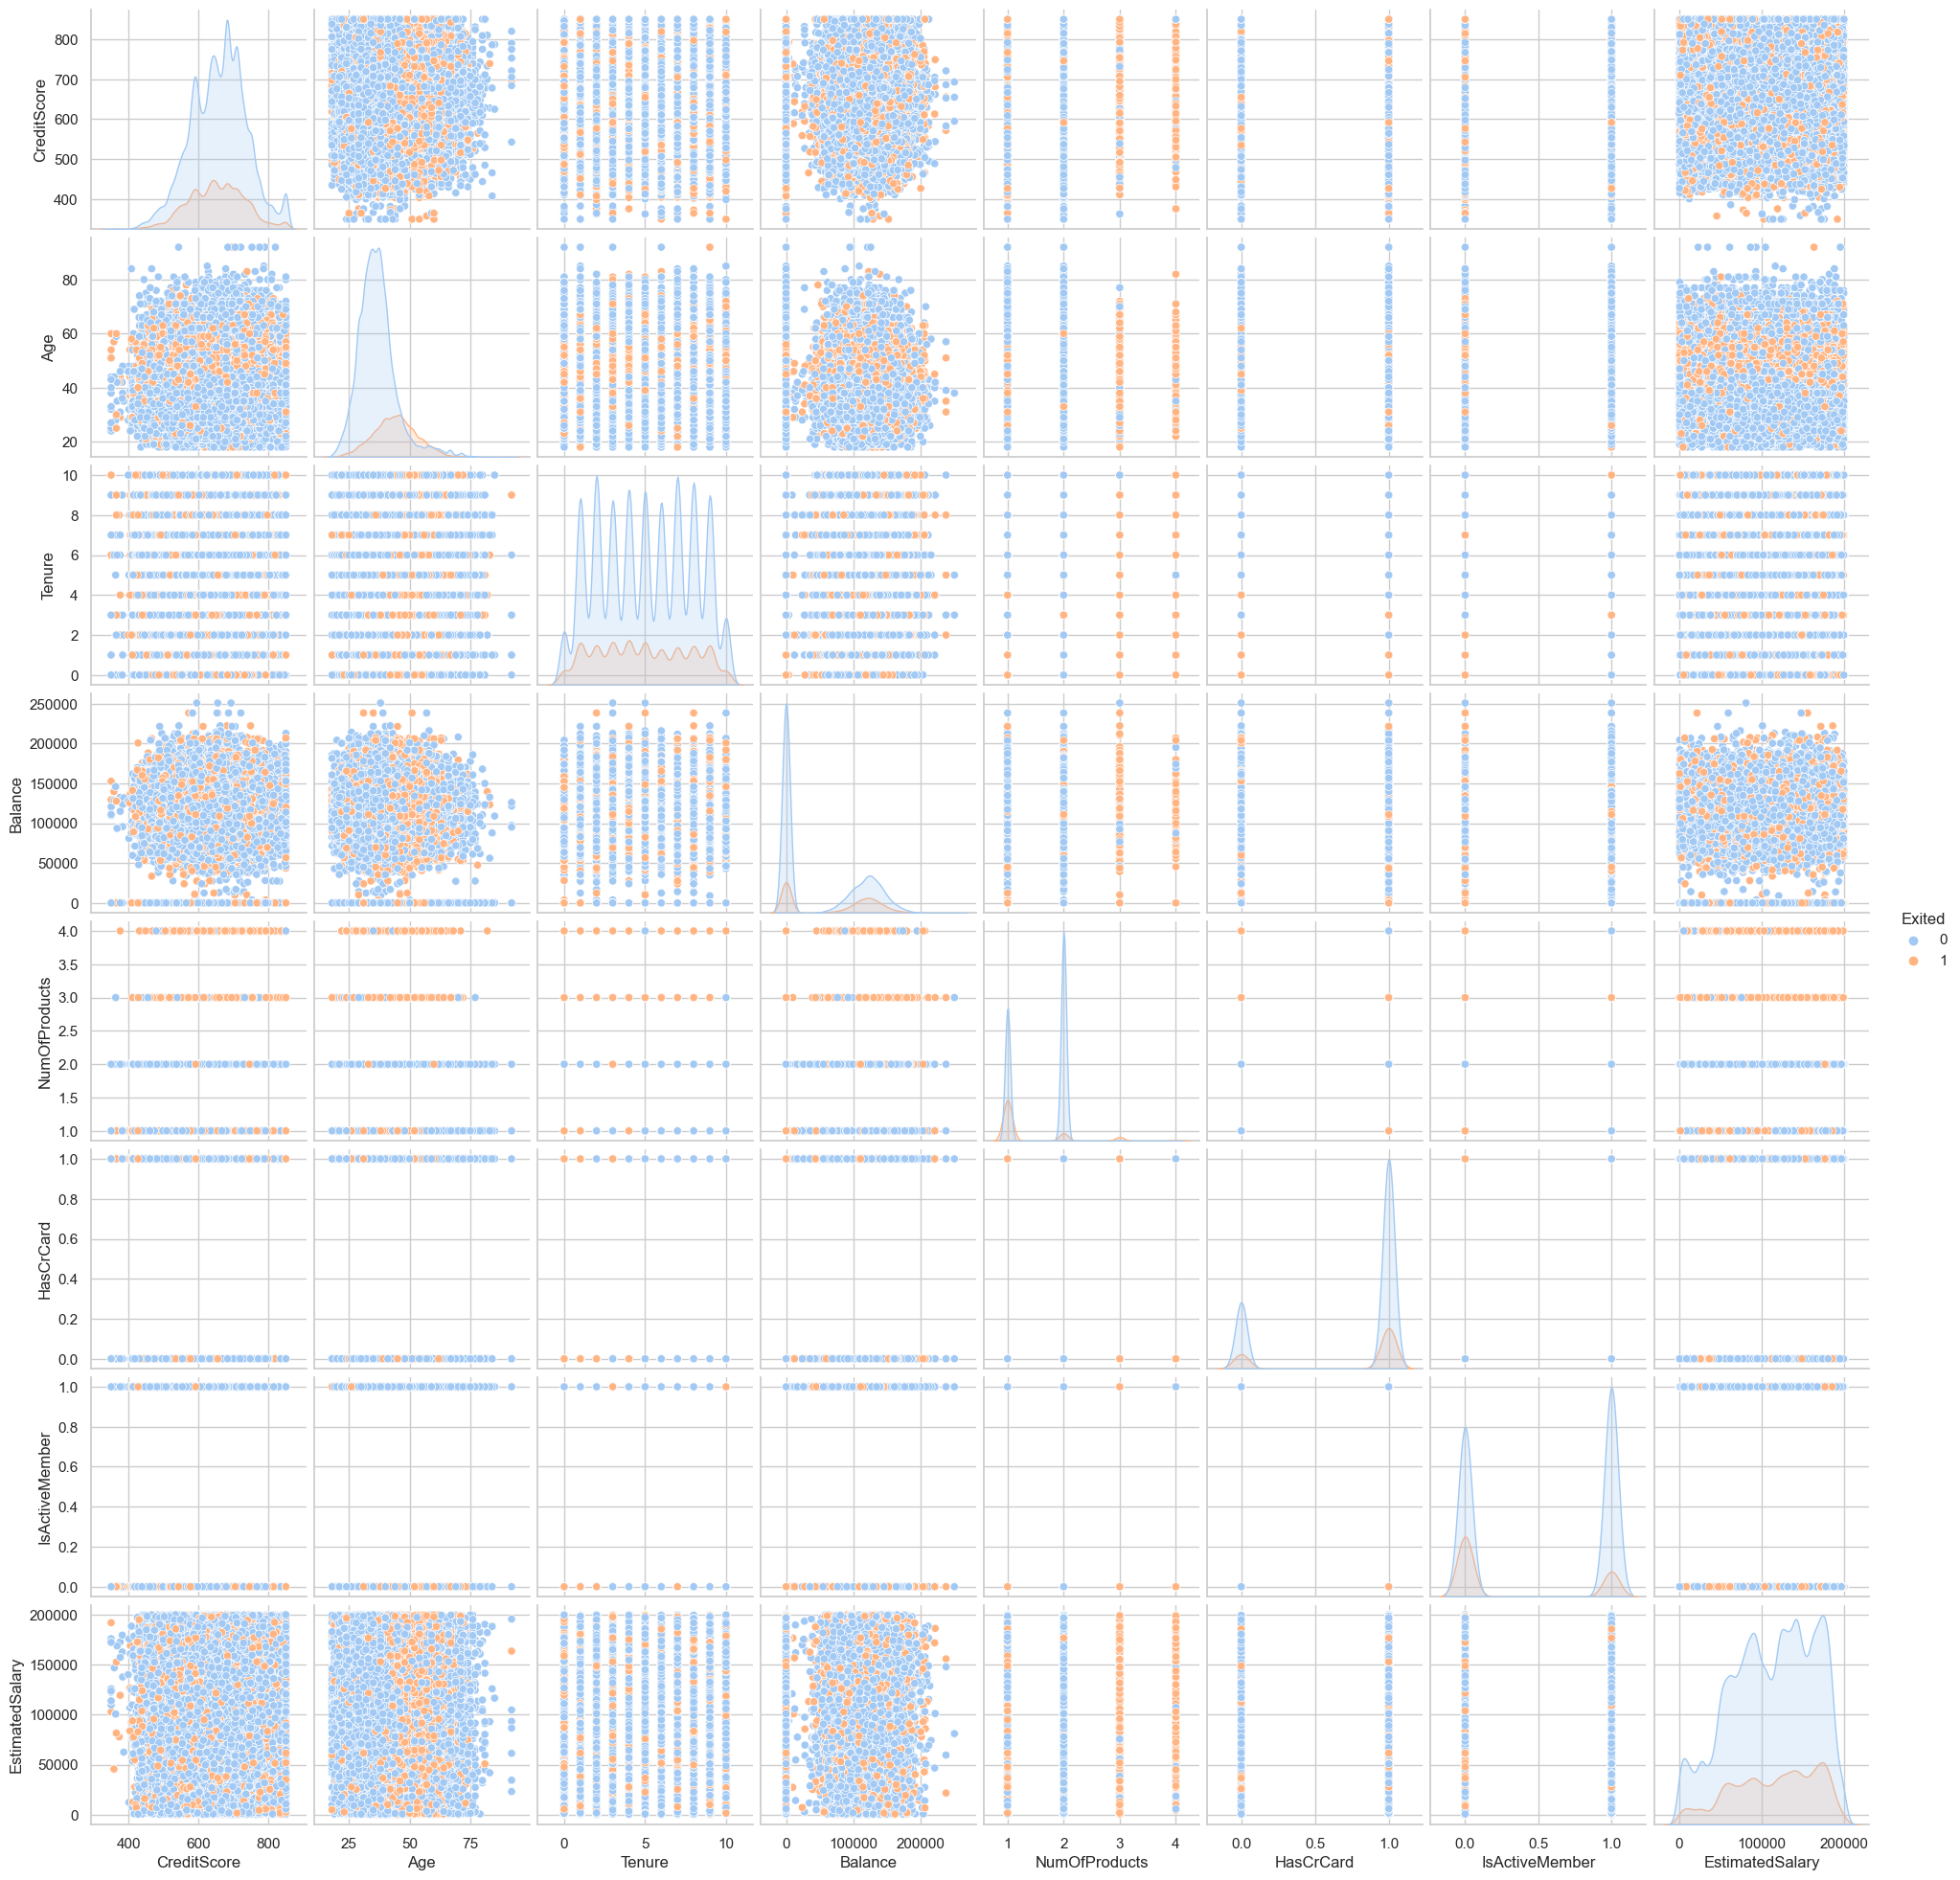

In [131]:
# Plot pair plot with 'Exited' as the hue
plt.figure(figsize=(20,10))
sns.pairplot(df_1, hue='Exited')
plt.show()

In [15]:
df_1 = df.drop(columns=['id', 'CustomerId', 'Surname', 'Geography', 'Gender'])

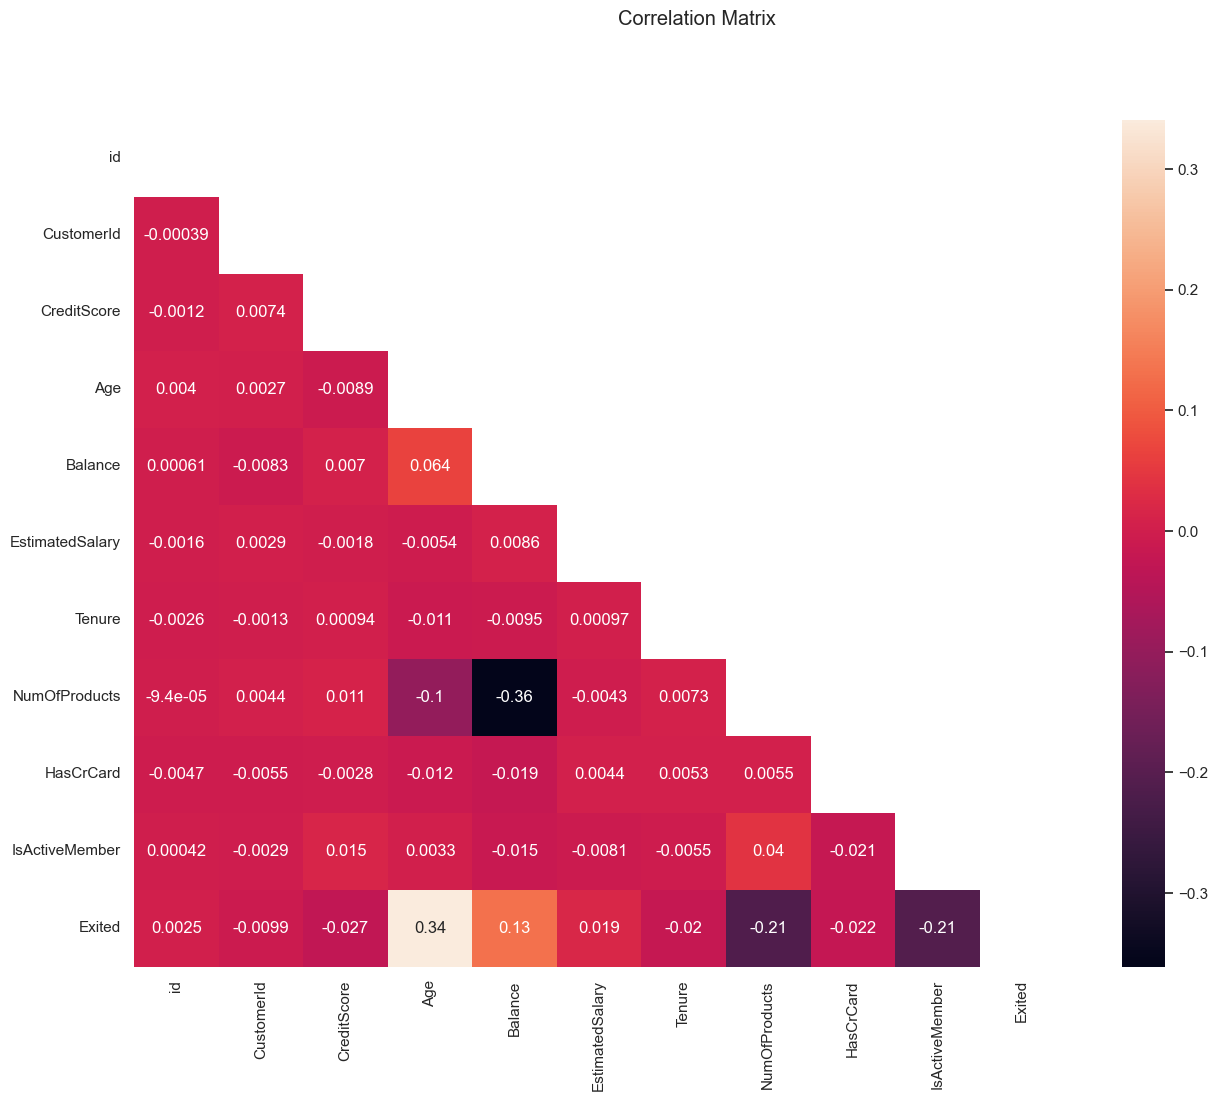

In [22]:
df4 = df[['id', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

corr_matrix=df4.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for correlation analysis
df4 = df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 
          'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

# # Compute correlation matrix
# corr_matrix = df4.corr()

# # Create a mask to hide the upper triangle of the heatmap
# mask = np.zeros_like(corr_matrix)
# mask[np.triu_indices_from(mask)] = True

# # Set up the plot with appropriate theme
# sns.set(style="whitegrid", palette="pastel")

# # Set up the figure
# plt.figure(figsize=(15, 11))

# # Plot heatmap with Seaborn
# sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# # Customize title and labels
# plt.title('Correlation Matrix of Features', fontsize=16)
# plt.xlabel('Features', fontsize=12)
# plt.ylabel('Features', fontsize=12)

# # Adjust layout
# plt.tight_layout()

# # Display the plot
# plt.show()

In [114]:
X

(165034, 13)

#### Data Manipulation
1. Binning Age Variable
2. Scaling of Income, Credit Score and Balance Variable
3. One hot encoding HasCrCard, Tenure, IsActiveMember, NumofProduts, Gender and Geography


In [470]:
y = df['Exited']
X = df.drop(['id', 'CustomerId','Surname','Exited'], axis=1)

X = pd.get_dummies(data=X, columns=['Gender', 
                                    'Geography',
                                    'NumOfProducts',
                                    'HasCrCard', 
                                    'IsActiveMember'], drop_first='True')

sc = StandardScaler()
X[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = sc.fit_transform(X[['CreditScore',
                                                                                        'Age',
                                                                                        'Tenure',
                                                                                        'Balance',
                                                                                        'EstimatedSalary']])

X.head()

CreditScore       Age    Tenure   Balance  EstimatedSalary  Gender_Male  \
0     0.144135 -0.578074 -0.719973 -0.883163         1.369486            1   
1    -0.367706 -0.578074 -1.432694 -0.883163        -1.254085            1   
2     0.268974  0.211354  1.774548 -0.883163         1.437422            1   
3    -0.941966 -0.465299 -1.076334  1.486918        -0.557018            1   
4     0.743362 -0.578074 -0.007253 -0.883163        -1.938770            1   

   Geography_Germany  Geography_Spain  NumOfProducts_2  NumOfProducts_3  \
0                  0                0                1                0   
1                  0                0                1                0   
2                  0                0                1                0   
3                  0                0                0                0   
4                  0                1                1                0   

   NumOfProducts_4  HasCrCard_1.0  IsActiveMember_1.0  
0                0              1                   0  
1                0              1                   1  
2                0              1                   0  
3                0              1                   1  
4                0              1                   1

In [18]:
df.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [ ]:
df_1 = df[['CreditScore', 'Geography', ]]

In [ ]:
plt.figure(figsize=(12,6))
df.apply(lambda x: df.corr(y)).plot(kind='bar')
plt.title('Correlations with the predicted variable')
plt.xticks(rotation=45)
plt.tight_layout()

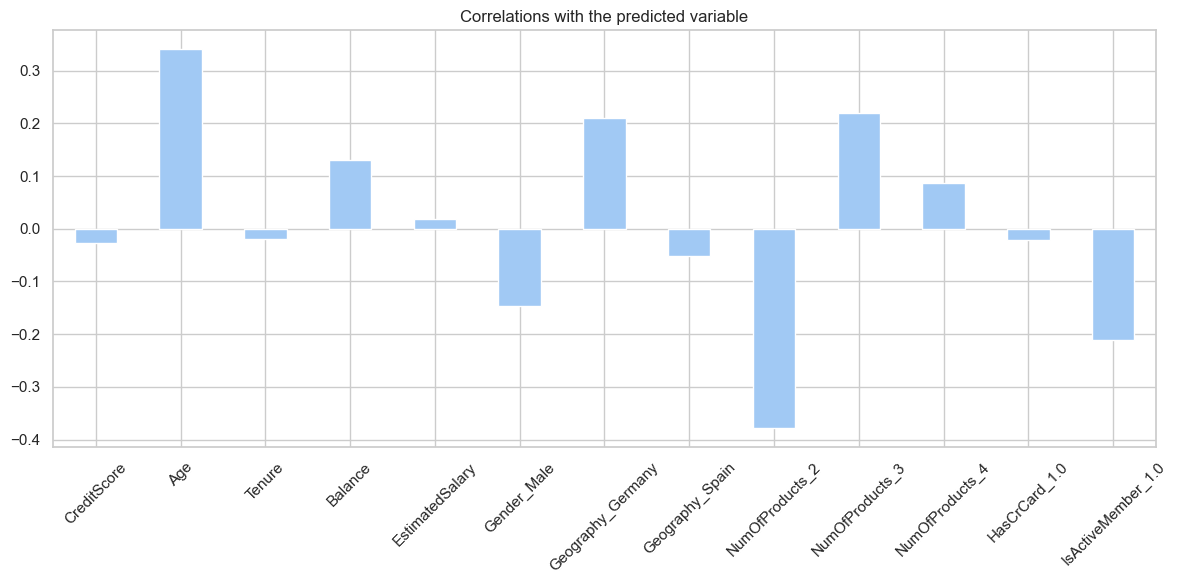

In [19]:
plt.figure(figsize=(12,6))
X.apply(lambda x: x.corr(y)).plot(kind='bar')
plt.title('Correlations with the predicted variable')
plt.xticks(rotation=45)
plt.tight_layout()

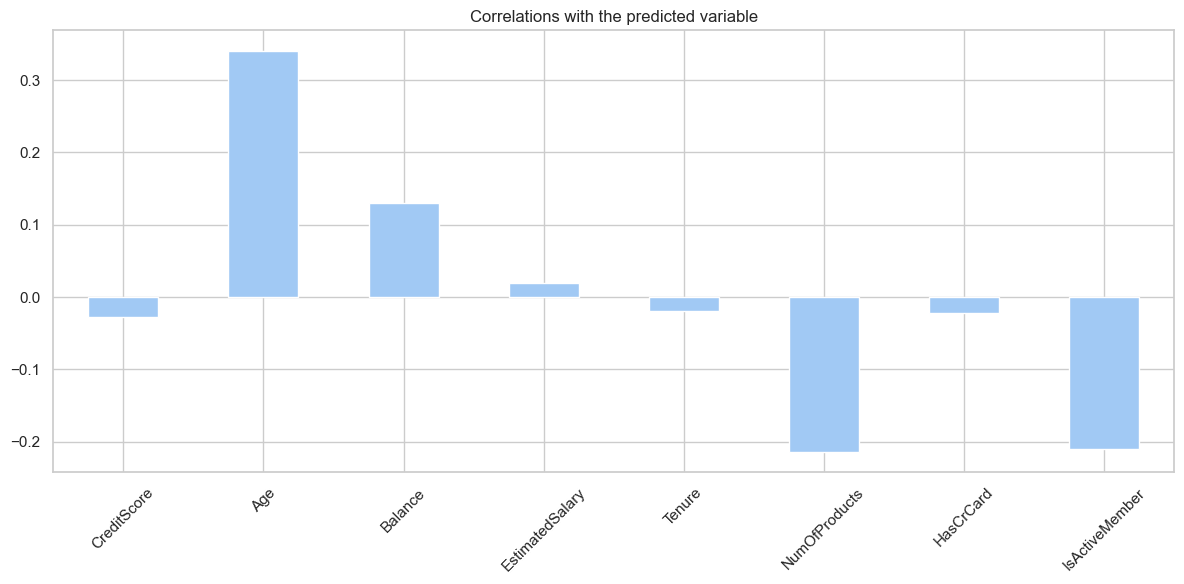

In [33]:
df4 = df4.drop(columns=['Exited'])
plt.figure(figsize=(12,6))
df4.apply(lambda x: x.corr(y)).plot(kind='bar')
plt.title('Correlations with the predicted variable')
plt.xticks(rotation=45)
plt.tight_layout()

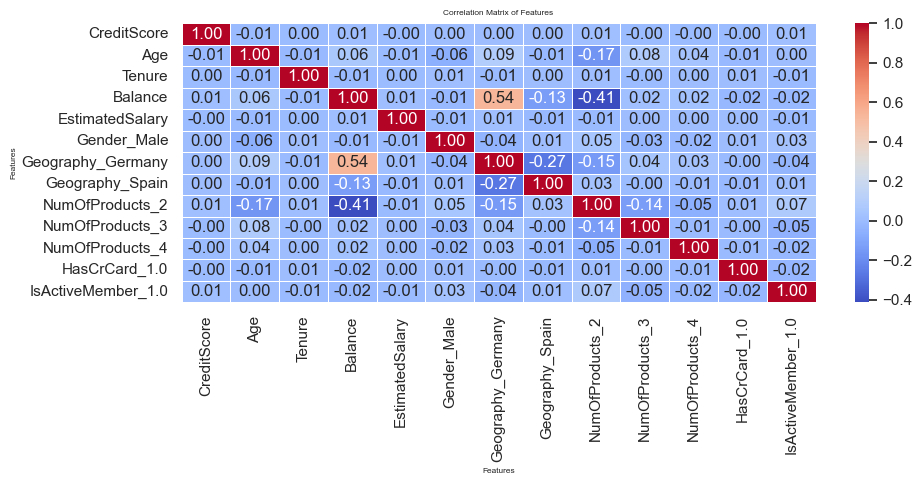

In [14]:
plt.figure(figsize=(10, 5))

# Plot heatmap with Seaborn
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Customize title and labels
plt.title('Correlation Matrix of Features', fontsize=6)
plt.xlabel('Features', fontsize=6)
plt.ylabel('Features', fontsize=6)
plt.tight_layout()
plt.show()

In [132]:
from sklearn.preprocessing import StandardScaler

y = df['Exited']
X = df.drop(['id', 'CustomerId','Surname','Exited'], axis=1)

bins = [18, 30, 40, 50, 60, 70, 80, 90, float('inf')]
labels = ['18_30', '30_40', '40_50', '50_60', '60_70', '70_80', '80_90', '90+']

X['Age_cat'] = pd.cut(X['Age'], bins=bins, labels=labels, right=False)

X = pd.get_dummies(data=X, columns=['Gender', 
                                    'Geography',
                                    'NumOfProducts',
                                    'HasCrCard', 
                                    'IsActiveMember',
                                    'Age_cat',
                                    'Tenure'], drop_first='True')


X.drop(columns=['Age'], inplace=True)

sc = StandardScaler()
X[['CreditScore', 'Balance', 'EstimatedSalary']] = sc.fit_transform(X[['CreditScore', 'Balance', 'EstimatedSalary']])

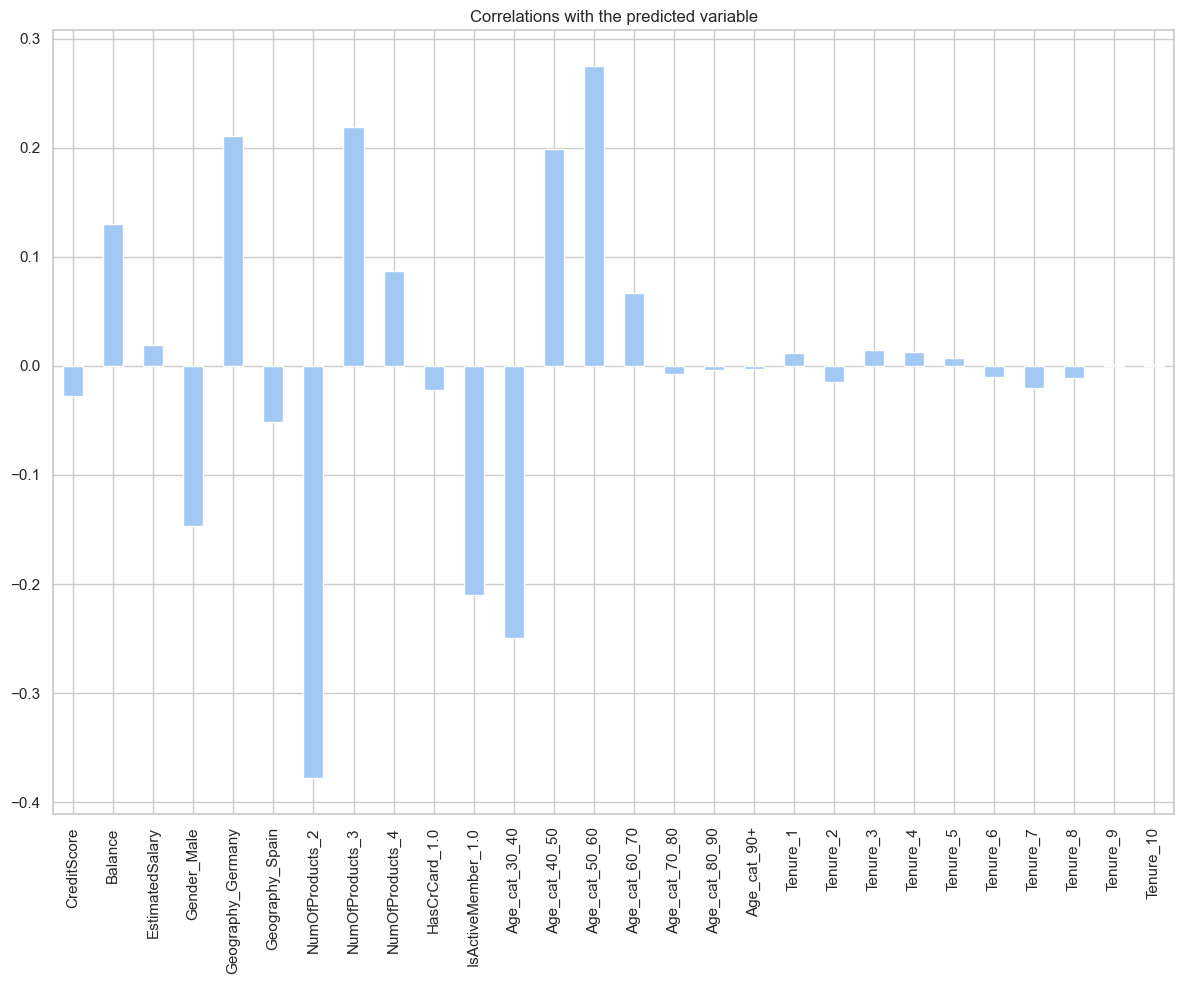

In [133]:
plt.figure(figsize=(12,10))
X.apply(lambda x: x.corr(y)).plot(kind='bar')
plt.title('Correlations with the predicted variable')
plt.tight_layout()

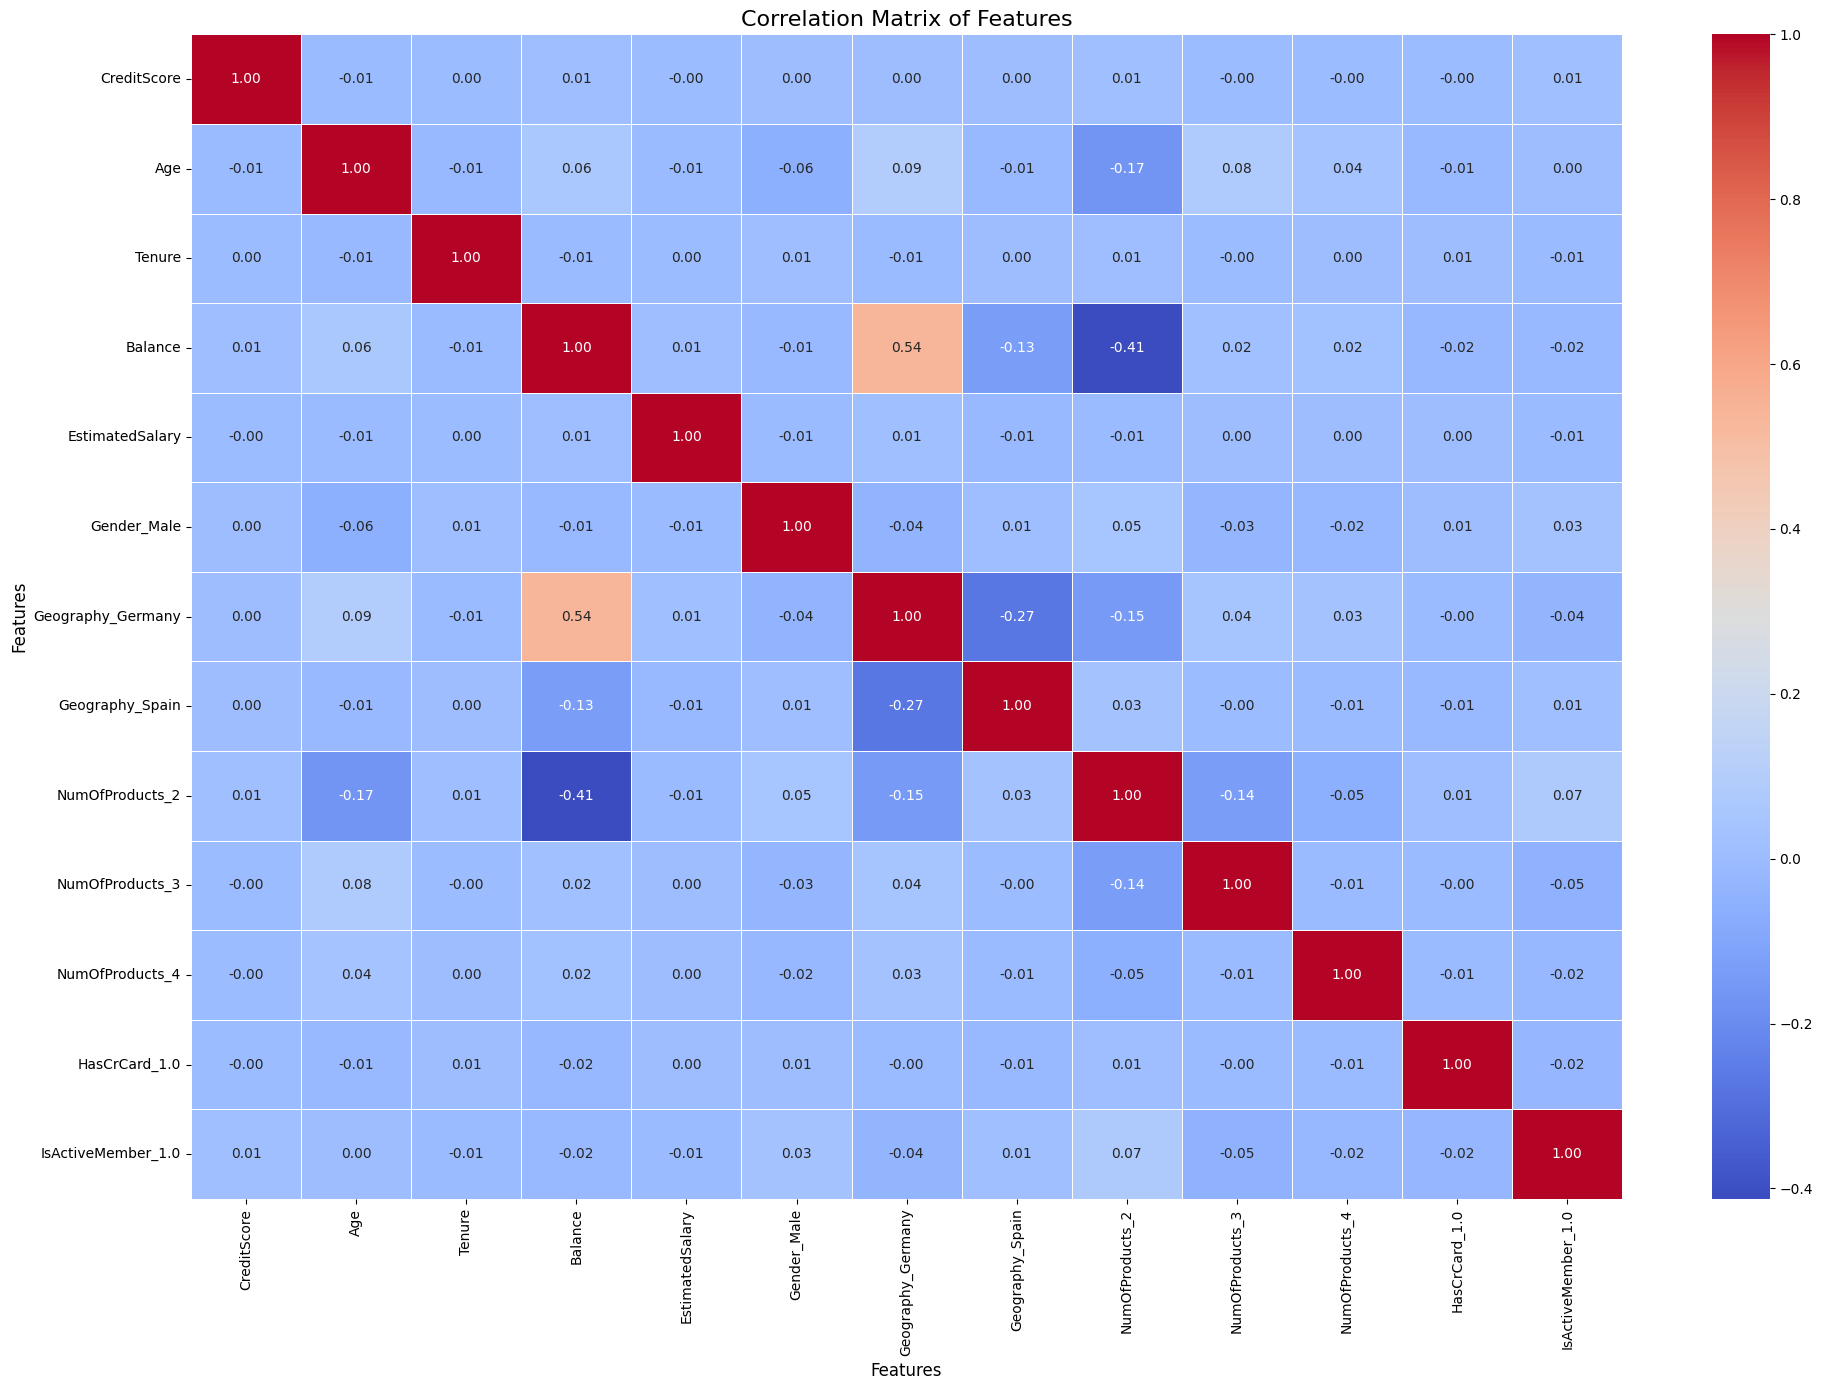

In [22]:
plt.figure(figsize=(20, 14))

# Plot heatmap with Seaborn
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Customize title and labels
plt.title('Correlation Matrix of Features', fontsize=16)
plt.xlabel('Features', fontsize=12)

plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

1. No significant correlations between input variables (No linear Relationship), Linear models ain't a good fit for the data (eg: Logistic Regression)

## Model Building

#### Sampling the Predictor Class

In [474]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)


rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [471]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

#### Splitting the data

In [213]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, random_state=42)

X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, random_state=42)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, random_state=42)

In [188]:
X.head()

CreditScore       Age    Tenure   Balance  EstimatedSalary  Gender_Male  \
0     0.144135 -0.578074 -0.719973 -0.883163         1.369486            1   
1    -0.367706 -0.578074 -1.432694 -0.883163        -1.254085            1   
2     0.268974  0.211354  1.774548 -0.883163         1.437422            1   
3    -0.941966 -0.465299 -1.076334  1.486918        -0.557018            1   
4     0.743362 -0.578074 -0.007253 -0.883163        -1.938770            1   

   Geography_Germany  Geography_Spain  NumOfProducts_2  NumOfProducts_3  \
0                  0                0                1                0   
1                  0                0                1                0   
2                  0                0                1                0   
3                  0                0                0                0   
4                  0                1                1                0   

   NumOfProducts_4  HasCrCard_1.0  IsActiveMember_1.0  
0                0              1                   0  
1                0              1                   1  
2                0              1                   0  
3                0              1                   1  
4                0              1                   1

### Logistic Regression

In [554]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500, verbose=1, n_jobs=-1)


In [555]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [585]:
lr.fit(X_train_smote, y_train_smote)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


LogisticRegression(max_iter=500, verbose=1)

In [586]:
y_pred = lr.predict(X_test)

AUROC SCORE = 0.871


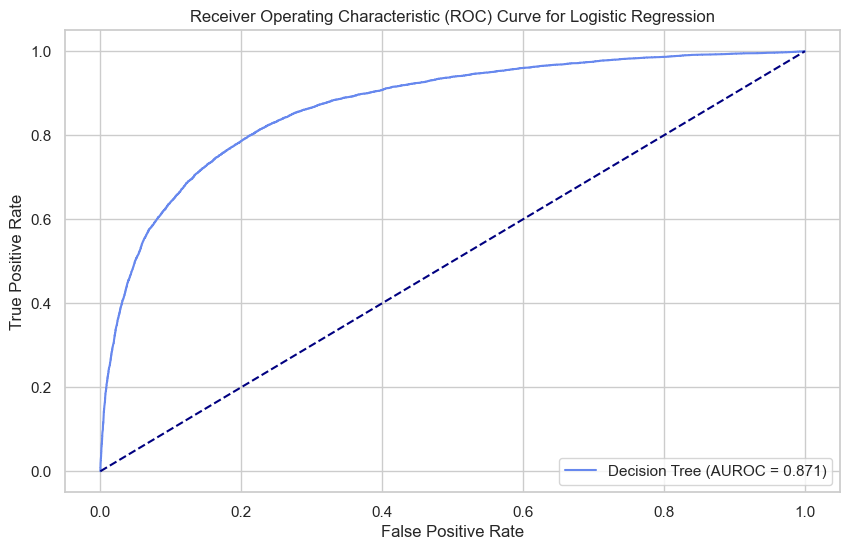

In [588]:
dt_proba = lr.predict_proba(X_test)[:,1]
dt_auc_score = roc_auc_score(y_test, dt_proba)
print("AUROC SCORE = %.3f" %(dt_auc_score))
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_proba)
#Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUROC = %.3f)' % dt_auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [558]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86     32638
           1       0.50      0.79      0.62      8621

    accuracy                           0.79     41259
   macro avg       0.72      0.79      0.74     41259
weighted avg       0.85      0.79      0.81     41259



In [559]:
print(confusion_matrix(y_test, y_pred))

[[25855  6783]
 [ 1772  6849]]


In [560]:
y_test.value_counts()

0    32638
1     8621
Name: Exited, dtype: int64

In [185]:
lr.coef_[0]

array([-0.05765544, -0.3291519 ,  0.04112236, -0.67112199,  1.25740057,
        0.01031816, -2.11721406,  2.50507821,  2.22364862, -0.14777568,
       -1.20732368,  0.24846957,  1.57973314,  2.68975526,  2.11465794,
        1.19095964,  0.31755128, -0.09688507, -0.24057995, -0.29359063,
       -0.18091994, -0.16962187, -0.21153441, -0.34288711, -0.38034002,
       -0.33324476, -0.28443176, -0.28600028])

In [144]:
feature_importance_df

Feature  Importance
9      NumOfProducts_3    2.142904
10     NumOfProducts_4    1.457761
6    Geography_Germany    1.242369
1                  Age    0.840799
4      EstimatedSalary    0.046442
2               Tenure   -0.047832
0          CreditScore   -0.067104
7      Geography_Spain   -0.091463
11       HasCrCard_1.0   -0.216875
3              Balance   -0.285095
5          Gender_Male   -0.716761
12  IsActiveMember_1.0   -1.252312
8      NumOfProducts_2   -2.264691

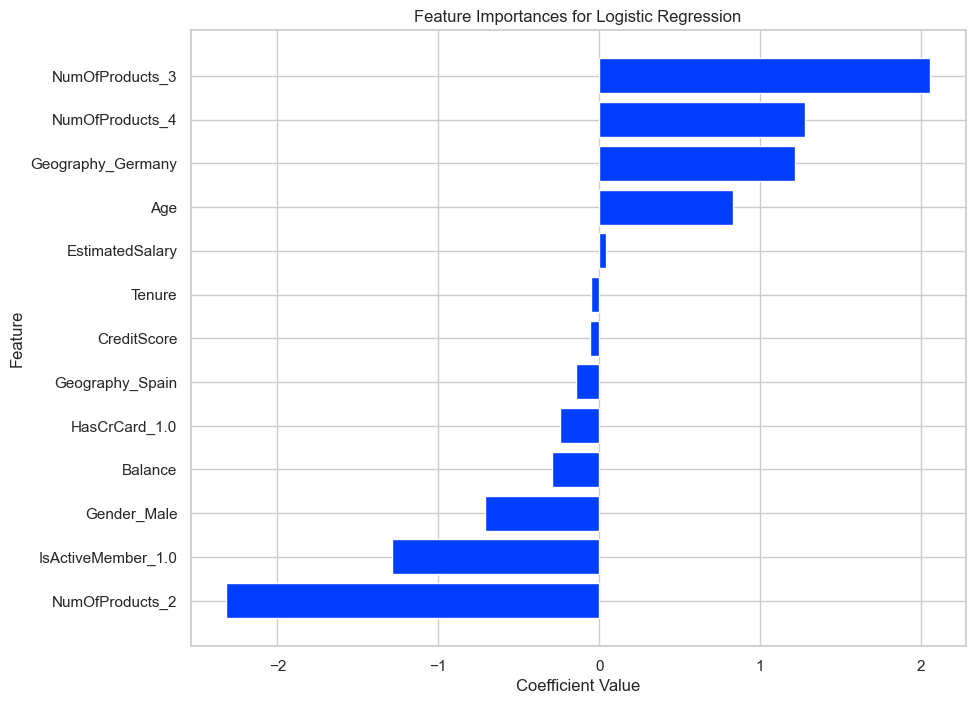

In [533]:
feature_names = X_train.columns

coefficients = lr.coef_[0]


# Create a dataframe for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort the dataframe by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='b')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importances for Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

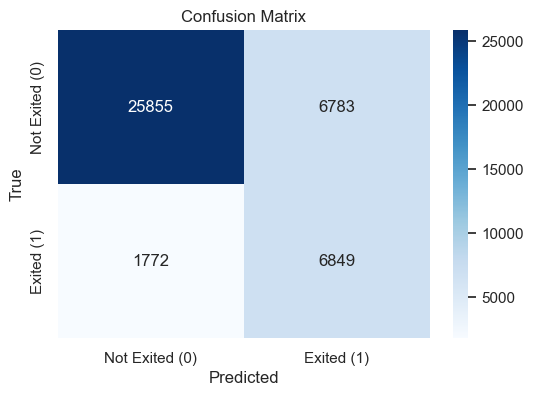

In [535]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Exited (0)', 'Exited (1)'], yticklabels=['Not Exited (0)', 'Exited (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [427]:
print(confusion_matrix(y_test, y_pred))

[[24720  1368]
 [ 3407  3512]]


In [361]:
print(confusion_matrix(y_test, y_pred))

[[24714  1309]
 [ 3404  3580]]


### PCA

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components=6)

In [165]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

X_pca = pca.fit_transform(X)

# Split the PCA transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Fit logistic regression
model = LogisticRegression(max_iter=300)
model.fit(X_train_pca, y_train_pca)

# Make predictions
# y_pred = model.predict(X_test)

LogisticRegression(max_iter=300)

In [166]:
y_pred_pca = model.predict(X_test_pca)


In [172]:
pca.explained_variance_ratio_

array([0.19538121, 0.17579707, 0.17495439, 0.0636746 , 0.04476537,
       0.04208902])

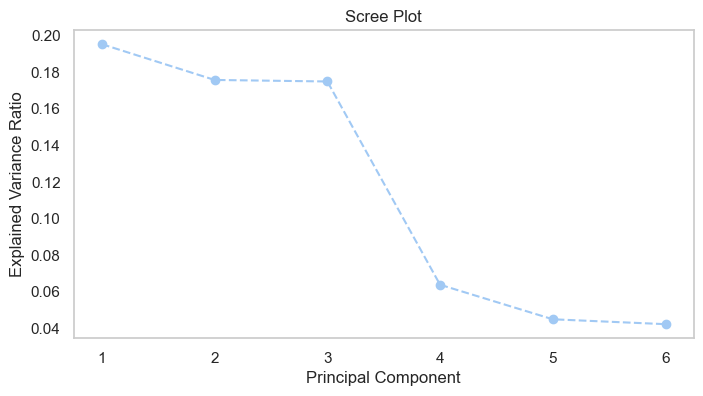

In [177]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

In [169]:
print(classification_report(y_test_pca, y_pred_pca))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     26023
           1       0.62      0.29      0.40      6984

    accuracy                           0.81     33007
   macro avg       0.73      0.62      0.64     33007
weighted avg       0.79      0.81      0.79     33007



#### Hyper parameter tuning

In [260]:
from sklearn.model_selection import GridSearchCV


In [261]:
X_train.head()

CreditScore   Age  Tenure   Balance  EstimatedSalary  Gender_Male  \
116180     1.167815  47.0       6  1.049040        -1.155261            0   
152256     0.081715  40.0       9 -0.883163        -1.738014            1   
124302     0.655975  42.0       5 -0.883163         0.770875            0   
79682      0.331393  32.0       6 -0.883163        -0.649313            1   
127888     1.492397  36.0       6 -0.883163        -0.967654            1   

        Geography_Germany  Geography_Spain  NumOfProducts_2  NumOfProducts_3  \
116180                  0                0                1                0   
152256                  0                0                1                0   
124302                  0                1                1                0   
79682                   0                0                1                0   
127888                  0                1                1                0   

        NumOfProducts_4  HasCrCard_1.0  IsActiveMember_1.0  
116180                0              1                   1  
152256                0              0                   1  
124302                0              1                   1  
79682                 0              1                   1  
127888                0              0                   0

In [40]:
current_time_1 = datetime.datetime.now()

param_grid = {'C' : [0.01, 0.1, 10, 100],
             'solver' : ['liblinear', 'lbfgs', 'saga']}

grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=500),
                           param_grid=param_grid,
                           scoring='roc_auc',  # Optimize for recall
                           cv=12,
                           n_jobs=-1, #Use all cores
                           verbose=1)

grid_search.fit(X_train_smote, y_train_smote)
                           
print("Best parameters found:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

current_time_2 = datetime.datetime.now()

print(f"time elapsed {current_time_2-current_time_1}" )


Fitting 12 folds for each of 12 candidates, totalling 144 fits
Best parameters found: {'C': 10, 'solver': 'liblinear'}
Best recall score: 0.8770179473034552
time elapsed 0:00:52.679684


#### Best model for Logistic Regression

In [42]:
best_model_lr = grid_search.best_estimator_
y_pred_best_lr = best_model_lr.predict(X_test_smote)
print("Confusion Matrix:\n", confusion_matrix(y_test_smote, y_pred_best_lr))
print("\nClassification Report:\n", classification_report(y_test_smote, y_pred_best_lr))
print("\nAccuracy Score:", accuracy_score(y_test_smote, y_pred_best_lr))
print("Recall score: \n", recall_score(y_test_smote, y_pred_best_lr))

Confusion Matrix:
 [[25649  6748]
 [ 6407 26253]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80     32397
           1       0.80      0.80      0.80     32660

    accuracy                           0.80     65057
   macro avg       0.80      0.80      0.80     65057
weighted avg       0.80      0.80      0.80     65057


Accuracy Score: 0.7977927048588161
Recall score: 
 0.8038273116962645


#### Oversampling and Undersampling

In [201]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [381]:
# OverSampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

model = LogisticRegression(max_iter=300)
model.fit(X_train_ros, y_train_ros)


y_pred_ros = model.predict(X_test)

print(classification_report(y_test, y_pred_ros))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86     26023
           1       0.51      0.79      0.62      6984

    accuracy                           0.79     33007
   macro avg       0.72      0.79      0.74     33007
weighted avg       0.84      0.79      0.81     33007



In [382]:
print(confusion_matrix(y_test, y_pred_ros))

[[20650  5373]
 [ 1468  5516]]


In [379]:
# UnderSampling
ros = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = ros.fit_resample(X_train, y_train)

model = LogisticRegression(max_iter=300)
model.fit(X_train_rus, y_train_rus)


y_pred_rus = model.predict(X_test)

print(classification_report(y_test, y_pred_rus))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86     26023
           1       0.51      0.79      0.62      6984

    accuracy                           0.79     33007
   macro avg       0.72      0.79      0.74     33007
weighted avg       0.84      0.79      0.81     33007



In [380]:
print(confusion_matrix(y_test, y_pred_rus))

[[20639  5384]
 [ 1464  5520]]


In [302]:
print(accuracy_score(y_test, y_pred_rus))

0.7966491956251704


In [38]:
#Smote
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = LogisticRegression(max_iter=300)
model.fit(X_train_smote, y_train_smote)


y_pred_smote = model.predict(X_test)

print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86     26023
           1       0.51      0.79      0.62      6984

    accuracy                           0.79     33007
   macro avg       0.72      0.79      0.74     33007
weighted avg       0.84      0.79      0.81     33007



In [429]:
print(accuracy_score(y_test, y_pred_smote))

0.793134789590087


In [430]:
print(confusion_matrix(y_test, y_pred_smote))

[[20742  5346]
 [ 1482  5437]]


In [370]:
print(confusion_matrix(y_test, y_pred_smote))

[[20641  5382]
 [ 1463  5521]]


### Decision Tree

In [562]:
dt = DecisionTreeClassifier(random_state=42)

In [563]:
dt.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

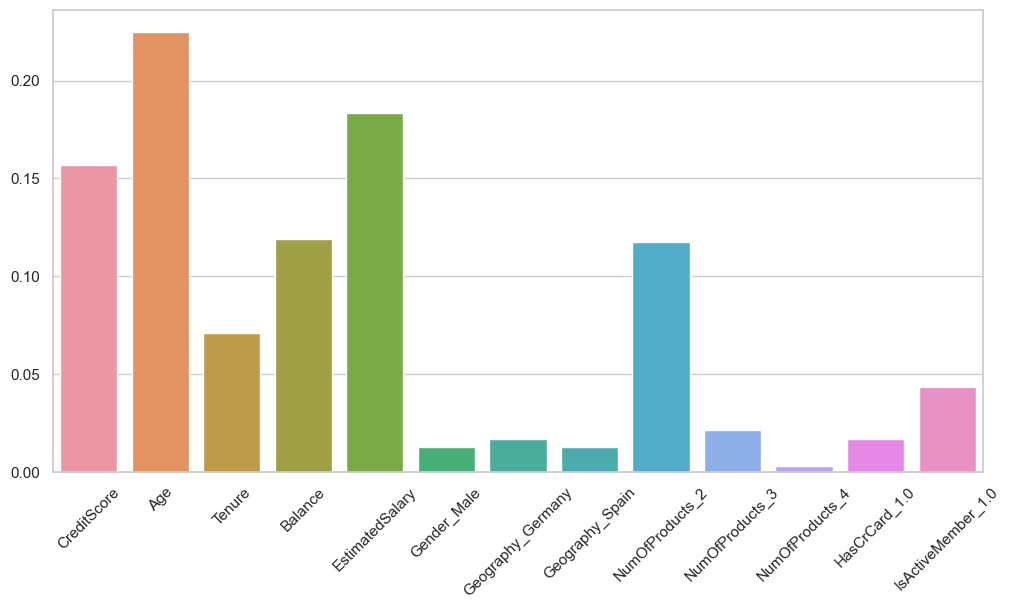

In [303]:
plt.figure(figsize=(12,6))
sns.barplot(x=X_train.columns, y=dt.feature_importances_)
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x500 with 0 Axes>

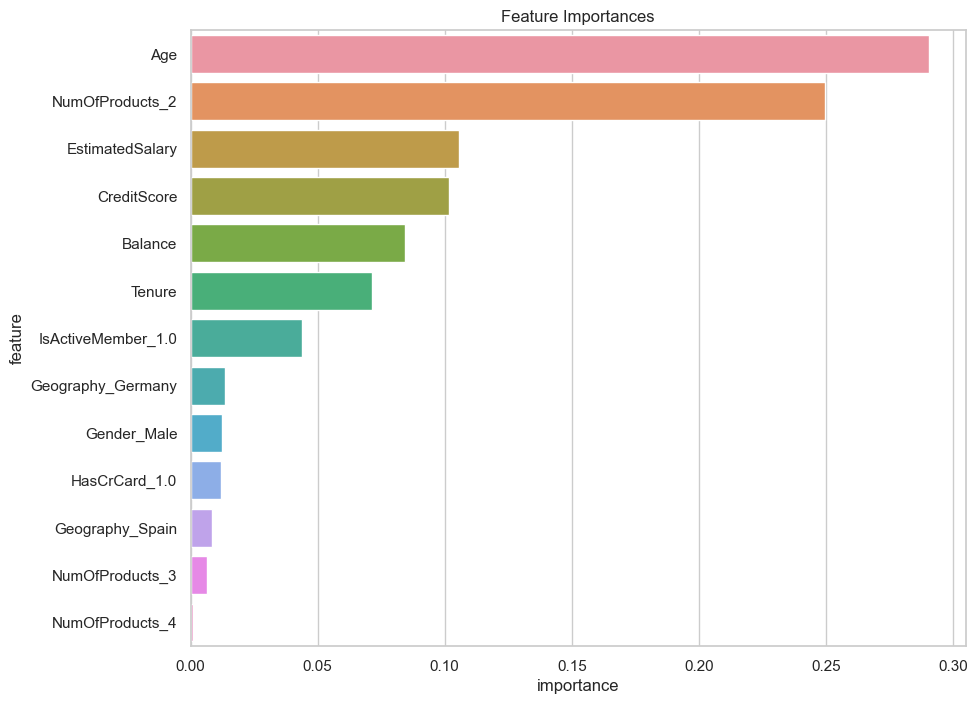

In [540]:
# Assuming lgb_clf is your trained LGBMClassifier model
plt.figure(figsize=(10,5))
importances = dt.feature_importances_

# Create a DataFrame for better plotting
feature_names = X_train_smote.columns  # Assuming your feature names are stored here
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the feature importances
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

In [564]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))
print("Accuracy: ", accuracy_score(y_test, y_pred_dt))
print("Confusion_matrix:\n", confusion_matrix(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86     32638
           1       0.50      0.56      0.52      8621

    accuracy                           0.79     41259
   macro avg       0.69      0.70      0.69     41259
weighted avg       0.80      0.79      0.79     41259

Accuracy:  0.7890884413097748
Confusion_matrix:
 [[27754  4884]
 [ 3818  4803]]


In [539]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))
print("Accuracy: ", accuracy_score(y_test, y_pred_dt))
print("Confusion_matrix:\n", confusion_matrix(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86     32638
           1       0.50      0.56      0.52      8621

    accuracy                           0.79     41259
   macro avg       0.69      0.70      0.69     41259
weighted avg       0.80      0.79      0.79     41259

Accuracy:  0.7890884413097748
Confusion_matrix:
 [[27754  4884]
 [ 3818  4803]]


In [80]:
# Export the decision tree as a textual representation
tree_text = export_text(dt, feature_names=list(X_train.columns))

# Print the entire tree
print(tree_text)

# Optionally, print only the first few nodes
# Here, we are printing the first 2-3 nodes by splitting the tree_text
# and joining the first few lines
tree_lines = tree_text.split('\n')
first_few_nodes = '\n'.join(tree_lines[:6])  # Adjust the number of lines as needed

print("\nFirst 2-3 nodes of the decision tree:")
print(first_few_nodes)

|--- NumOfProducts_2 <= 0.50
|   |--- Age <= 0.10
|   |   |--- IsActiveMember_1.0 <= 0.50
|   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |--- Geography_Germany <= 0.50
|   |   |   |   |   |--- Balance <= 0.05
|   |   |   |   |   |   |--- Age <= -0.47
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  -0.47
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Balance >  0.05
|   |   |   |   |   |   |--- NumOfProducts_3 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- NumOfProducts_3 >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Geography_Germany >  0.50
|   |   |   |   |   |--- Age <= -0.46
|   |   |   |   |   |   |--- Age <= -0.47
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  -0.47
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Age >  -0.46
|   |   |   |   |   |   |--- Age <= -0.35
|   |   |   |   |   |   |   |--- class: 1
|   |   |  

In [85]:
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['Not Exited', 'Exited'],
                           filled=True, rounded=True,
                           special_characters=True,
                           max_depth=3)  # Limit the depth to the first 3-4 nodes

# Visualize the tree using graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png")  # Save the tree as a PNG file
graph.view()

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

#### OverSampling and Undersampling

In [384]:
# Random Undersampling
dt.fit(X_train_rus, y_train_rus)
y_pred_dt_rus = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt_rus))
print("Accuracy: ", accuracy_score(y_test, y_pred_dt_rus))
print("Confusion_matrix:\n", confusion_matrix(y_test, y_pred_dt_rus))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80     26023
           1       0.41      0.72      0.52      6984

    accuracy                           0.72     33007
   macro avg       0.66      0.72      0.66     33007
weighted avg       0.80      0.72      0.74     33007

Accuracy:  0.7208167964371194
Confusion_matrix:
 [[18754  7269]
 [ 1946  5038]]


In [383]:
# Random Oversampling
dt.fit(X_train_ros, y_train_ros)
y_pred_dt_ros = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt_ros))
print("Accuracy: ", accuracy_score(y_test, y_pred_dt_ros))
print("Confusion_matrix:\n", confusion_matrix(y_test, y_pred_dt_ros))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     26023
           1       0.53      0.52      0.52      6984

    accuracy                           0.80     33007
   macro avg       0.70      0.70      0.70     33007
weighted avg       0.80      0.80      0.80     33007

Accuracy:  0.7997394492077438
Confusion_matrix:
 [[22754  3269]
 [ 3341  3643]]


In [40]:
# SMOTE
dt.fit(X_train_smote, y_train_smote)
y_pred_dt_smote = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt_smote))
print("Accuracy: ", accuracy_score(y_test, y_pred_dt_smote))
print("Confusion_matrix:\n", confusion_matrix(y_test, y_pred_dt_smote))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     26023
           1       0.51      0.55      0.53      6984

    accuracy                           0.79     33007
   macro avg       0.69      0.70      0.70     33007
weighted avg       0.80      0.79      0.80     33007

Accuracy:  0.7921350016663132
Confusion_matrix:
 [[22289  3734]
 [ 3127  3857]]


#### Hyperparameter tuning

#### GridSearchCV

In [51]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,6],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='roc_auc', 
                           cv=5,
                           n_jobs=-1,  
                           verbose=3,
                           return_train_score=True)

grid_search_dt.fit(X_train_smote, y_train_smote)

print(f"Best parameters found: {grid_search_dt.best_params_}")

best_model_dt = grid_search_dt.best_estimator_
y_pred_dt_hyper = best_model_dt.predict(X_test_smote)

print("Best AUROC score:", grid_search_dt.best_score_)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test_smote, y_pred_dt_hyper))
print("\nClassification Report:\n", classification_report(y_test_smote, y_pred_dt_hyper))
print("\nAccuracy Score:", accuracy_score(y_test_smote, y_pred_dt_hyper))

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best AUROC score: 0.9142464139224324
Confusion Matrix:
 [[27318  5079]
 [ 5572 27088]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84     32397
           1       0.84      0.83      0.84     32660

    accuracy                           0.84     65057
   macro avg       0.84      0.84      0.84     65057
weighted avg       0.84      0.84      0.84     65057


Accuracy Score: 0.8362820296048081


In [52]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test_smote, y_pred_dt_hyper))
print("\nClassification Report:\n", classification_report(y_test_smote, y_pred_dt_hyper))
print("\nAccuracy Score:", accuracy_score(y_test_smote, y_pred_dt_hyper))

Confusion Matrix:
 [[27318  5079]
 [ 5572 27088]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84     32397
           1       0.84      0.83      0.84     32660

    accuracy                           0.84     65057
   macro avg       0.84      0.84      0.84     65057
weighted avg       0.84      0.84      0.84     65057


Accuracy Score: 0.8362820296048081


In [ ]:
# dt = DecisionTreeClassifier(criterion= 'entropy', 
#                        max_depth= 10, 
#                        max_features= None,
#                        min_samples_leaf= 1, 
#                        min_samples_split= 2,
#                       random_state=42

In [56]:
dt = DecisionTreeClassifier(criterion= 'gini', 
                       max_depth= 7, 
                       max_features= None,
                       min_samples_leaf= 6, 
                       min_samples_split= 2,
                      random_state=42)

dt.fit(X_train_smote, y_train_smote)
y_dt_hyper_smote = dt.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_dt_hyper_smote))
print("\nClassification Report:\n", classification_report(y_test, y_dt_hyper_smote))
print("\nAccuracy Score:", accuracy_score(y_test, y_dt_hyper_smote))
print("\n Recall Score:", recall_score(y_test, y_dt_hyper_smote))

Confusion Matrix:
 [[21833  4190]
 [ 1871  5113]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88     26023
           1       0.55      0.73      0.63      6984

    accuracy                           0.82     33007
   macro avg       0.74      0.79      0.75     33007
weighted avg       0.84      0.82      0.83     33007


Accuracy Score: 0.8163722846668888

 Recall Score: 0.7321019473081328


#### RandomizedSearchCV

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters found: {'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': None, 'max_depth': 7, 'criterion': 'gini'}
Best AUROC score: 0.8807552969913489
Confusion Matrix:
 [[24611  1412]
 [ 3177  3807]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.91     26023
           1       0.73      0.55      0.62      6984

    accuracy                           0.86     33007
   macro avg       0.81      0.75      0.77     33007
weighted avg       0.85      0.86      0.85     33007


Accuracy Score: 0.860968885387948

AUROC SCORE on Test Set = 0.881


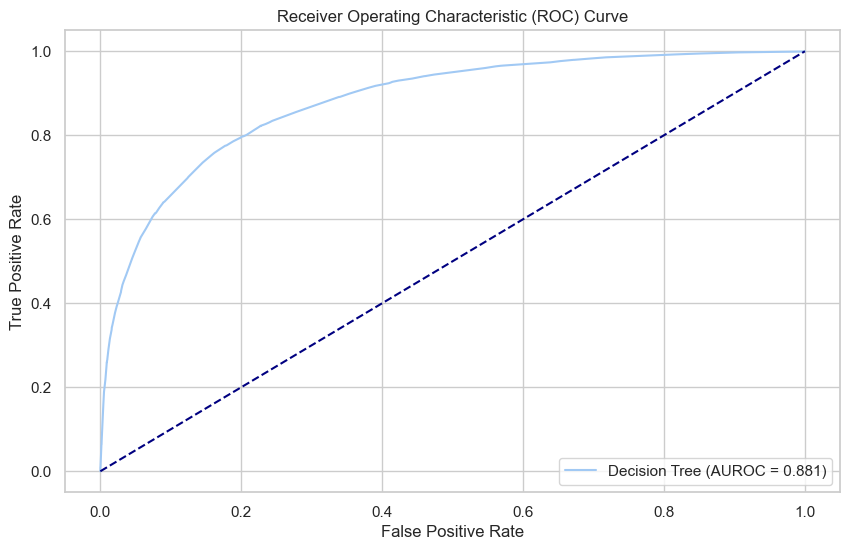

In [463]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']
}

random_search_dt = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                      param_distributions=param_grid,
                                      scoring='roc_auc', 
                                      cv=5,
                                      n_jobs=-1,  
                                      verbose=3,
                                      return_train_score=True,
                                      n_iter=200,  # Number of parameter settings sampled
                                      random_state=42)  # For reproducibility

random_search_dt.fit(X_train, y_train)

print(f"Best parameters found: {random_search_dt.best_params_}")
print("Best AUROC score:", random_search_dt.best_score_)

best_model_dt = random_search_dt.best_estimator_
y_pred_dt_hyper = best_model_dt.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_hyper))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_hyper))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_dt_hyper))

# Compute AUROC on the test set
dt_proba = best_model_dt.predict_proba(X_test)[:, 1]
dt_auc_score = roc_auc_score(y_test, dt_proba)
print("\nAUROC SCORE on Test Set = %.3f" % dt_auc_score)

# Plot the ROC curve
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_proba)
plt.figure(figsize=(10, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUROC = %.3f)' % dt_auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [457]:
recall_score(y_test, y_pred_dt_hyper)

0.5426689576174112

### ROC_AUC CURVE

In [439]:
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, make_scorer

AUROC SCORE = 0.881


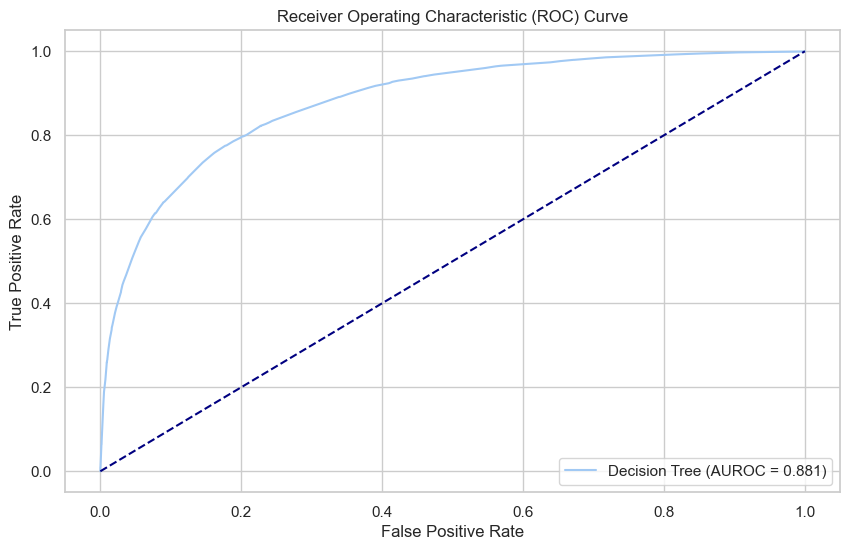

In [462]:
dt_proba = random_search_dt.predict_proba(X_test)[:,1]
dt_auc_score = roc_auc_score(y_test, dt_proba)
print("AUROC SCORE = %.3f" %(dt_auc_score))
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_proba)
#Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUROC = %.3f)' % dt_auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### RandomForestClassifier

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [487]:
rf = RandomForestClassifier(n_estimators=500)
#                             min_samples_split=2,
#                             min_samples_leaf=4,
#                             max_features='log2',
#                             max_depth=20,
#                             bootstrap=False,
#                             random_state=42)

rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))
print("Accuracy:\n ", accuracy_score(y_test, y_pred_rf))
print("Confusion_matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Recall score: \n", recall_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     32638
           1       0.62      0.65      0.64      8621

    accuracy                           0.84     41259
   macro avg       0.76      0.77      0.77     41259
weighted avg       0.85      0.84      0.85     41259

Accuracy:
  0.8444702973896604
Confusion_matrix:
 [[29216  3422]
 [ 2995  5626]]
Recall score: 
 0.6525925066697599


In [ ]:
param_dist = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf,
                                       param_distributions=param_dist,
                                       n_iter=100,  # Number of parameter settings sampled
                                       scoring='recall',  # Scoring metric
                                       cv=5,  # Number of cross-validation folds
                                       n_jobs=-1,  # Use all available cores
                                       verbose=3,  # Verbosity level
                                       random_state=42)  # For reproducibility

# Fit RandomizedSearchCV
random_search_rf.fit(X_train_smote, y_train_smote)

# Output the best parameters and best score
print(f"Best parameters found: {random_search_rf.best_params_}")
print("Best AUROC score during CV: ", random_search_rf.best_score_)

# Get the best model
best_model_rf = random_search_rf.best_estimator_

# Predict on the test set
y_pred_rf_hyper = best_model_rf.predict(X_train)

# # Compute AUROC on the test set
# rf_proba = best_model_rf.predict_proba(X_test)[:, 1]
# rf_auc_score = roc_auc_score(y_test, rf_proba)
# print("best  reall score on Test Set = %.3f" % rf_auc_score)

# # Plot the ROC curve
# rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
# plt.figure(figsize=(10, 6))
# plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUROC = %.3f)' % rf_auc_score)
# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

# # Evaluate the model
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_hyper))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_hyper))
# print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf_hyper))

In [468]:
rf_proba = best_model_rf.predict_proba(X_test)[:, 1]
rf_auc_score = roc_auc_score(y_test, rf_proba)
print("AUROC SCORE on Test Set = %.3f" % rf_auc_score)

AUROC SCORE on Test Set = 0.887


In [470]:
# Evaluate the model
y_pred_rf_hyper = best_model_rf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_hyper))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_hyper))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf_hyper))
print("Recall score: \n", recall_score(y_test, y_pred_rf_hyper))

Confusion Matrix:
 [[25007  1016]
 [ 3537  3447]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     26023
           1       0.77      0.49      0.60      6984

    accuracy                           0.86     33007
   macro avg       0.82      0.73      0.76     33007
weighted avg       0.85      0.86      0.85     33007


Accuracy Score: 0.8620595631229739
Recall score: 
 0.49355670103092786


In [23]:
# List of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('SVM', SVC(probability=True)),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB())
]

# Evaluate each model
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    results.append(auc)
    names.append(name)
    print(f'{name}: AUROC = {auc:.3f}')

# Summary of results
best_model_idx = np.argmax(results)
print(f'Best Model: {names[best_model_idx]} with AUROC = {results[best_model_idx]:.3f}')

Logistic Regression: AUROC = 0.870
Decision Tree: AUROC = 0.701
Random Forest: AUROC = 0.873
Gradient Boosting: AUROC = 0.889
SVM: AUROC = 0.817
KNN: AUROC = 0.821
Naive Bayes: AUROC = 0.848
Best Model: Gradient Boosting with AUROC = 0.889


### Gradient Boost

In [581]:
gb = GradientBoostingClassifier(random_state=42)
#                                max_depth=5,
#                                min_samples_split=5,
#                                min_samples_leaf=2)
gb.fit(X_train_smote, y_train_smote)
y_pred_gb = gb.predict(X_test)
print(classification_report(y_test, y_pred_gb))
print("Accuracy:\n ", accuracy_score(y_test, y_pred_gb))
print("Confusion_matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Recall score: \n", recall_score(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89     32638
           1       0.57      0.75      0.65      8621

    accuracy                           0.83     41259
   macro avg       0.75      0.80      0.77     41259
weighted avg       0.85      0.83      0.84     41259

Accuracy:
  0.8312125839210839
Confusion_matrix:
 [[27851  4787]
 [ 2177  6444]]
Recall score: 
 0.7474770908247304


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150],         # Number of boosting stages to be run
    'learning_rate': [0.05, 0.1],      # Step size shrinking to prevent overfitting
    'max_depth': [3, 4],                  # Maximum depth of the individual trees
    'min_samples_split': [2, 5],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]             # Minimum number of samples required to be at a leaf node
}

# Create a GradientBoostingClassifier instance
gb = GradientBoostingClassifier(random_state=42)

# Create a custom scorer for AUROC
auroc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gb,
                           param_grid=param_grid,
                           scoring=auroc_scorer,
                           cv=3,                                # 5-fold cross-validation
                           verbose=2)                           # Verbosity level

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and the best AUROC score
print("Best parameters found: ", grid_search.best_params_)
print("Best AUROC score: ", grid_search.best_score_)

# Optionally, you can evaluate the best model on the test set
best_gb = grid_search.best_estimator_
y_pred_gb = best_gb.predict(X_test)
print("Test set accuracy: ", accuracy_score(y_test, y_pred_gb))
print("Test set confusion matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Test set recall score: ", recall_score(y_test, y_pred_gb))


In [ ]:
cm = confusion_matrix(y_test, y_pred_gb)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Exited (0)', 'Exited (1)'], yticklabels=['Not Exited (0)', 'Exited (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Hyperparameter tuned Gradient Boost')
plt.show()

In [571]:
cm

array([[27851,  4787],
       [ 2177,  6444]], dtype=int64)

### LightGBM

In [488]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

lgb_clf = lgb.LGBMClassifier(random_state=42)

# param_grid = {
#     'num_leaves': [30, 50, 100],
#     'max_depth': [10, 20, 30],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [50, 100, 200],
#     'min_child_samples': [20, 50, 100],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'reg_alpha': [0, 0.1, 0.5],
#     'reg_lambda': [0, 0.1, 0.5]
# }

# Fit the model to the training data
lgb_clf.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_lgb = lgb_clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_lgb))
print("Accuracy:\n ", accuracy_score(y_test, y_pred_lgb))
# print("Confusion_matrix:\n", confusion_matrix(y_test_smote, y_pred_lgb))
print("Recall score: \n", recall_score(y_test, y_pred_lgb))



[LightGBM] [Info] Number of positive: 97475, number of negative: 97475
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1291
[LightGBM] [Info] Number of data points in the train set: 194950, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     32638
           1       0.69      0.63      0.65      8621

    accuracy                           0.86     41259
   macro avg       0.79      0.78      0.78     41259
weighted avg       0.86      0.86      0.86     41259

Accuracy:
  0.8618967982743159
Recall score: 
 0.6269574295325369


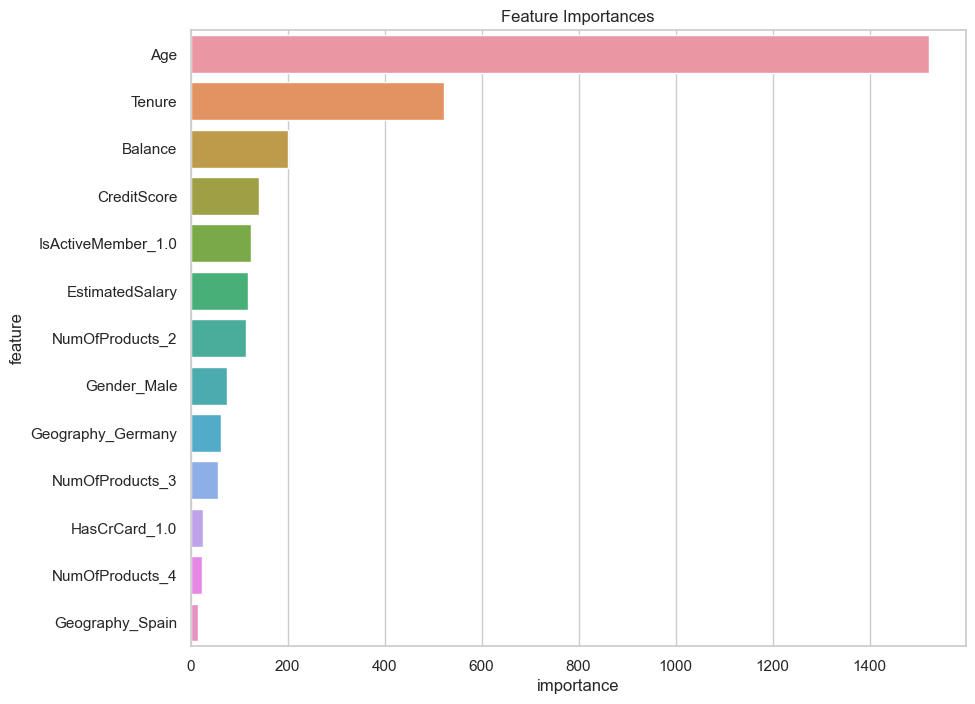

In [489]:
# Assuming lgb_clf is your trained LGBMClassifier model
importances = lgb_clf.feature_importances_

# Create a DataFrame for better plotting
feature_names = X_train_smote.columns  # Assuming your feature names are stored here
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the feature importances
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

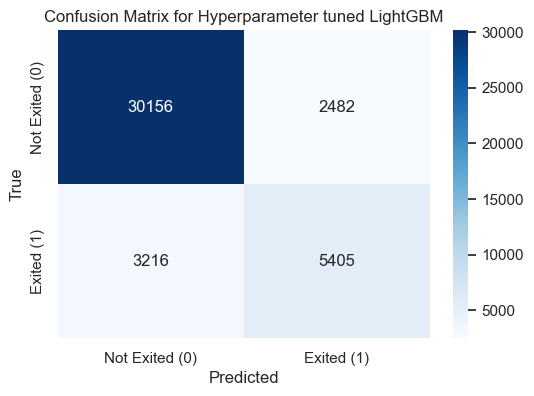

In [491]:
cm = confusion_matrix(y_test, y_pred_lgb)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Exited (0)', 'Exited (1)'], yticklabels=['Not Exited (0)', 'Exited (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Hyperparameter tuned LightGBM')
plt.show()

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],         
    'learning_rate': [0.01, 0.05, 0.1],      
    'max_depth': [3, 4, 5],                 
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4]             
} 

gb = GradientBoostingClassifier(random_state=42)


grid_search = GridSearchCV(estimator=gb,
                           param_grid=param_grid,
                           scoring=recall,
                           cv=5,                                
                           n_jobs=-1,                          
                           verbose=2)                           

grid_search.fit(X_train_smote, y_train_smote)


print("Best parameters found: ", grid_search.best_params_)
print("Best AUROC score: ", grid_search.best_score_)


In [ ]:
lgb_clf = lgb.LGBMClassifier(random_state=42)

param_grid = {
    'num_leaves': [30, 50, 100],
    'max_depth': [10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

grid_search = GridSearchCV(estimator=lgb_clf,
                           param_grid=param_grid,
                           scoring='roc_auc', 
                           cv=5,
                           n_jobs=-1,
                           verbose=0,
                           return_train_score=True)

grid_search.fit(X_train_smote, y_train_smote)

print(f"Best parameters found: {grid_search.best_params_}")
print("Best AUROC score:", grid_search.best_score_)

best_model_lgb = grid_search.best_estimator_

y_pred_best_lgb = best_model_lgb.predict(X_test_smote)

print("Confusion Matrix:\n", confusion_matrix(y_test_smote, y_pred_best_lgb))
print("\nClassification Report:\n", classification_report(y_test_smote, y_pred_best_lgb))
print("\nAccuracy Score:", accuracy_score(y_test_smote, y_pred_best_lgb))

lgb_proba = best_model_lgb.predict_proba(X_test_smote)[:, 1]
lgb_auc_score = roc_auc_score(y_test_smote, lgb_proba)
print("AUROC SCORE = %.3f" % lgb_auc_score)

lgb_fpr, lgb_tpr, _ = roc_curve(y_test_smote, lgb_proba)
plt.figure(figsize=(10, 6))
plt.plot(lgb_fpr, lgb_tpr, label='LightGBM (AUROC = %.3f)' % lgb_auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### CatBoost

In [500]:
# from catboost import CatBoostClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

# Define the CatBoost model with specific parameters
catboost_clf = CatBoostClassifier(random_state=42,
                                  verbose=0)

# Fit the model to the training data
catboost_clf.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_catboost = catboost_clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_catboost))
print("Accuracy:\n", accuracy_score(y_test, y_pred_catboost))
print("Confusion_matrix:\n", confusion_matrix(y_test, y_pred_catboost))
print("Recall score: \n", recall_score(y_test, y_pred_catboost))


              precision    recall  f1-score   support

           0       0.90      0.94      0.92     32638
           1       0.71      0.59      0.65      8621

    accuracy                           0.87     41259
   macro avg       0.81      0.76      0.78     41259
weighted avg       0.86      0.87      0.86     41259

Accuracy:
 0.865338471606195
Confusion_matrix:
 [[30599  2039]
 [ 3517  5104]]
Recall score: 
 0.5920426864632873


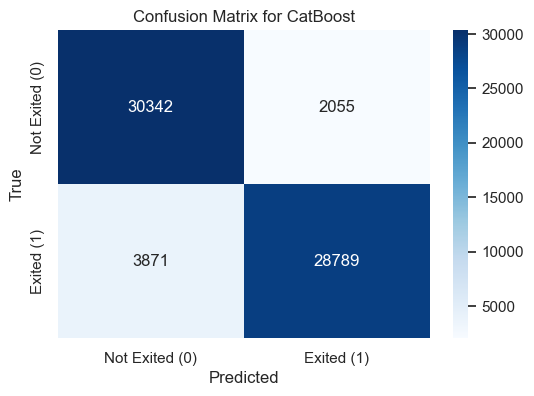

In [246]:
cm = confusion_matrix(y_test_smote, y_pred_catboost)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Exited (0)', 'Exited (1)'], yticklabels=['Not Exited (0)', 'Exited (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CatBoost')
plt.show()

ROC AUC Score:
 0.9678135356140515


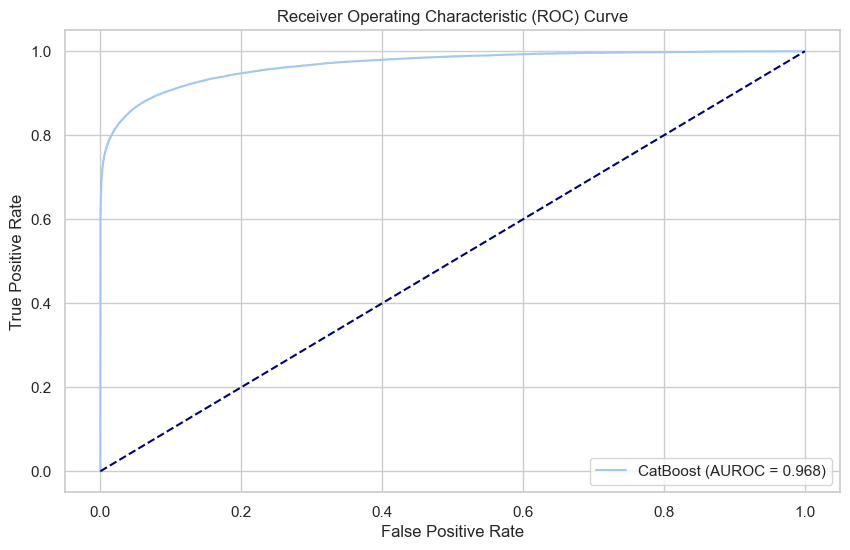

In [222]:
y_pred_catboost = catboost_clf.predict(X_test_smote)
y_pred_proba_catboost = catboost_clf.predict_proba(X_test_smote)[:, 1]

#Calculate the ROC AUC score
catboost_roc_auc = roc_auc_score(y_test_smote, y_pred_proba_catboost)
print("ROC AUC Score:\n", catboost_roc_auc)

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test_smote, y_pred_proba_catboost)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='CatBoost (AUROC = %.3f)' % catboost_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [223]:
print(roc_auc_score(y_test_smote, y_pred_catboost))

0.9090220060747046


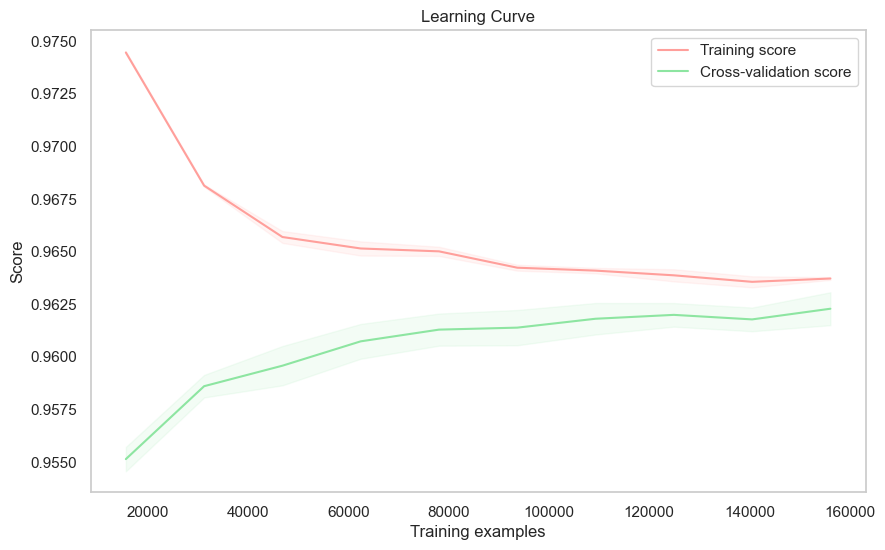

In [357]:
# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=lgb_clf,
    X=X_train_smote,
    y=y_train_smote,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='r')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='g')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color='g', alpha=0.1)

plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

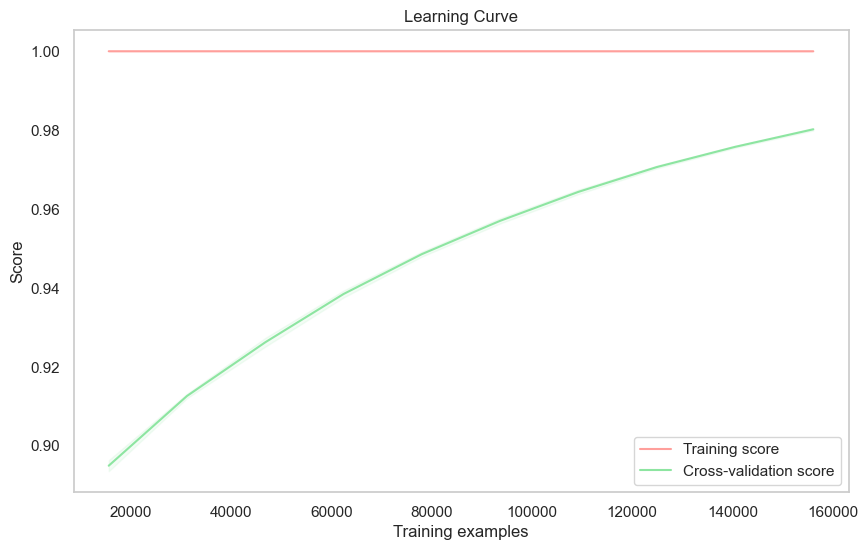

In [340]:
# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=dt,
    X=X_train_ros,
    y=y_train_ros,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='r')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='g')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color='g', alpha=0.1)

plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

In [339]:
model

RandomForestClassifier(n_estimators=300, random_state=42)

#### Hyperparameter tuning

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 300, 'depth': 10, 'border_count': 100}
Best ROC AUC score: 0.9646871760972608
Confusion Matrix:
 [[30133  2264]
 [ 3978 28682]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91     32397
           1       0.93      0.88      0.90     32660

    accuracy                           0.90     65057
   macro avg       0.91      0.90      0.90     65057
weighted avg       0.91      0.90      0.90     65057


Accuracy Score: 0.904053368584472

Recall Score: 0.8781996325780772
ROC AUC Score:
 0.9659284128902865


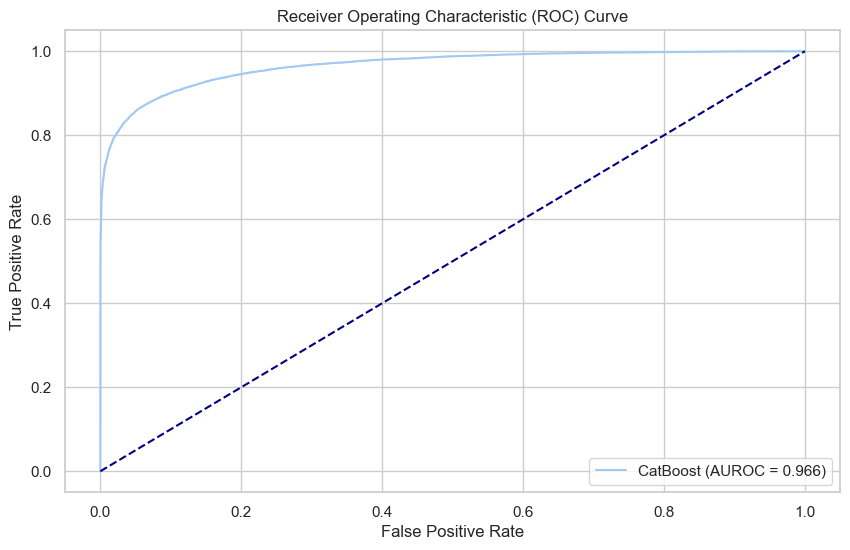

In [75]:
# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 50, 100]
}

# Define the CatBoostClassifier
cat_model = CatBoostClassifier(random_state=42, verbose=0)

# Define the scorers
scorers = {
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True),
    'recall': make_scorer(recall_score)
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_grid,
    scoring=scorers,
    refit='roc_auc',  # Prioritize roc_auc for refitting
    cv=5,
    n_iter=100,  # Number of parameter settings sampled
    random_state=42,
    verbose=3,
    n_jobs=-1,
    return_train_score=True
)

# Fit the model
random_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and scores
print(f"Best parameters found: {random_search.best_params_}")
print("Best ROC AUC score:", random_search.best_score_)

best_model_cat = random_search.best_estimator_
y_pred_cat = best_model_cat.predict(X_test_smote)
y_pred_proba_cat = best_model_cat.predict_proba(X_test_smote)[:, 1]

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test_smote, y_pred_cat))
print("\nClassification Report:\n", classification_report(y_test_smote, y_pred_cat))
print("\nAccuracy Score:", accuracy_score(y_test_smote, y_pred_cat))
print("\nRecall Score:", recall_score(y_test_smote, y_pred_cat))

# Calculate the ROC AUC score
cat_roc_auc = roc_auc_score(y_test_smote, y_pred_proba_cat)
print("ROC AUC Score:\n", cat_roc_auc)

# Calculate the ROC curve
cat_fpr, cat_tpr, _ = roc_curve(y_test_smote, y_pred_proba_cat)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(cat_fpr, cat_tpr, label='CatBoost (AUROC = %.3f)' % cat_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### HistGradientBoosting 

In [572]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

# Define the HistGradientBoosting model with specific parameters
histgb_clf = HistGradientBoostingClassifier(random_state=42)

# Fit the model to the training data
histgb_clf.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_histgb = histgb_clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_histgb))
print("Accuracy:\n", accuracy_score(y_test, y_pred_histgb))
print("Confusion_matrix:\n", confusion_matrix(y_test, y_pred_histgb))
print("Recall score: \n", recall_score(y_test, y_pred_histgb))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     32638
           1       0.65      0.67      0.66      8621

    accuracy                           0.86     41259
   macro avg       0.78      0.79      0.78     41259
weighted avg       0.86      0.86      0.86     41259

Accuracy:
 0.8554497200610776
Confusion_matrix:
 [[29510  3128]
 [ 2836  5785]]
Recall score: 
 0.6710358427096624


In [526]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [1, 10, 20],
    'l2_regularization': [0.0, 0.1, 1.0]
}

# Initialize the HistGradientBoostingClassifier
histgb_clf = HistGradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=histgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Access the best parameters, best score, and best estimator
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")
print(f"Best estimator: {best_estimator}")

# Make predictions on the test data with the best estimator
y_pred_histgb = best_estimator.predict(X_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found: {'l2_regularization': 0.1, 'learning_rate': 0.2, 'max_depth': 4, 'max_iter': 100, 'min_samples_leaf': 10}
Best cross-validation score: 0.8652
Best estimator: HistGradientBoostingClassifier(l2_regularization=0.1, learning_rate=0.2,
                               max_depth=4, min_samples_leaf=10,
                               random_state=42)


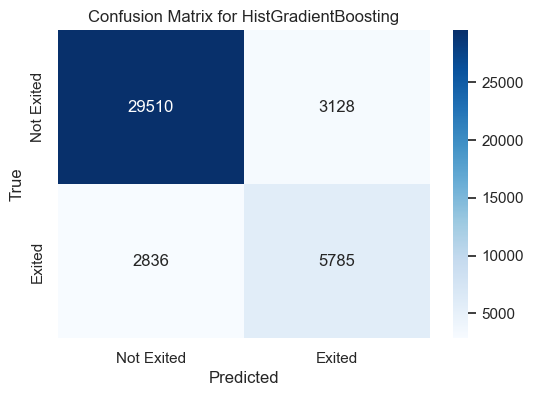

In [573]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_histgb)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for HistGradientBoosting')
plt.show()

ROC AUC Score:
 0.8869321747985919


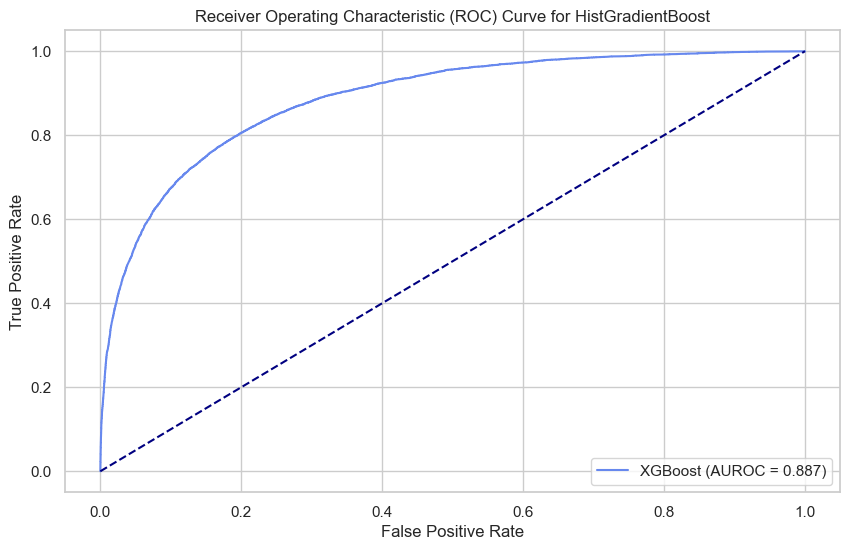

In [583]:
y_pred_xgb = histgb_clf.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

xgb_roc_auc = roc_auc_score(y_test, y_pred_proba_xgb)
print("ROC AUC Score:\n", xgb_roc_auc)

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgb)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='XGBoost (AUROC = %.3f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for HistGradientBoost')
plt.legend(loc='lower right')
plt.show()

In [570]:
cm

array([[27851,  4787],
       [ 2177,  6444]], dtype=int64)

### XGBoost 

In [524]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score

# Instantiate the XGBClassifier
xgb_model = xgb.XGBClassifier(random_state=42,
                              objective='binary:logistic',
                              gamma=1,
                              learning_rate=0.1,
                              max_depth=5,
                              reg_lambda=10,
                              scale_pos_weight=5)


# Fit the model
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Accuracy:\n", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Recall Score:\n", recall_score(y_test, y_pred_xgb))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.60      0.74     32638
           1       0.38      0.93      0.54      8621

    accuracy                           0.67     41259
   macro avg       0.67      0.76      0.64     41259
weighted avg       0.84      0.67      0.70     41259

Accuracy:
 0.6662546353522868
Confusion Matrix:
 [[19513 13125]
 [  645  7976]]
Recall Score:
 0.9251826934230367


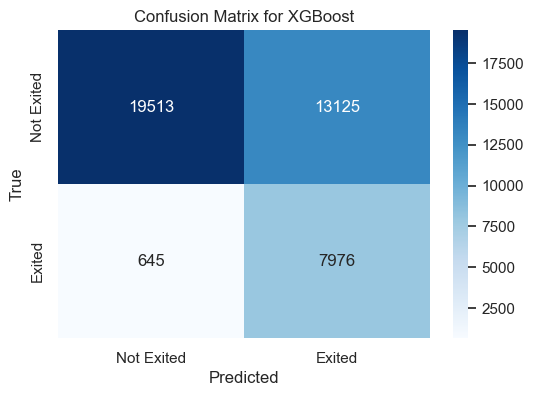

In [522]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGBoost')
plt.show()

ROC AUC Score:
 0.9586830005560418


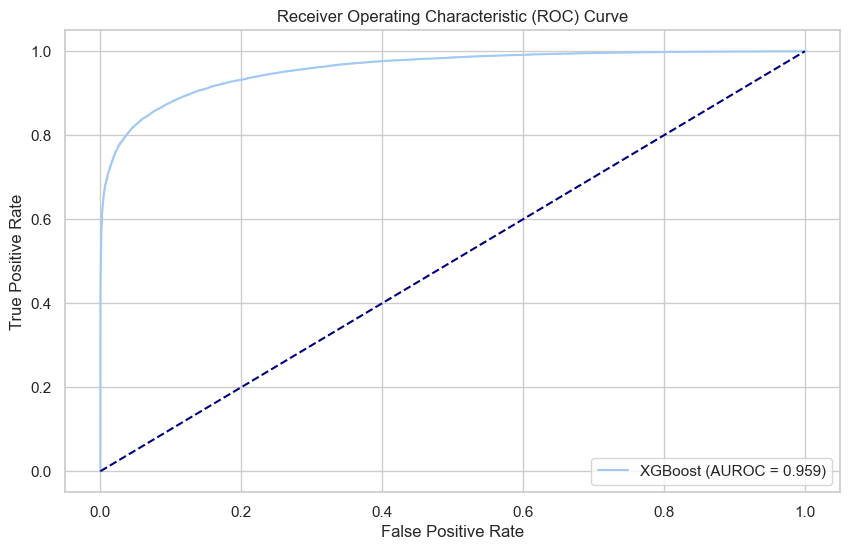

In [227]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_smote)[:, 1]

xgb_roc_auc = roc_auc_score(y_test_smote, y_pred_proba_xgb)
print("ROC AUC Score:\n", xgb_roc_auc)

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test_smote, y_pred_proba_xgb)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='XGBoost (AUROC = %.3f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [228]:
print(roc_auc_score(y_test_smote, y_pred_xgb))

0.8898348089884034


In [230]:
# from sklearn.metrics import roc_auc_score, roc_curve
# import matplotlib.pyplot as plt

# # Ensure the test data is consistent
# y_pred_proba_xgb = xgb_model.predict_proba(X_test_smote)[:, 1]

# # Calculate the ROC AUC score
# xgb_roc_auc = roc_auc_score(y_test_smote, y_pred_proba_xgb)
# print("ROC AUC Score:", xgb_roc_auc)

# # Calculate the ROC curve
# fpr, tpr, _ = roc_curve(y_test_smote, y_pred_proba_xgb)

# # Plot the ROC curve
# plt.figure(figsize=(10, 6))
# plt.plot(fpr, tpr, label='XGBoost (AUROC = %.3f)' % xgb_roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()
# # Ensure the same test data and model
# y_pred_proba_xgb = xgb_model.predict_proba(X_test_smote)[:, 1]

# # Calculate and print the ROC AUC score
xgb_roc_auc = roc_auc_score(y_test_smote, y_pred_proba_xgb)
print("ROC AUC Score:", xgb_roc_auc)


ROC AUC Score: 0.9586830005560418


### Learning Curves for the models

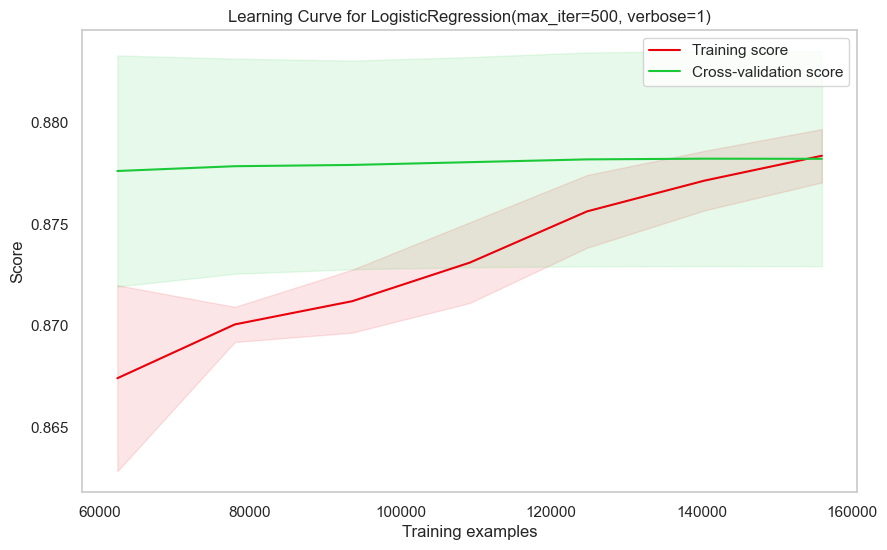

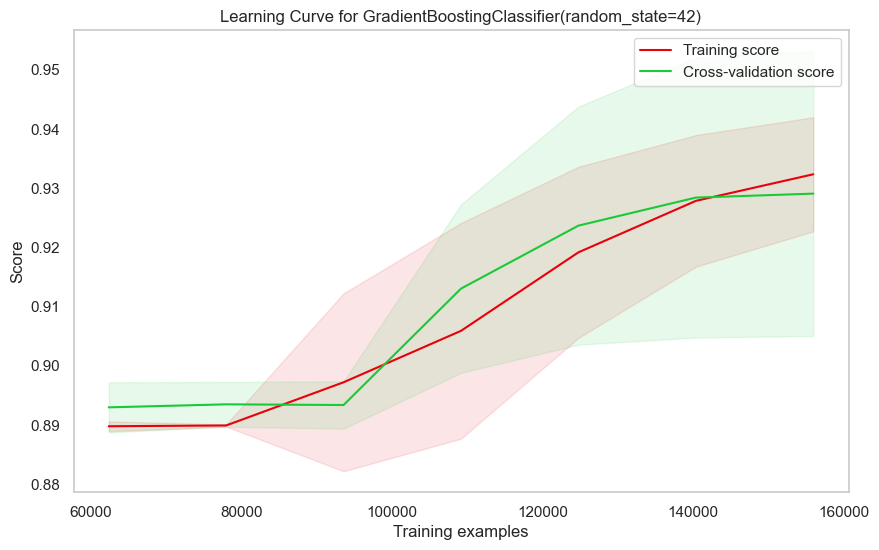

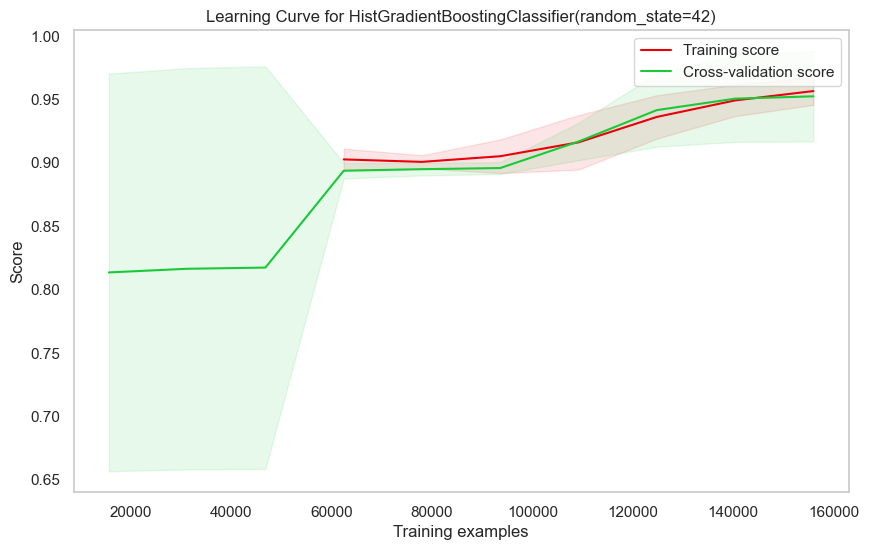

In [589]:
models = [lr, gb, histgb_clf]


def plot_learning_curve():
    for model in models:
        train_sizes, train_scores, test_scores = learning_curve(
            estimator=model,
            X=X_train_smote,
            y=y_train_smote,
            cv=5,
            scoring='roc_auc',
            n_jobs=-1,
            train_sizes=np.linspace(0.1, 1.0, 10)
        )

        # Calculate the mean and standard deviation of training and test scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        # Plot the learning curve
        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_scores_mean, label='Training score', color='r')
        plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='g')

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, color='r', alpha=0.1)
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, color='g', alpha=0.1)

        plt.title(f'Learning Curve for {model}')
        plt.xlabel('Training examples')
        plt.ylabel('Score')
        plt.legend(loc='best')
        plt.grid()
        plt.show()
        
plot_learning_curve()

In [104]:
# Define the models
models_initial = {
    'Logistic Regression': LogisticRegression(max_iter=500, verbose=1, n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

models_advanced = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'LGBM': lgb.LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'HistGradientBoost': HistGradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, objective='binary:logistic')
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'AUROC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
        'F1 Score': f1_score(y_test, y_pred)
    }


results_initial = []
for name, model in models_initial.items():
    metrics = evaluate_model(model, X_train_smote, X_test_smote, y_train_smote, y_test_smote)
    metrics['Model'] = name
    results_initial.append(metrics)

df_results_initial = pd.DataFrame(results_initial)

results_advanced = []
for name, model in models_advanced.items():
    metrics = evaluate_model(model, X_train, X_test, y_train, y_test)
    metrics['Model'] = name
    results_advanced.append(metrics)

df_results_advanced = pd.DataFrame(results_advanced)

# Combine results into a single dataframe
df_results_all = pd.concat([df_results_initial, df_results_advanced], ignore_index=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.4s finished


[LightGBM] [Info] Number of positive: 27937, number of negative: 104090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211601 -> initscore=-1.315304
[LightGBM] [Info] Start training from score -1.315304


In [106]:
df_results_initial.set_index(['Model'])

Accuracy  Precision    Recall     AUROC  F1 Score
Model                                                                 
Logistic Regression  0.797793   0.795503  0.803858  0.876513  0.799659
Decision Tree        0.855296   0.851127  0.862645  0.855275  0.856847
Random Forest        0.896460   0.892289  0.902725  0.960252  0.897476

In [110]:
df_results_advanced

Accuracy  Precision    Recall     AUROC  F1 Score              Model
0  0.864544   0.753480  0.534794  0.888623  0.625576  Gradient Boosting
1  0.865059   0.744776  0.551117  0.889581  0.633476               LGBM
2  0.865968   0.751079  0.548253  0.888857  0.633835           CatBoost
3  0.864847   0.743298  0.551833  0.889483  0.633413  HistGradientBoost
4  0.865029   0.742567  0.554267  0.886765  0.634746            XGBoost

In [111]:
df_results_all

Accuracy  Precision    Recall     AUROC  F1 Score                Model
0  0.797793   0.795503  0.803858  0.876513  0.799659  Logistic Regression
1  0.855296   0.851127  0.862645  0.855275  0.856847        Decision Tree
2  0.896460   0.892289  0.902725  0.960252  0.897476        Random Forest
3  0.864544   0.753480  0.534794  0.888623  0.625576    Gradient Boosting
4  0.865059   0.744776  0.551117  0.889581  0.633476                 LGBM
5  0.865968   0.751079  0.548253  0.888857  0.633835             CatBoost
6  0.864847   0.743298  0.551833  0.889483  0.633413    HistGradientBoost
7  0.865029   0.742567  0.554267  0.886765  0.634746              XGBoost

In [96]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost as xgb

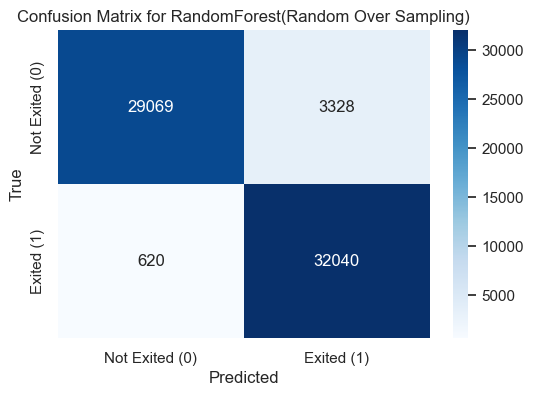

In [315]:
cm = confusion_matrix(y_test_ros, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Exited (0)', 'Exited (1)'], yticklabels=['Not Exited (0)', 'Exited (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for RandomForest(Random Over Sampling)', fontsize=12)
plt.show()

In [311]:
model

RandomForestClassifier(n_estimators=300, random_state=42)

In [565]:
lr = LogisticRegression(max_iter=100, verbose=1, n_jobs=-1)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42, n_estimators=300)

models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rf}


models={'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'LGBM': lgb_clf,
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'HistGradientBoost': HistGradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, objective='binary:logistic')}

results = {}

for model_name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    y_pred_proba= model.predict_proba(X_test)[:, 1]
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'AUROC': roc_auc_score(y_test, y_pred_proba),
        'F1 Score': f1_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Confusion Matrix' : confusion_matrix(y_test, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).transpose()
# results_df = results_df.apply(lambda x: f"{x:.2f}")  # Apply formatting to eacxh column
print(results_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.5s finished


                     Accuracy     AUROC  F1 Score    Recall  \
Logistic Regression  0.792651  0.871312  0.615557  0.794455   
Decision Tree        0.789088  0.703852  0.524689  0.557128   
Random Forest        0.844519  0.873013  0.636276  0.650853   

                                  Confusion Matrix  
Logistic Regression  [[25855, 6783], [1772, 6849]]  
Decision Tree        [[27754, 4884], [3818, 4803]]  
Random Forest        [[29233, 3405], [3010, 5611]]  


In [544]:
results_df #advance algos

Accuracy     AUROC  F1 Score    Recall  \
Logistic Regression  0.792651  0.871312  0.615557  0.794455   
Decision Tree        0.805957  0.873288  0.620677  0.759773   
Random Forest        0.844519  0.873013  0.636276  0.650853   

                                  Confusion Matrix  
Logistic Regression  [[25855, 6783], [1772, 6849]]  
Decision Tree        [[26703, 5935], [2071, 6550]]  
Random Forest        [[29233, 3405], [3010, 5611]]

In [546]:
results_df # Random oversampling

Accuracy     AUROC  F1 Score    Recall  \
Gradient Boosting  0.831213  0.886106  0.649204  0.747477   
LGBM               0.861897  0.889023  0.654834  0.626957   
CatBoost           0.865338  0.889642  0.647551  0.592043   
HistGradientBoost   0.85545  0.888232  0.659861  0.671036   
XGBoost             0.85688  0.885609  0.653564  0.646097   

                                Confusion Matrix  
Gradient Boosting  [[27851, 4787], [2177, 6444]]  
LGBM               [[30156, 2482], [3216, 5405]]  
CatBoost           [[30599, 2039], [3517, 5104]]  
HistGradientBoost  [[29510, 3128], [2836, 5785]]  
XGBoost            [[29784, 2854], [3051, 5570]]

In [566]:
results_df #advance algos

Accuracy     AUROC  F1 Score    Recall  \
Logistic Regression  0.792651  0.871312  0.615557  0.794455   
Decision Tree        0.789088  0.703852  0.524689  0.557128   
Random Forest        0.844519  0.873013  0.636276  0.650853   

                                  Confusion Matrix  
Logistic Regression  [[25855, 6783], [1772, 6849]]  
Decision Tree        [[27754, 4884], [3818, 4803]]  
Random Forest        [[29233, 3405], [3010, 5611]]

In [200]:
results_df #Before Sampling

Accuracy     AUROC  F1 Score    Recall  \
Logistic Regression  0.855122  0.729876  0.599632  0.512743   
Decision Tree        0.860969  0.745422  0.623945  0.545103   
Random Forest        0.858697  0.741205  0.616826  0.537514   

                                  Confusion Matrix  
Logistic Regression  [[24644, 1379], [3403, 3581]]  
Decision Tree        [[24611, 1412], [3177, 3807]]  
Random Forest        [[24589, 1434], [3230, 3754]]

In [218]:
results_df #smote

Accuracy     AUROC  F1 Score    Recall  \
Logistic Regression  0.797793  0.797768  0.799659  0.803858   
Decision Tree        0.812672   0.81276  0.809152  0.791029   
Random Forest        0.898551  0.898518  0.899717  0.906522   

                                   Confusion Matrix  
Logistic Regression  [[25648, 6749], [6406, 26254]]  
Decision Tree        [[27035, 5362], [6825, 25835]]  
Random Forest        [[28850, 3547], [3053, 29607]]

In [288]:
X.head()

CreditScore       Age    Tenure   Balance  EstimatedSalary  Gender_Male  \
0     0.144135 -0.578074 -0.719973 -0.883163         1.369486            1   
1    -0.367706 -0.578074 -1.432694 -0.883163        -1.254085            1   
2     0.268974  0.211354  1.774548 -0.883163         1.437422            1   
3    -0.941966 -0.465299 -1.076334  1.486918        -0.557018            1   
4     0.743362 -0.578074 -0.007253 -0.883163        -1.938770            1   

   Geography_Germany  Geography_Spain  NumOfProducts_2  NumOfProducts_3  \
0                  0                0                1                0   
1                  0                0                1                0   
2                  0                0                1                0   
3                  0                0                0                0   
4                  0                1                1                0   

   NumOfProducts_4  HasCrCard_1.0  IsActiveMember_1.0  
0                0              1                   0  
1                0              1                   1  
2                0              1                   0  
3                0              1                   1  
4                0              1                   1

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.1s finished


[LightGBM] [Info] Number of positive: 97453, number of negative: 97716
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1291
[LightGBM] [Info] Number of data points in the train set: 195169, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499326 -> initscore=-0.002695
[LightGBM] [Info] Start training from score -0.002695


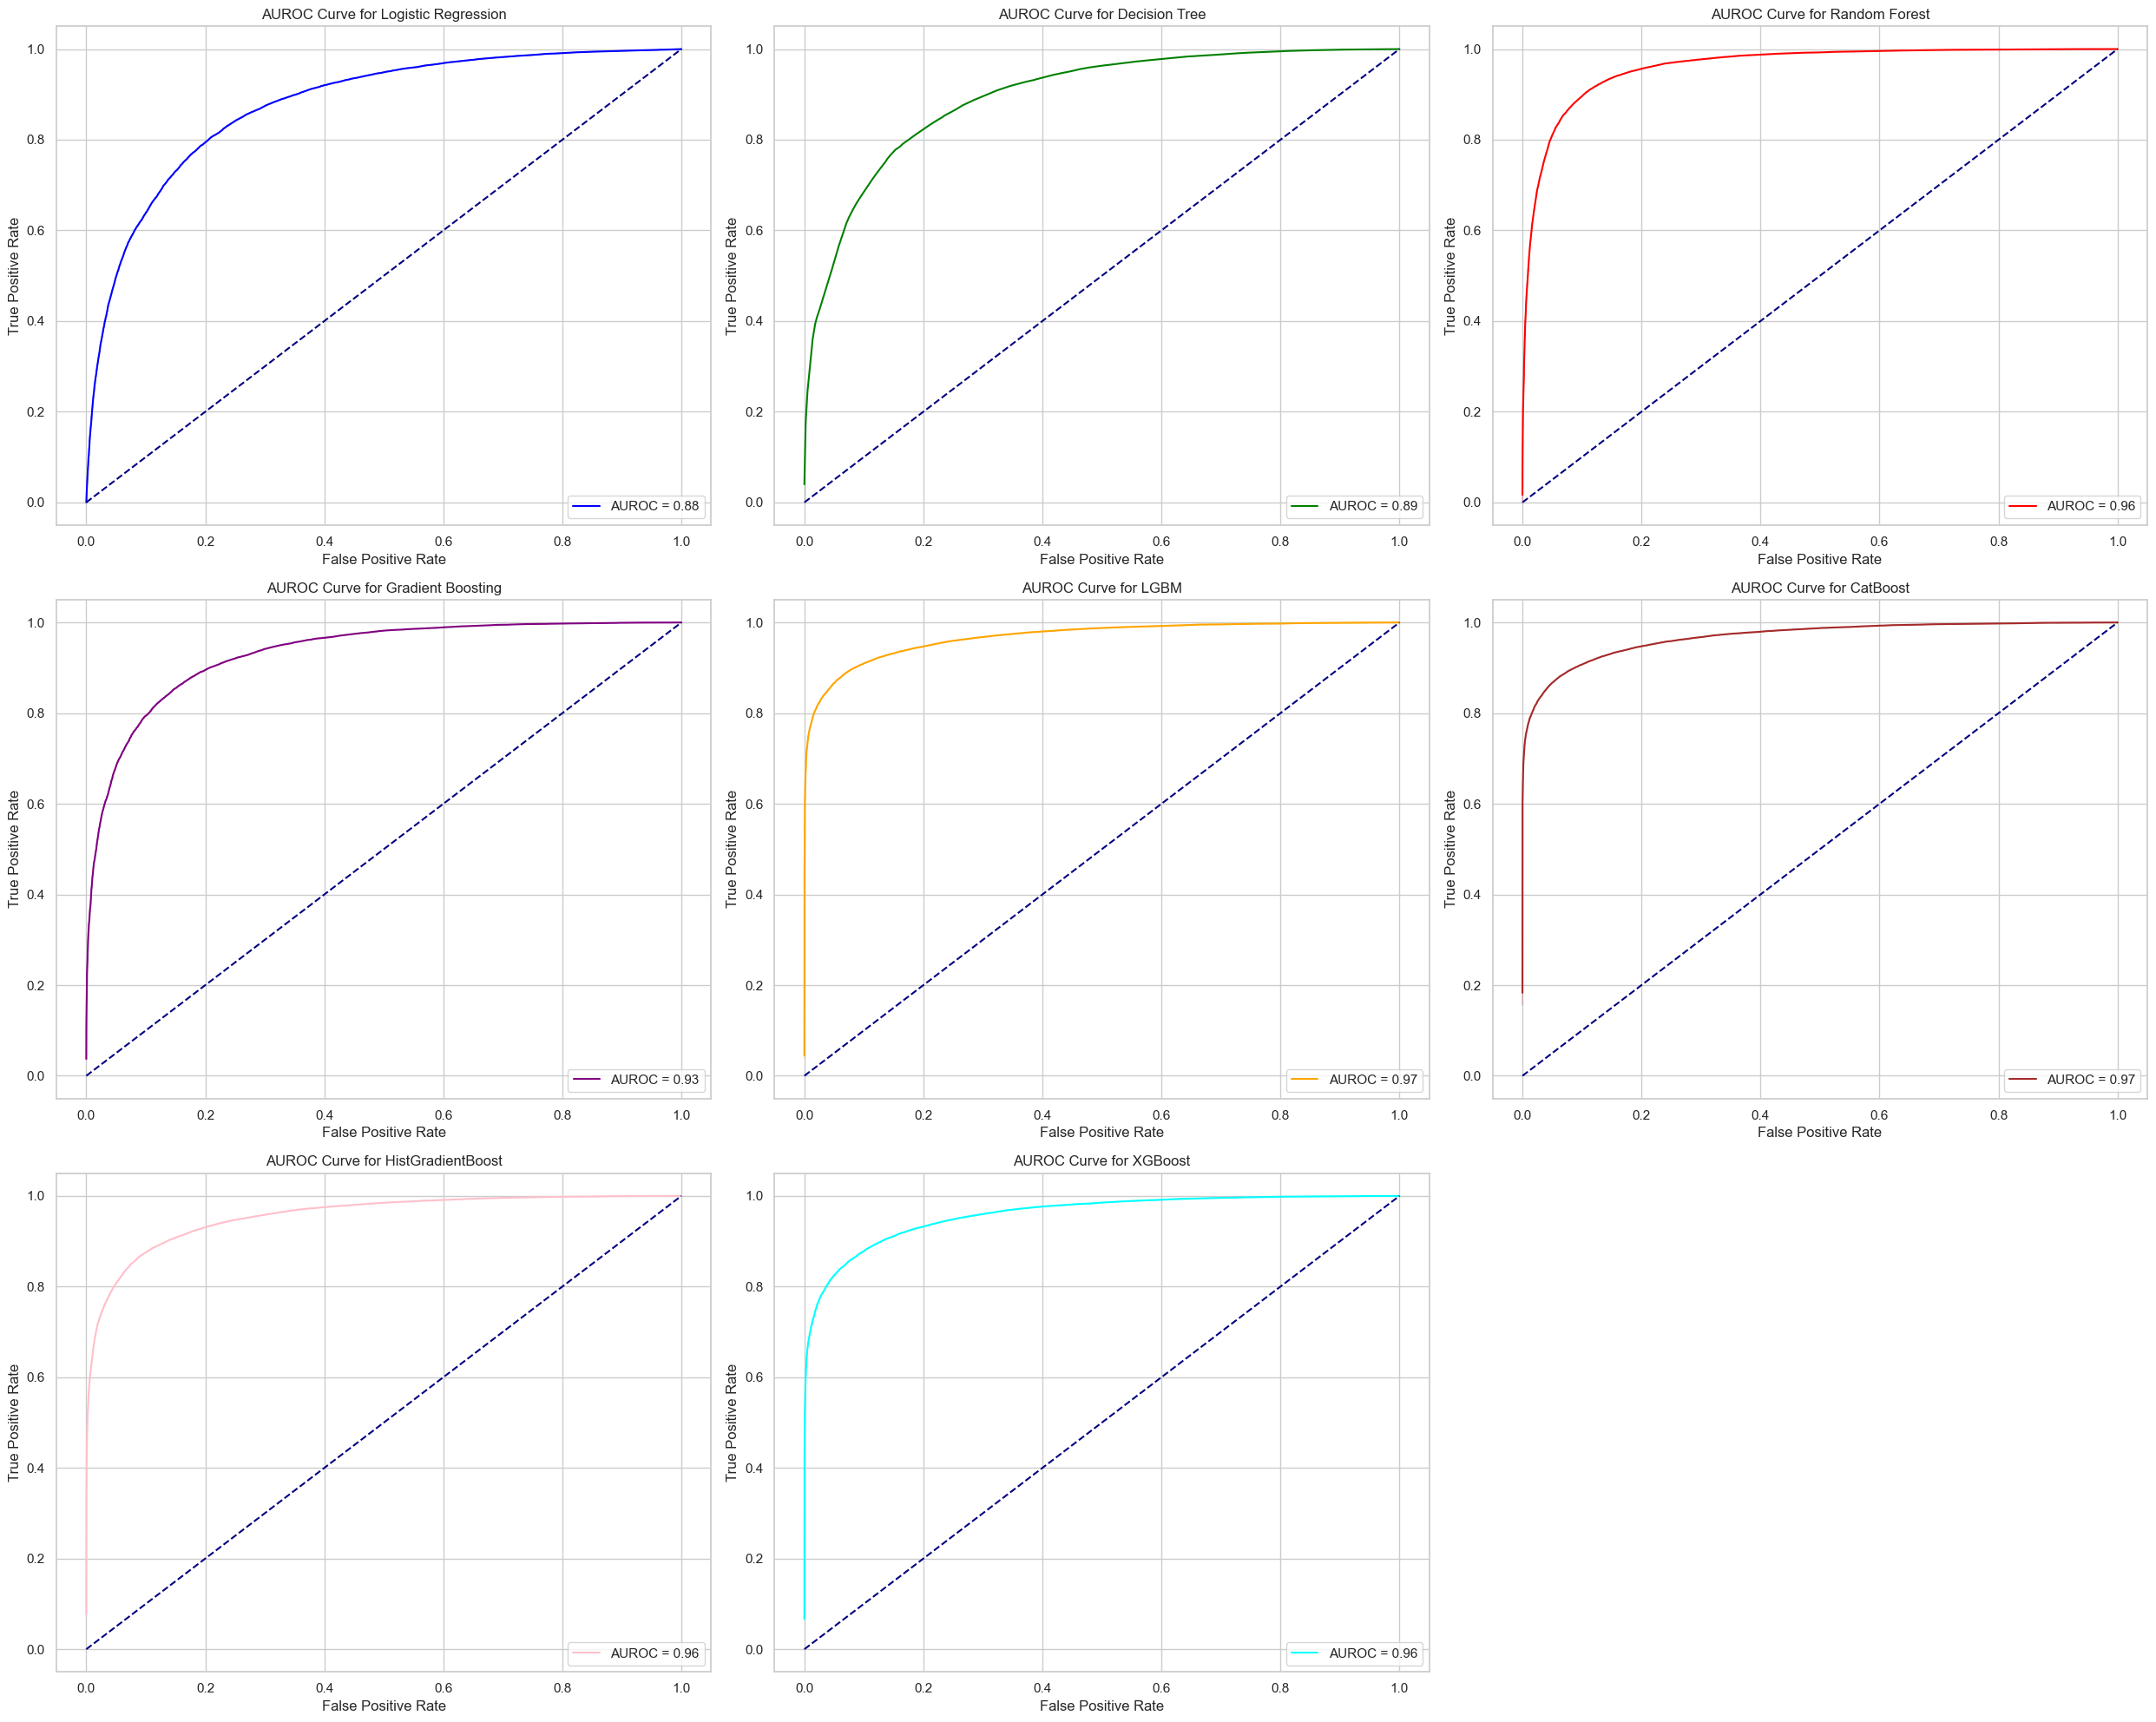

In [346]:
colors = {
    'Logistic Regression': 'blue',
    'Decision Tree': 'green',
    'Random Forest': 'red',
    'Gradient Boosting': 'purple',
    'LGBM': 'orange',
    'CatBoost': 'brown',
    'HistGradientBoost': 'pink',
    'XGBoost': 'cyan'
}

# Plot AUROC curves side by side
plt.figure(figsize=(25, 20))
for i, (model_name, model) in enumerate(models.items(), 1):
    plt.subplot(3, 3, i)
    model.fit(X_train_smote, y_train_smote)
    y_pred_proba = model.predict_proba(X_test_smote)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_smote, y_pred_proba)
    roc_auc = roc_auc_score(y_test_smote, y_pred_proba)
    sns.lineplot(x=fpr, y=tpr, color=colors[model_name], label=f'AUROC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'AUROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)

plt.tight_layout()
plt.show()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 12996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 12996, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

KeyboardInterrupt: 

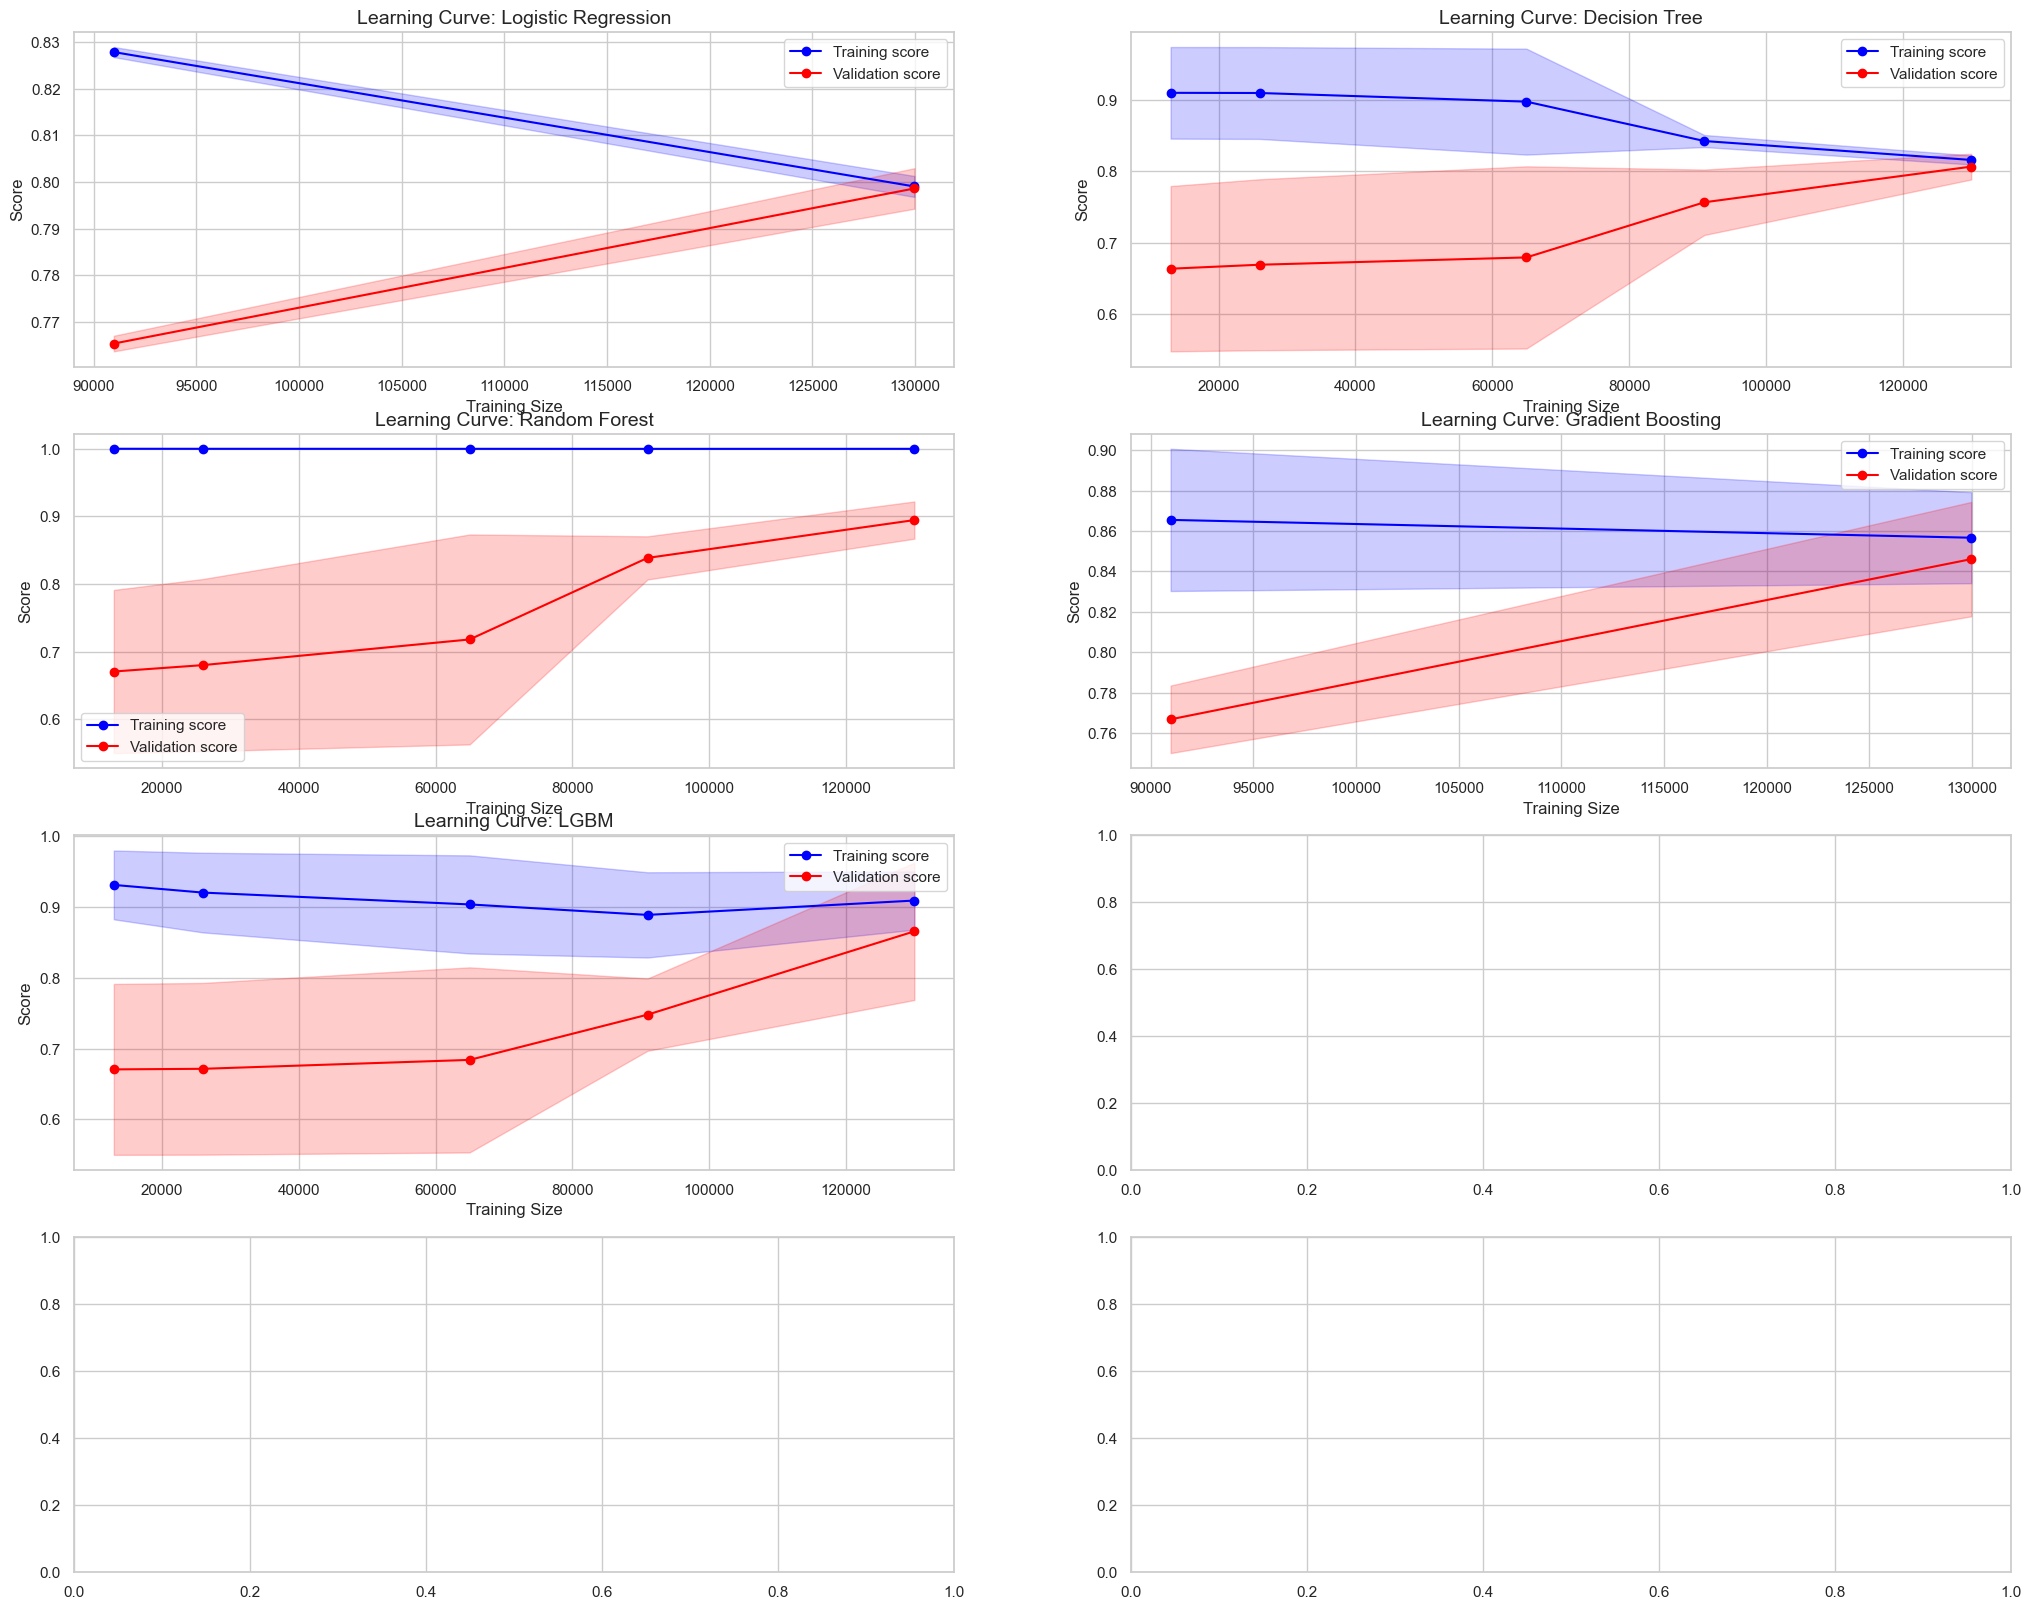

In [579]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

lr = LogisticRegression(max_iter=500, verbose=1)
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, random_state=42)
rf = RandomForestClassifier(random_state=42, n_estimators=300)

models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rf,
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'LGBM': lgb_clf,
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'HistGradientBoost': HistGradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, objective='binary:logistic')}



# Create a figure for learning curves
fig, axes = plt.subplots(len(models) // 2, 2, figsize=(25, 20))
axes = axes.flatten()

# Plot learning curves for each model
for i, (model_name, model) in enumerate(models.items()):
    train_sizes, train_scores, valid_scores = learning_curve(
        model, X_train_smote, y_train_smote, cv=3,
        scoring='accuracy', train_sizes=[0.1, 0.2, 0.5, 0.7, 1.0]
    )
    
    # Calculate mean and standard deviation
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    valid_mean = valid_scores.mean(axis=1)
    valid_std = valid_scores.std(axis=1)
    
    # Plot learning curves
    axes[i].plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    axes[i].plot(train_sizes, valid_mean, 'o-', color='red', label='Validation score')
    axes[i].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    axes[i].fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='red', alpha=0.2)
    
    # Customize labels and title
    axes[i].set_title(f'Learning Curve: {model_name}', fontsize=14)
    axes[i].set_xlabel('Training Size', fontsize=12)
    axes[i].set_ylabel('Score', fontsize=12)
    axes[i].legend(loc='best')
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [504]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(lgb_clf, X_train, y_train, cv=kf, scoring='recall')

[LightGBM] [Info] Number of positive: 23625, number of negative: 87772
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 111397, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212079 -> initscore=-1.312437
[LightGBM] [Info] Start training from score -1.312437
[LightGBM] [Info] Number of positive: 23697, number of negative: 87700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 111397, number of used features: 13
[LightGBM] [Info] 

In [505]:
scores

array([0.57570093, 0.55551287, 0.5659748 , 0.55825814, 0.55607115,
       0.54690397, 0.54942966, 0.54531665, 0.56143667, 0.57325581])

In [515]:
from sklearn.model_selection import GridSearchCV

optimal_parameters.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [519]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Initialize the classifier
model=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Access best parameters, best score, and best estimator
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")
print(f"Best estimator: {best_estimator}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best cross-validation score: 0.5528
Best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [518]:
best_params

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}